In [1]:
import warnings

warnings.filterwarnings('ignore')
## We will be using Numpy, Pyplot and Tensorflow as our scientific tool box
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

## BytesIO for defining in-memory file-like objects
from io import BytesIO

## Dask and in particular dask array for defining OOM pipelines
import dask
import dask.array as da

## Progress bars
from tqdm import tqdm

import mlflow

2024-12-05 17:52:20.164482: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-05 17:52:20.207949: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 17:52:20.208015: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 17:52:20.208043: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 17:52:20.215813: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-05 17:52:20.216626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

2024-12-05 17:52:21.145797: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model="classifier.keras"

In [3]:
# Parameters
model = (
    "mlflow-artifacts:/122431401138374784/364b39810f2341c68bb35a662c5124fd/artifacts"
)


In [4]:
! wget "https://agenda.infn.it/event/40829/attachments/120545/191628/object_list%20(1).csv"
! wget "https://pandora.infn.it/public/cdf340/dl/soscdata.zip"
! rm -fr input
! mkdir -p input && cd input && unzip ../soscdata.zip
! mkdir -p downloads

object_names = []
with open('object_list (1).csv') as f:
    object_names = [x.strip("\n") for x in f.readlines()]

--2024-12-05 17:52:23--  https://agenda.infn.it/event/40829/attachments/120545/191628/object_list%20(1).csv
Resolving agenda.infn.it (agenda.infn.it)... 

131.154.52.174
Connecting to agenda.infn.it (agenda.infn.it)|131.154.52.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170142 (166K) [text/csv]
Saving to: ‘object_list (1).csv.2’

object_list (1).csv 100%[===================>] 166.15K  --.-KB/s    in 0.002s  

2024-12-05 17:52:23 (79.9 MB/s) - ‘object_list (1).csv.2’ saved [170142/170142]



--2024-12-05 17:52:23--  https://pandora.infn.it/public/cdf340/dl/soscdata.zip
Resolving pandora.infn.it (pandora.infn.it)... 131.154.52.50
Connecting to pandora.infn.it (pandora.infn.it)|131.154.52.50|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 404408328 (386M) [application/force-download]
Saving to: ‘soscdata.zip.2’

soscdata.zip.2        0%[                    ]       0  --.-KB/s               

soscdata.zip.2       11%[=>                  ]  42.75M   214MB/s               

soscdata.zip.2       23%[===>                ]  90.81M   227MB/s               

soscdata.zip.2       34%[=====>              ] 134.66M   224MB/s               

soscdata.zip.2       48%[========>           ] 186.86M   234MB/s               

soscdata.zip.2       62%[===========>        ] 240.40M   240MB/s               

soscdata.zip.2       78%[==============>     ] 302.22M   252MB/s               

soscdata.zip.2       93%[=================>  ] 360.42M   257MB/s               

soscdata.zip.2      100%[===================>] 385.67M   260MB/s    in 1.5s    

2024-12-05 17:52:25 (260 MB/s) - ‘soscdata.zip.2’ saved [404408328/404408328]



Archive:  ../soscdata.zip
  inflating: data-chunk-2023-10-18T18:28:27.642050.npz  
  inflating: data-chunk-2023-10-18T18:28:39.359952.npz  
  inflating: data-chunk-2023-10-18T18:28:40.722029.npz  
  inflating: data-chunk-2023-10-18T18:28:43.152314.npz  
  inflating: data-chunk-2023-10-18T18:28:45.133516.npz  
  inflating: data-chunk-2023-10-18T18:28:47.170518.npz  
  inflating: data-chunk-2023-10-18T18:28:48.838282.npz  
  inflating: data-chunk-2023-10-18T18:28:51.503922.npz  
  inflating: data-chunk-2023-10-18T18:28:53.465447.npz  
  inflating: data-chunk-2023-10-18T18:28:58.327165.npz  
  inflating: data-chunk-2023-10-18T18:29:01.239165.npz  
  inflating: data-chunk-2023-10-18T18:29:02.733191.npz  
  inflating: data-chunk-2023-10-18T18:29:04.001586.npz  
  inflating: data-chunk-2023-10-18T18:29:07.206566.npz  
  inflating: data-chunk-2023-10-18T18:29:09.176625.npz  
  inflating: data-chunk-2023-10-18T18:29:10.544269.npz  
  inflating: data-chunk-2023-10-18T18:29:12.210484.npz  
  inf


  inflating: data-chunk-2023-10-18T18:29:35.316698.npz  
  inflating: data-chunk-2023-10-18T18:29:36.679234.npz  
  inflating: data-chunk-2023-10-18T18:29:39.376446.npz  
  inflating: data-chunk-2023-10-18T18:29:41.318646.npz  
  inflating: data-chunk-2023-10-18T18:29:43.301536.npz  
  inflating: data-chunk-2023-10-18T18:29:45.451155.npz  
  inflating: data-chunk-2023-10-18T18:29:47.549919.npz  
  inflating: data-chunk-2023-10-18T18:29:49.565305.npz  
  inflating: data-chunk-2023-10-18T18:29:52.032946.npz  
  inflating: data-chunk-2023-10-18T18:29:53.807206.npz  
  inflating: data-chunk-2023-10-18T18:29:57.184959.npz  
  inflating: data-chunk-2023-10-18T18:29:59.700353.npz  
  inflating: data-chunk-2023-10-18T18:30:01.939325.npz  
  inflating: data-chunk-2023-10-18T18:30:03.312983.npz  
  inflating: data-chunk-2023-10-18T18:30:04.950612.npz  
  inflating: data-chunk-2023-10-18T18:30:06.856294.npz  
  inflating: data-chunk-2023-10-18T18:30:09.277017.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:30:57.171976.npz  
  inflating: data-chunk-2023-10-18T18:30:59.719454.npz  
  inflating: data-chunk-2023-10-18T18:31:03.509069.npz  
  inflating: data-chunk-2023-10-18T18:31:05.208007.npz  
  inflating: data-chunk-2023-10-18T18:31:06.674756.npz  
  inflating: data-chunk-2023-10-18T18:31:08.206977.npz  
  inflating: data-chunk-2023-10-18T18:31:09.615509.npz  
  inflating: data-chunk-2023-10-18T18:31:12.159330.npz  
  inflating: data-chunk-2023-10-18T18:31:14.726246.npz  
  inflating: data-chunk-2023-10-18T18:31:16.221386.npz  
  inflating: data-chunk-2023-10-18T18:31:18.924647.npz  
  inflating: data-chunk-2023-10-18T18:31:21.802957.npz  
  inflating: data-chunk-2023-10-18T18:31:23.772744.npz  
  inflating: data-chunk-2023-10-18T18:31:25.599295.npz  
  inflating: data-chunk-2023-10-18T18:31:27.081350.npz  
  inflating: data-chunk-2023-10-18T18:31:29.238673.npz  
  inflating: data-chunk-2023-10-18T18:31:31.925272.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:32:05.174937.npz  
  inflating: data-chunk-2023-10-18T18:32:06.689124.npz  
  inflating: data-chunk-2023-10-18T18:32:08.630460.npz  
  inflating: data-chunk-2023-10-18T18:32:10.804595.npz  
  inflating: data-chunk-2023-10-18T18:32:13.430849.npz  
  inflating: data-chunk-2023-10-18T18:32:15.523496.npz  
  inflating: data-chunk-2023-10-18T18:32:17.362277.npz  
  inflating: data-chunk-2023-10-18T18:32:18.414535.npz  
  inflating: data-chunk-2023-10-18T18:32:21.226207.npz  
  inflating: data-chunk-2023-10-18T18:32:23.833843.npz  
  inflating: data-chunk-2023-10-18T18:32:25.670413.npz  
  inflating: data-chunk-2023-10-18T18:32:28.364297.npz  
  inflating: data-chunk-2023-10-18T18:32:29.761026.npz  
  inflating: data-chunk-2023-10-18T18:32:31.696312.npz  
  inflating: data-chunk-2023-10-18T18:32:34.077916.npz  
  inflating: data-chunk-2023-10-18T18:32:36.892131.npz  
  inflating: data-chunk-2023-10-18T18:32:39.073775.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:33:13.556932.npz  
  inflating: data-chunk-2023-10-18T18:33:15.352040.npz  
  inflating: data-chunk-2023-10-18T18:33:16.782762.npz  
  inflating: data-chunk-2023-10-18T18:33:18.961371.npz  
  inflating: data-chunk-2023-10-18T18:33:21.899247.npz  
  inflating: data-chunk-2023-10-18T18:33:23.794069.npz  
  inflating: data-chunk-2023-10-18T18:33:25.038095.npz  
  inflating: data-chunk-2023-10-18T18:33:27.228284.npz  
  inflating: data-chunk-2023-10-18T18:33:29.090302.npz  
  inflating: data-chunk-2023-10-18T18:33:30.541337.npz  
  inflating: data-chunk-2023-10-18T18:33:31.925992.npz  
  inflating: data-chunk-2023-10-18T18:33:35.334976.npz  
  inflating: data-chunk-2023-10-18T18:33:36.673949.npz  
  inflating: data-chunk-2023-10-18T18:33:39.486817.npz  
  inflating: data-chunk-2023-10-18T18:33:42.285259.npz  
  inflating: data-chunk-2023-10-18T18:33:44.560570.npz  
  inflating: data-chunk-2023-10-18T18:33:46.356215.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:34:15.398437.npz  
  inflating: data-chunk-2023-10-18T18:34:18.075174.npz  
  inflating: data-chunk-2023-10-18T18:34:20.507114.npz  
  inflating: data-chunk-2023-10-18T18:34:23.557013.npz  
  inflating: data-chunk-2023-10-18T18:34:25.508178.npz  
  inflating: data-chunk-2023-10-18T18:34:27.711978.npz  
  inflating: data-chunk-2023-10-18T18:34:29.360326.npz  
  inflating: data-chunk-2023-10-18T18:34:31.770657.npz  
  inflating: data-chunk-2023-10-18T18:34:33.987534.npz  
  inflating: data-chunk-2023-10-18T18:34:35.548772.npz  
  inflating: data-chunk-2023-10-18T18:34:37.263292.npz  
  inflating: data-chunk-2023-10-18T18:34:38.970785.npz  
  inflating: data-chunk-2023-10-18T18:34:40.027612.npz  
  inflating: data-chunk-2023-10-18T18:34:42.706243.npz  
  inflating: data-chunk-2023-10-18T18:34:44.859584.npz  
  inflating: data-chunk-2023-10-18T18:34:46.827459.npz  
  inflating: data-chunk-2023-10-18T18:34:48.129236.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:35:23.570950.npz  
  inflating: data-chunk-2023-10-18T18:35:26.416669.npz  
  inflating: data-chunk-2023-10-18T18:35:28.304919.npz  
  inflating: data-chunk-2023-10-18T18:35:29.736389.npz  
  inflating: data-chunk-2023-10-18T18:35:31.546914.npz  
  inflating: data-chunk-2023-10-18T18:35:33.029914.npz  
  inflating: data-chunk-2023-10-18T18:35:34.449456.npz  
  inflating: data-chunk-2023-10-18T18:35:36.729860.npz  
  inflating: data-chunk-2023-10-18T18:35:38.992494.npz  
  inflating: data-chunk-2023-10-18T18:35:40.764636.npz  
  inflating: data-chunk-2023-10-18T18:35:42.023767.npz  
  inflating: data-chunk-2023-10-18T18:35:44.021744.npz  
  inflating: data-chunk-2023-10-18T18:35:46.323338.npz  
  inflating: data-chunk-2023-10-18T18:35:48.574609.npz  
  inflating: data-chunk-2023-10-18T18:35:50.895532.npz  
  inflating: data-chunk-2023-10-18T18:35:52.951606.npz  
  inflating: data-chunk-2023-10-18T18:35:55.622617.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:36:27.862792.npz  
  inflating: data-chunk-2023-10-18T18:36:29.950579.npz  
  inflating: data-chunk-2023-10-18T18:36:31.228597.npz  
  inflating: data-chunk-2023-10-18T18:36:33.255903.npz  
  inflating: data-chunk-2023-10-18T18:36:35.354419.npz  
  inflating: data-chunk-2023-10-18T18:36:36.890446.npz  
  inflating: data-chunk-2023-10-18T18:36:38.653323.npz  
  inflating: data-chunk-2023-10-18T18:36:40.712221.npz  
  inflating: data-chunk-2023-10-18T18:36:43.734467.npz  
  inflating: data-chunk-2023-10-18T18:36:45.839181.npz  
  inflating: data-chunk-2023-10-18T18:36:47.884173.npz  
  inflating: data-chunk-2023-10-18T18:36:49.362885.npz  
  inflating: data-chunk-2023-10-18T18:36:50.812407.npz  
  inflating: data-chunk-2023-10-18T18:36:53.008989.npz  
  inflating: data-chunk-2023-10-18T18:36:55.536482.npz  
  inflating: data-chunk-2023-10-18T18:36:56.423124.npz  
  inflating: data-chunk-2023-10-18T18:36:57.752441.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:37:33.944246.npz  
  inflating: data-chunk-2023-10-18T18:37:35.525603.npz  
  inflating: data-chunk-2023-10-18T18:37:37.372877.npz  
  inflating: data-chunk-2023-10-18T18:37:40.550979.npz  
  inflating: data-chunk-2023-10-18T18:37:42.044484.npz  
  inflating: data-chunk-2023-10-18T18:37:42.829000.npz  
  inflating: data-chunk-2023-10-18T18:37:44.693106.npz  
  inflating: data-chunk-2023-10-18T18:37:47.363725.npz  
  inflating: data-chunk-2023-10-18T18:37:49.631570.npz  
  inflating: data-chunk-2023-10-18T18:37:52.043492.npz  
  inflating: data-chunk-2023-10-18T18:37:54.434867.npz  
  inflating: data-chunk-2023-10-18T18:37:55.896945.npz  
  inflating: data-chunk-2023-10-18T18:37:57.960409.npz  
  inflating: data-chunk-2023-10-18T18:37:59.589667.npz  
  inflating: data-chunk-2023-10-18T18:38:02.240477.npz  
  inflating: data-chunk-2023-10-18T18:38:04.464720.npz  
  inflating: data-chunk-2023-10-18T18:38:06.296867.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:38:34.652706.npz  
  inflating: data-chunk-2023-10-18T18:38:36.536295.npz  
  inflating: data-chunk-2023-10-18T18:38:37.690720.npz  
  inflating: data-chunk-2023-10-18T18:38:39.928717.npz  
  inflating: data-chunk-2023-10-18T18:38:42.581679.npz  
  inflating: data-chunk-2023-10-18T18:38:44.215216.npz  
  inflating: data-chunk-2023-10-18T18:38:46.616160.npz  
  inflating: data-chunk-2023-10-18T18:38:49.537428.npz  
  inflating: data-chunk-2023-10-18T18:38:51.315157.npz  
  inflating: data-chunk-2023-10-18T18:38:52.724985.npz  
  inflating: data-chunk-2023-10-18T18:38:54.966892.npz  
  inflating: data-chunk-2023-10-18T18:38:56.320859.npz  
  inflating: data-chunk-2023-10-18T18:38:57.887580.npz  
  inflating: data-chunk-2023-10-18T18:38:59.561664.npz  
  inflating: data-chunk-2023-10-18T18:39:01.775472.npz  
  inflating: data-chunk-2023-10-18T18:39:03.550263.npz  
  inflating: data-chunk-2023-10-18T18:39:05.653236.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:39:40.112322.npz  
  inflating: data-chunk-2023-10-18T18:39:42.275657.npz  
  inflating: data-chunk-2023-10-18T18:39:45.802852.npz  
  inflating: data-chunk-2023-10-18T18:39:46.974537.npz  
  inflating: data-chunk-2023-10-18T18:39:49.033756.npz  
  inflating: data-chunk-2023-10-18T18:39:50.652432.npz  
  inflating: data-chunk-2023-10-18T18:39:52.489373.npz  
  inflating: data-chunk-2023-10-18T18:39:54.429344.npz  
  inflating: data-chunk-2023-10-18T18:39:55.820386.npz  
  inflating: data-chunk-2023-10-18T18:39:57.033579.npz  
  inflating: data-chunk-2023-10-18T18:39:58.624156.npz  
  inflating: data-chunk-2023-10-18T18:39:59.470621.npz  
  inflating: data-chunk-2023-10-18T18:40:01.930006.npz  
  inflating: data-chunk-2023-10-18T18:40:03.402532.npz  
  inflating: data-chunk-2023-10-18T18:40:05.725939.npz  
  inflating: data-chunk-2023-10-18T18:40:07.694931.npz  
  inflating: data-chunk-2023-10-18T18:40:09.246875.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:40:38.124753.npz  
  inflating: data-chunk-2023-10-18T18:40:40.618533.npz  
  inflating: data-chunk-2023-10-18T18:40:42.394516.npz  
  inflating: data-chunk-2023-10-18T18:40:45.062793.npz  
  inflating: data-chunk-2023-10-18T18:40:46.737321.npz  
  inflating: data-chunk-2023-10-18T18:40:48.486075.npz  
  inflating: data-chunk-2023-10-18T18:40:50.435021.npz  
  inflating: data-chunk-2023-10-18T18:40:52.207185.npz  
  inflating: data-chunk-2023-10-18T18:40:54.590728.npz  
  inflating: data-chunk-2023-10-18T18:40:56.396692.npz  
  inflating: data-chunk-2023-10-18T18:40:58.443697.npz  
  inflating: data-chunk-2023-10-18T18:41:00.671850.npz  
  inflating: data-chunk-2023-10-18T18:41:02.151964.npz  
  inflating: data-chunk-2023-10-18T18:41:04.031987.npz  
  inflating: data-chunk-2023-10-18T18:41:05.826879.npz  
  inflating: data-chunk-2023-10-18T18:41:08.223957.npz  
  inflating: data-chunk-2023-10-18T18:41:10.172759.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:41:43.500774.npz  
  inflating: data-chunk-2023-10-18T18:41:45.666447.npz  
  inflating: data-chunk-2023-10-18T18:41:47.070407.npz  
  inflating: data-chunk-2023-10-18T18:41:49.136333.npz  
  inflating: data-chunk-2023-10-18T18:41:51.722775.npz  
  inflating: data-chunk-2023-10-18T18:41:53.693538.npz  
  inflating: data-chunk-2023-10-18T18:41:55.121431.npz  
  inflating: data-chunk-2023-10-18T18:41:57.764435.npz  
  inflating: data-chunk-2023-10-18T18:41:59.297677.npz  
  inflating: data-chunk-2023-10-18T18:42:00.623133.npz  
  inflating: data-chunk-2023-10-18T18:42:01.627409.npz  
  inflating: data-chunk-2023-10-18T18:42:04.210066.npz  
  inflating: data-chunk-2023-10-18T18:42:05.419596.npz  
  inflating: data-chunk-2023-10-18T18:42:07.387785.npz  
  inflating: data-chunk-2023-10-18T18:42:08.329158.npz  
  inflating: data-chunk-2023-10-18T18:42:10.291497.npz  
  inflating: data-chunk-2023-10-18T18:42:12.659746.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:42:47.868804.npz  
  inflating: data-chunk-2023-10-18T18:42:49.808376.npz  
  inflating: data-chunk-2023-10-18T18:42:51.160140.npz  
  inflating: data-chunk-2023-10-18T18:42:53.347993.npz  
  inflating: data-chunk-2023-10-18T18:42:55.148968.npz  
  inflating: data-chunk-2023-10-18T18:42:56.969492.npz  
  inflating: data-chunk-2023-10-18T18:42:58.456649.npz  
  inflating: data-chunk-2023-10-18T18:42:59.984723.npz  
  inflating: data-chunk-2023-10-18T18:43:03.724968.npz  
  inflating: data-chunk-2023-10-18T18:43:06.638977.npz  
  inflating: data-chunk-2023-10-18T18:43:10.465612.npz  
  inflating: data-chunk-2023-10-18T18:43:13.031065.npz  
  inflating: data-chunk-2023-10-18T18:43:15.861632.npz  
  inflating: data-chunk-2023-10-18T18:43:18.921425.npz  
  inflating: data-chunk-2023-10-18T18:43:20.113275.npz  
  inflating: data-chunk-2023-10-18T18:43:22.290434.npz  
  inflating: data-chunk-2023-10-18T18:43:24.685944.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:43:51.957696.npz  
  inflating: data-chunk-2023-10-18T18:43:53.674636.npz  
  inflating: data-chunk-2023-10-18T18:43:55.219633.npz  
  inflating: data-chunk-2023-10-18T18:43:56.925558.npz  
  inflating: data-chunk-2023-10-18T18:43:58.973777.npz  
  inflating: data-chunk-2023-10-18T18:44:01.289579.npz  
  inflating: data-chunk-2023-10-18T18:44:02.916179.npz  
  inflating: data-chunk-2023-10-18T18:44:04.622640.npz  
  inflating: data-chunk-2023-10-18T18:44:06.855571.npz  
  inflating: data-chunk-2023-10-18T18:44:08.393739.npz  
  inflating: data-chunk-2023-10-18T18:44:10.122559.npz  
  inflating: data-chunk-2023-10-18T18:44:12.621725.npz  
  inflating: data-chunk-2023-10-18T18:44:14.328419.npz  
  inflating: data-chunk-2023-10-18T18:44:16.502610.npz  
  inflating: data-chunk-2023-10-18T18:44:18.219282.npz  
  inflating: data-chunk-2023-10-18T18:44:20.941039.npz  
  inflating: data-chunk-2023-10-18T18:44:22.809026.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:44:58.820981.npz  
  inflating: data-chunk-2023-10-18T18:45:00.530688.npz  
  inflating: data-chunk-2023-10-18T18:45:01.846921.npz  
  inflating: data-chunk-2023-10-18T18:45:04.511366.npz  
  inflating: data-chunk-2023-10-18T18:45:06.646402.npz  
  inflating: data-chunk-2023-10-18T18:45:07.870789.npz  
  inflating: data-chunk-2023-10-18T18:45:10.113652.npz  
  inflating: data-chunk-2023-10-18T18:45:11.053486.npz  
  inflating: data-chunk-2023-10-18T18:45:12.851208.npz  
  inflating: data-chunk-2023-10-18T18:45:14.414028.npz  
  inflating: data-chunk-2023-10-18T18:45:16.314628.npz  
  inflating: data-chunk-2023-10-18T18:45:18.680157.npz  
  inflating: data-chunk-2023-10-18T18:45:19.900301.npz  
  inflating: data-chunk-2023-10-18T18:45:22.110872.npz  
  inflating: data-chunk-2023-10-18T18:45:23.669963.npz  
  inflating: data-chunk-2023-10-18T18:45:26.035620.npz  
  inflating: data-chunk-2023-10-18T18:45:27.182455.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:46:01.626885.npz  
  inflating: data-chunk-2023-10-18T18:46:04.837014.npz  
  inflating: data-chunk-2023-10-18T18:46:07.448759.npz  
  inflating: data-chunk-2023-10-18T18:46:08.779856.npz  
  inflating: data-chunk-2023-10-18T18:46:11.134583.npz  
  inflating: data-chunk-2023-10-18T18:46:12.904688.npz  
  inflating: data-chunk-2023-10-18T18:46:15.458898.npz  
  inflating: data-chunk-2023-10-18T18:46:17.518888.npz  
  inflating: data-chunk-2023-10-18T18:46:18.514447.npz  
  inflating: data-chunk-2023-10-18T18:46:20.189265.npz  
  inflating: data-chunk-2023-10-18T18:46:23.186238.npz  
  inflating: data-chunk-2023-10-18T18:46:25.012230.npz  
  inflating: data-chunk-2023-10-18T18:46:28.195826.npz  
  inflating: data-chunk-2023-10-18T18:46:29.464684.npz  
  inflating: data-chunk-2023-10-18T18:46:31.022423.npz  
  inflating: data-chunk-2023-10-18T18:46:33.463507.npz  
  inflating: data-chunk-2023-10-18T18:46:34.533225.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:47:08.188592.npz  
  inflating: data-chunk-2023-10-18T18:47:09.473453.npz  
  inflating: data-chunk-2023-10-18T18:47:11.279574.npz  
  inflating: data-chunk-2023-10-18T18:47:12.429863.npz  
  inflating: data-chunk-2023-10-18T18:47:15.152144.npz  
  inflating: data-chunk-2023-10-18T18:47:16.605690.npz  
  inflating: data-chunk-2023-10-18T18:47:18.478585.npz  
  inflating: data-chunk-2023-10-18T18:47:20.182344.npz  
  inflating: data-chunk-2023-10-18T18:47:21.914837.npz  
  inflating: data-chunk-2023-10-18T18:47:23.661012.npz  
  inflating: data-chunk-2023-10-18T18:47:25.931434.npz  
  inflating: data-chunk-2023-10-18T18:47:27.932431.npz  
  inflating: data-chunk-2023-10-18T18:47:30.274630.npz  
  inflating: data-chunk-2023-10-18T18:47:32.609885.npz  
  inflating: data-chunk-2023-10-18T18:47:34.709995.npz  
  inflating: data-chunk-2023-10-18T18:47:36.714729.npz  
  inflating: data-chunk-2023-10-18T18:47:38.379247.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:48:10.217773.npz  
  inflating: data-chunk-2023-10-18T18:48:11.864668.npz  
  inflating: data-chunk-2023-10-18T18:48:14.053842.npz  
  inflating: data-chunk-2023-10-18T18:48:15.741663.npz  
  inflating: data-chunk-2023-10-18T18:48:18.699833.npz  
  inflating: data-chunk-2023-10-18T18:48:20.366364.npz  
  inflating: data-chunk-2023-10-18T18:48:23.775730.npz  
  inflating: data-chunk-2023-10-18T18:48:25.937180.npz  
  inflating: data-chunk-2023-10-18T18:48:29.562843.npz  
  inflating: data-chunk-2023-10-18T18:48:30.570738.npz  
  inflating: data-chunk-2023-10-18T18:48:32.520546.npz  
  inflating: data-chunk-2023-10-18T18:48:34.582730.npz  
  inflating: data-chunk-2023-10-18T18:48:38.370968.npz  
  inflating: data-chunk-2023-10-18T18:48:40.653783.npz  
  inflating: data-chunk-2023-10-18T18:48:42.039285.npz  
  inflating: data-chunk-2023-10-18T18:48:44.217858.npz  
  inflating: data-chunk-2023-10-18T18:48:45.476290.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:49:12.578767.npz  
  inflating: data-chunk-2023-10-18T18:49:15.089894.npz  
  inflating: data-chunk-2023-10-18T18:49:17.522874.npz  
  inflating: data-chunk-2023-10-18T18:49:20.813648.npz  
  inflating: data-chunk-2023-10-18T18:49:23.168798.npz  
  inflating: data-chunk-2023-10-18T18:49:25.482790.npz  
  inflating: data-chunk-2023-10-18T18:49:26.461364.npz  
  inflating: data-chunk-2023-10-18T18:49:29.281682.npz  
  inflating: data-chunk-2023-10-18T18:49:32.329609.npz  
  inflating: data-chunk-2023-10-18T18:49:33.968625.npz  
  inflating: data-chunk-2023-10-18T18:49:34.980306.npz  
  inflating: data-chunk-2023-10-18T18:49:36.253220.npz  
  inflating: data-chunk-2023-10-18T18:49:37.727744.npz  
  inflating: data-chunk-2023-10-18T18:49:39.364228.npz  
  inflating: data-chunk-2023-10-18T18:49:41.393799.npz  
  inflating: data-chunk-2023-10-18T18:49:42.411891.npz  
  inflating: data-chunk-2023-10-18T18:49:44.553567.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:50:15.623652.npz  
  inflating: data-chunk-2023-10-18T18:50:17.105894.npz  
  inflating: data-chunk-2023-10-18T18:50:19.968097.npz  
  inflating: data-chunk-2023-10-18T18:50:21.953243.npz  
  inflating: data-chunk-2023-10-18T18:50:23.706963.npz  
  inflating: data-chunk-2023-10-18T18:50:25.505995.npz  
  inflating: data-chunk-2023-10-18T18:50:27.580795.npz  
  inflating: data-chunk-2023-10-18T18:50:28.756552.npz  
  inflating: data-chunk-2023-10-18T18:50:31.206457.npz  
  inflating: data-chunk-2023-10-18T18:50:33.328416.npz  
  inflating: data-chunk-2023-10-18T18:50:35.373711.npz  
  inflating: data-chunk-2023-10-18T18:50:37.492384.npz  
  inflating: data-chunk-2023-10-18T18:50:39.319444.npz  
  inflating: data-chunk-2023-10-18T18:50:40.941465.npz  
  inflating: data-chunk-2023-10-18T18:50:43.111090.npz  
  inflating: data-chunk-2023-10-18T18:50:45.066924.npz  
  inflating: data-chunk-2023-10-18T18:50:46.713032.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:51:21.483080.npz  
  inflating: data-chunk-2023-10-18T18:51:23.821514.npz  
  inflating: data-chunk-2023-10-18T18:51:24.989413.npz  
  inflating: data-chunk-2023-10-18T18:51:25.873597.npz  
  inflating: data-chunk-2023-10-18T18:51:27.562149.npz  
  inflating: data-chunk-2023-10-18T18:51:29.929937.npz  
  inflating: data-chunk-2023-10-18T18:51:31.296626.npz  
  inflating: data-chunk-2023-10-18T18:51:33.410400.npz  
  inflating: data-chunk-2023-10-18T18:51:34.738010.npz  
  inflating: data-chunk-2023-10-18T18:51:36.557589.npz  
  inflating: data-chunk-2023-10-18T18:51:38.269745.npz  
  inflating: data-chunk-2023-10-18T18:51:39.486480.npz  
  inflating: data-chunk-2023-10-18T18:51:40.926388.npz  
  inflating: data-chunk-2023-10-18T18:51:42.792562.npz  
  inflating: data-chunk-2023-10-18T18:51:43.921189.npz  
  inflating: data-chunk-2023-10-18T18:51:45.732904.npz  
  inflating: data-chunk-2023-10-18T18:51:47.597205.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:52:26.828591.npz  
  inflating: data-chunk-2023-10-18T18:52:27.908536.npz  
  inflating: data-chunk-2023-10-18T18:52:29.668388.npz  
  inflating: data-chunk-2023-10-18T18:52:30.839831.npz  
  inflating: data-chunk-2023-10-18T18:52:32.362645.npz  
  inflating: data-chunk-2023-10-18T18:52:34.693302.npz  
  inflating: data-chunk-2023-10-18T18:52:37.264654.npz  
  inflating: data-chunk-2023-10-18T18:52:39.407520.npz  
  inflating: data-chunk-2023-10-18T18:52:41.903823.npz  
  inflating: data-chunk-2023-10-18T18:52:43.165619.npz  
  inflating: data-chunk-2023-10-18T18:52:45.027607.npz  
  inflating: data-chunk-2023-10-18T18:52:46.062633.npz  
  inflating: data-chunk-2023-10-18T18:52:48.702965.npz  
  inflating: data-chunk-2023-10-18T18:52:51.119376.npz  
  inflating: data-chunk-2023-10-18T18:52:54.715157.npz  
  inflating: data-chunk-2023-10-18T18:52:56.296753.npz  
  inflating: data-chunk-2023-10-18T18:52:58.204677.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:53:28.204827.npz  
  inflating: data-chunk-2023-10-18T18:53:30.256639.npz  
  inflating: data-chunk-2023-10-18T18:53:32.230733.npz  
  inflating: data-chunk-2023-10-18T18:53:33.999522.npz  
  inflating: data-chunk-2023-10-18T18:53:35.630209.npz  
  inflating: data-chunk-2023-10-18T18:53:38.126979.npz  
  inflating: data-chunk-2023-10-18T18:53:40.149257.npz  
  inflating: data-chunk-2023-10-18T18:53:41.639616.npz  
  inflating: data-chunk-2023-10-18T18:53:43.687532.npz  
  inflating: data-chunk-2023-10-18T18:53:45.480127.npz  
  inflating: data-chunk-2023-10-18T18:53:46.845903.npz  
  inflating: data-chunk-2023-10-18T18:53:48.739105.npz  
  inflating: data-chunk-2023-10-18T18:53:50.511039.npz  
  inflating: data-chunk-2023-10-18T18:53:52.861349.npz  
  inflating: data-chunk-2023-10-18T18:53:54.409390.npz  
  inflating: data-chunk-2023-10-18T18:53:56.857068.npz  
  inflating: data-chunk-2023-10-18T18:53:58.165614.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:54:28.979500.npz  
  inflating: data-chunk-2023-10-18T18:54:32.769556.npz  
  inflating: data-chunk-2023-10-18T18:54:34.698535.npz  
  inflating: data-chunk-2023-10-18T18:54:35.734176.npz  
  inflating: data-chunk-2023-10-18T18:54:38.393595.npz  
  inflating: data-chunk-2023-10-18T18:54:40.947734.npz  
  inflating: data-chunk-2023-10-18T18:54:43.253453.npz  
  inflating: data-chunk-2023-10-18T18:54:45.200261.npz  
  inflating: data-chunk-2023-10-18T18:54:46.040628.npz  
  inflating: data-chunk-2023-10-18T18:54:47.811269.npz  
  inflating: data-chunk-2023-10-18T18:54:48.970965.npz  
  inflating: data-chunk-2023-10-18T18:54:51.989805.npz  
  inflating: data-chunk-2023-10-18T18:54:54.908071.npz  
  inflating: data-chunk-2023-10-18T18:54:56.575048.npz  
  inflating: data-chunk-2023-10-18T18:54:58.563871.npz  
  inflating: data-chunk-2023-10-18T18:55:00.063145.npz  
  inflating: data-chunk-2023-10-18T18:55:02.079184.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:55:33.297624.npz  
  inflating: data-chunk-2023-10-18T18:55:34.766419.npz  
  inflating: data-chunk-2023-10-18T18:55:35.804694.npz  
  inflating: data-chunk-2023-10-18T18:55:37.827563.npz  
  inflating: data-chunk-2023-10-18T18:55:38.632661.npz  
  inflating: data-chunk-2023-10-18T18:55:40.132746.npz  
  inflating: data-chunk-2023-10-18T18:55:41.080068.npz  
  inflating: data-chunk-2023-10-18T18:55:43.142363.npz  
  inflating: data-chunk-2023-10-18T18:55:45.585599.npz  
  inflating: data-chunk-2023-10-18T18:55:48.777742.npz  
  inflating: data-chunk-2023-10-18T18:55:50.847133.npz  
  inflating: data-chunk-2023-10-18T18:55:53.778515.npz  
  inflating: data-chunk-2023-10-18T18:55:55.428459.npz  
  inflating: data-chunk-2023-10-18T18:55:57.704452.npz  
  inflating: data-chunk-2023-10-18T18:56:00.256630.npz  
  inflating: data-chunk-2023-10-18T18:56:01.968313.npz  
  inflating: data-chunk-2023-10-18T18:56:03.644654.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:56:45.823438.npz  
  inflating: data-chunk-2023-10-18T18:56:47.632705.npz  
  inflating: data-chunk-2023-10-18T18:56:49.608679.npz  
  inflating: data-chunk-2023-10-18T18:56:51.726515.npz  
  inflating: data-chunk-2023-10-18T18:56:53.657602.npz  
  inflating: data-chunk-2023-10-18T18:56:55.665796.npz  
  inflating: data-chunk-2023-10-18T18:56:57.276317.npz  
  inflating: data-chunk-2023-10-18T18:56:58.407769.npz  
  inflating: data-chunk-2023-10-18T18:57:01.380444.npz  
  inflating: data-chunk-2023-10-18T18:57:03.053215.npz  
  inflating: data-chunk-2023-10-18T18:57:04.755028.npz  
  inflating: data-chunk-2023-10-18T18:57:06.528838.npz  
  inflating: data-chunk-2023-10-18T18:57:08.427234.npz  
  inflating: data-chunk-2023-10-18T18:57:12.212796.npz  
  inflating: data-chunk-2023-10-18T18:57:13.497071.npz  
  inflating: data-chunk-2023-10-18T18:57:16.129514.npz  
  inflating: data-chunk-2023-10-18T18:57:18.180655.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:57:47.812119.npz  
  inflating: data-chunk-2023-10-18T18:57:49.412009.npz  
  inflating: data-chunk-2023-10-18T18:57:50.877365.npz  
  inflating: data-chunk-2023-10-18T18:57:53.487950.npz  
  inflating: data-chunk-2023-10-18T18:57:56.118268.npz  
  inflating: data-chunk-2023-10-18T18:57:58.959699.npz  
  inflating: data-chunk-2023-10-18T18:58:01.264799.npz  
  inflating: data-chunk-2023-10-18T18:58:03.505432.npz  
  inflating: data-chunk-2023-10-18T18:58:05.676911.npz  
  inflating: data-chunk-2023-10-18T18:58:07.685710.npz  
  inflating: data-chunk-2023-10-18T18:58:09.021358.npz  
  inflating: data-chunk-2023-10-18T18:58:10.677483.npz  
  inflating: data-chunk-2023-10-18T18:58:11.740784.npz  
  inflating: data-chunk-2023-10-18T18:58:12.792623.npz  
  inflating: data-chunk-2023-10-18T18:58:14.659203.npz  
  inflating: data-chunk-2023-10-18T18:58:17.022894.npz  
  inflating: data-chunk-2023-10-18T18:58:19.207069.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T18:58:56.005134.npz  
  inflating: data-chunk-2023-10-18T18:58:58.024283.npz  
  inflating: data-chunk-2023-10-18T18:58:59.583638.npz  
  inflating: data-chunk-2023-10-18T18:59:01.732600.npz  
  inflating: data-chunk-2023-10-18T18:59:03.676266.npz  
  inflating: data-chunk-2023-10-18T18:59:06.295656.npz  
  inflating: data-chunk-2023-10-18T18:59:08.159431.npz  
  inflating: data-chunk-2023-10-18T18:59:09.940581.npz  
  inflating: data-chunk-2023-10-18T18:59:11.956093.npz  
  inflating: data-chunk-2023-10-18T18:59:14.335537.npz  
  inflating: data-chunk-2023-10-18T18:59:16.463760.npz  
  inflating: data-chunk-2023-10-18T18:59:17.944465.npz  
  inflating: data-chunk-2023-10-18T18:59:18.735305.npz  
  inflating: data-chunk-2023-10-18T18:59:21.164447.npz  
  inflating: data-chunk-2023-10-18T18:59:23.588838.npz  
  inflating: data-chunk-2023-10-18T18:59:25.598724.npz  
  inflating: data-chunk-2023-10-18T18:59:26.660352.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:00:03.702485.npz  
  inflating: data-chunk-2023-10-18T19:00:04.850642.npz  
  inflating: data-chunk-2023-10-18T19:00:08.867507.npz  
  inflating: data-chunk-2023-10-18T19:00:09.654988.npz  
  inflating: data-chunk-2023-10-18T19:00:12.576564.npz  
  inflating: data-chunk-2023-10-18T19:00:16.549267.npz  
  inflating: data-chunk-2023-10-18T19:00:19.133867.npz  
  inflating: data-chunk-2023-10-18T19:00:21.075549.npz  
  inflating: data-chunk-2023-10-18T19:00:24.062666.npz  
  inflating: data-chunk-2023-10-18T19:00:26.995204.npz  
  inflating: data-chunk-2023-10-18T19:00:27.917529.npz  
  inflating: data-chunk-2023-10-18T19:00:30.603946.npz  
  inflating: data-chunk-2023-10-18T19:00:33.233608.npz  
  inflating: data-chunk-2023-10-18T19:00:35.403302.npz  
  inflating: data-chunk-2023-10-18T19:00:37.711031.npz  
  inflating: data-chunk-2023-10-18T19:00:39.678659.npz  
  inflating: data-chunk-2023-10-18T19:00:41.436723.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:01:10.216402.npz  
  inflating: data-chunk-2023-10-18T19:01:12.245111.npz  
  inflating: data-chunk-2023-10-18T19:01:13.700395.npz  
  inflating: data-chunk-2023-10-18T19:01:15.475845.npz  
  inflating: data-chunk-2023-10-18T19:01:17.098331.npz  
  inflating: data-chunk-2023-10-18T19:01:18.737041.npz  
  inflating: data-chunk-2023-10-18T19:01:21.241514.npz  
  inflating: data-chunk-2023-10-18T19:01:23.371976.npz  
  inflating: data-chunk-2023-10-18T19:01:25.088338.npz  
  inflating: data-chunk-2023-10-18T19:01:27.842509.npz  
  inflating: data-chunk-2023-10-18T19:01:31.090686.npz  
  inflating: data-chunk-2023-10-18T19:01:32.573753.npz  
  inflating: data-chunk-2023-10-18T19:01:34.479833.npz  
  inflating: data-chunk-2023-10-18T19:01:35.869849.npz  
  inflating: data-chunk-2023-10-18T19:01:38.250927.npz  
  inflating: data-chunk-2023-10-18T19:01:39.885452.npz  
  inflating: data-chunk-2023-10-18T19:01:42.022957.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:02:14.452869.npz  
  inflating: data-chunk-2023-10-18T19:02:16.852928.npz  
  inflating: data-chunk-2023-10-18T19:02:20.268675.npz  
  inflating: data-chunk-2023-10-18T19:02:23.675761.npz  
  inflating: data-chunk-2023-10-18T19:02:25.452247.npz  
  inflating: data-chunk-2023-10-18T19:02:26.563054.npz  
  inflating: data-chunk-2023-10-18T19:02:27.943947.npz  
  inflating: data-chunk-2023-10-18T19:02:30.069541.npz  
  inflating: data-chunk-2023-10-18T19:02:32.784923.npz  
  inflating: data-chunk-2023-10-18T19:02:33.368252.npz  
  inflating: data-chunk-2023-10-18T19:02:34.298996.npz  
  inflating: data-chunk-2023-10-18T19:02:35.380762.npz  
  inflating: data-chunk-2023-10-18T19:02:36.834370.npz  
  inflating: data-chunk-2023-10-18T19:02:39.812899.npz  
  inflating: data-chunk-2023-10-18T19:02:41.827062.npz  
  inflating: data-chunk-2023-10-18T19:02:43.963543.npz  
  inflating: data-chunk-2023-10-18T19:02:46.222103.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:03:19.320250.npz  
  inflating: data-chunk-2023-10-18T19:03:20.887745.npz  
  inflating: data-chunk-2023-10-18T19:03:22.122464.npz  
  inflating: data-chunk-2023-10-18T19:03:23.826245.npz  
  inflating: data-chunk-2023-10-18T19:03:26.115325.npz  
  inflating: data-chunk-2023-10-18T19:03:27.549346.npz  
  inflating: data-chunk-2023-10-18T19:03:29.776339.npz  
  inflating: data-chunk-2023-10-18T19:03:31.334224.npz  
  inflating: data-chunk-2023-10-18T19:03:33.894130.npz  
  inflating: data-chunk-2023-10-18T19:03:36.620232.npz  
  inflating: data-chunk-2023-10-18T19:03:39.146608.npz  
  inflating: data-chunk-2023-10-18T19:03:40.201938.npz  
  inflating: data-chunk-2023-10-18T19:03:41.952331.npz  
  inflating: data-chunk-2023-10-18T19:03:44.168051.npz  
  inflating: data-chunk-2023-10-18T19:03:47.256208.npz  
  inflating: data-chunk-2023-10-18T19:03:49.784672.npz  
  inflating: data-chunk-2023-10-18T19:03:52.840712.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:04:24.695698.npz  
  inflating: data-chunk-2023-10-18T19:04:26.785558.npz  
  inflating: data-chunk-2023-10-18T19:04:28.297403.npz  
  inflating: data-chunk-2023-10-18T19:04:30.372452.npz  
  inflating: data-chunk-2023-10-18T19:04:31.959841.npz  
  inflating: data-chunk-2023-10-18T19:04:33.187419.npz  
  inflating: data-chunk-2023-10-18T19:04:35.032457.npz  
  inflating: data-chunk-2023-10-18T19:04:36.960426.npz  
  inflating: data-chunk-2023-10-18T19:04:39.665470.npz  
  inflating: data-chunk-2023-10-18T19:04:42.082890.npz  
  inflating: data-chunk-2023-10-18T19:04:44.790029.npz  
  inflating: data-chunk-2023-10-18T19:04:47.341167.npz  
  inflating: data-chunk-2023-10-18T19:04:49.406676.npz  
  inflating: data-chunk-2023-10-18T19:04:50.346206.npz  
  inflating: data-chunk-2023-10-18T19:04:52.964685.npz  
  inflating: data-chunk-2023-10-18T19:04:55.333798.npz  
  inflating: data-chunk-2023-10-18T19:04:58.755526.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:05:33.495371.npz  
  inflating: data-chunk-2023-10-18T19:05:35.716365.npz  
  inflating: data-chunk-2023-10-18T19:05:36.877661.npz  
  inflating: data-chunk-2023-10-18T19:05:39.755503.npz  
  inflating: data-chunk-2023-10-18T19:05:42.087454.npz  
  inflating: data-chunk-2023-10-18T19:05:44.355741.npz  
  inflating: data-chunk-2023-10-18T19:05:46.692852.npz  
  inflating: data-chunk-2023-10-18T19:05:48.159986.npz  
  inflating: data-chunk-2023-10-18T19:05:50.127606.npz  
  inflating: data-chunk-2023-10-18T19:05:51.703554.npz  
  inflating: data-chunk-2023-10-18T19:05:53.593637.npz  
  inflating: data-chunk-2023-10-18T19:05:55.028478.npz  
  inflating: data-chunk-2023-10-18T19:05:57.611257.npz  
  inflating: data-chunk-2023-10-18T19:05:59.860417.npz  
  inflating: data-chunk-2023-10-18T19:06:02.339393.npz  
  inflating: data-chunk-2023-10-18T19:06:05.915701.npz  
  inflating: data-chunk-2023-10-18T19:06:08.899834.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:06:40.779320.npz  
  inflating: data-chunk-2023-10-18T19:06:42.896239.npz  
  inflating: data-chunk-2023-10-18T19:06:44.535431.npz  
  inflating: data-chunk-2023-10-18T19:06:47.927726.npz  
  inflating: data-chunk-2023-10-18T19:06:49.851380.npz  
  inflating: data-chunk-2023-10-18T19:06:51.610024.npz  
  inflating: data-chunk-2023-10-18T19:06:53.689359.npz  
  inflating: data-chunk-2023-10-18T19:06:54.783204.npz  
  inflating: data-chunk-2023-10-18T19:06:55.877707.npz  
  inflating: data-chunk-2023-10-18T19:06:58.753690.npz  
  inflating: data-chunk-2023-10-18T19:07:00.357616.npz  
  inflating: data-chunk-2023-10-18T19:07:03.362564.npz  
  inflating: data-chunk-2023-10-18T19:07:05.126455.npz  
  inflating: data-chunk-2023-10-18T19:07:08.148470.npz  
  inflating: data-chunk-2023-10-18T19:07:10.857284.npz  
  inflating: data-chunk-2023-10-18T19:07:12.197503.npz  
  inflating: data-chunk-2023-10-18T19:07:13.282527.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:07:45.386461.npz  
  inflating: data-chunk-2023-10-18T19:07:47.278595.npz  
  inflating: data-chunk-2023-10-18T19:07:49.476799.npz  
  inflating: data-chunk-2023-10-18T19:07:51.605436.npz  
  inflating: data-chunk-2023-10-18T19:07:53.293013.npz  
  inflating: data-chunk-2023-10-18T19:07:56.146063.npz  
  inflating: data-chunk-2023-10-18T19:07:58.933307.npz  
  inflating: data-chunk-2023-10-18T19:08:01.772436.npz  
  inflating: data-chunk-2023-10-18T19:08:03.854029.npz  
  inflating: data-chunk-2023-10-18T19:08:05.573988.npz  
  inflating: data-chunk-2023-10-18T19:08:07.159874.npz  
  inflating: data-chunk-2023-10-18T19:08:09.722297.npz  
  inflating: data-chunk-2023-10-18T19:08:12.209097.npz  
  inflating: data-chunk-2023-10-18T19:08:14.060870.npz  
  inflating: data-chunk-2023-10-18T19:08:15.684546.npz  
  inflating: data-chunk-2023-10-18T19:08:17.599088.npz  
  inflating: data-chunk-2023-10-18T19:08:19.788683.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:08:49.557732.npz  
  inflating: data-chunk-2023-10-18T19:08:51.259430.npz  
  inflating: data-chunk-2023-10-18T19:08:53.306466.npz  
  inflating: data-chunk-2023-10-18T19:08:54.730677.npz  
  inflating: data-chunk-2023-10-18T19:08:56.290531.npz  
  inflating: data-chunk-2023-10-18T19:08:58.946643.npz  
  inflating: data-chunk-2023-10-18T19:09:02.524425.npz  
  inflating: data-chunk-2023-10-18T19:09:04.745371.npz  
  inflating: data-chunk-2023-10-18T19:09:07.188305.npz  
  inflating: data-chunk-2023-10-18T19:09:09.668658.npz  
  inflating: data-chunk-2023-10-18T19:09:11.013967.npz  
  inflating: data-chunk-2023-10-18T19:09:13.044036.npz  
  inflating: data-chunk-2023-10-18T19:09:14.923662.npz  
  inflating: data-chunk-2023-10-18T19:09:16.697648.npz  
  inflating: data-chunk-2023-10-18T19:09:18.239698.npz  
  inflating: data-chunk-2023-10-18T19:09:20.805552.npz  
  inflating: data-chunk-2023-10-18T19:09:22.049788.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T19:09:55.857660.npz  
  inflating: data-chunk-2023-10-18T19:09:58.804600.npz  
  inflating: data-chunk-2023-10-18T19:10:00.206738.npz  
  inflating: data-chunk-2023-10-18T19:10:02.784605.npz  
  inflating: data-chunk-2023-10-18T19:10:05.454652.npz  


  inflating: data-chunk-2023-10-18T19:10:07.396698.npz  
  inflating: data-chunk-2023-10-18T19:10:08.307366.npz  
  inflating: data-chunk-2023-10-18T19:10:10.316114.npz  
  inflating: data-chunk-2023-10-18T19:10:12.554696.npz  
  inflating: data-chunk-2023-10-18T19:10:14.743895.npz  
  inflating: data-chunk-2023-10-18T19:10:17.107845.npz  
  inflating: data-chunk-2023-10-18T19:10:20.444007.npz  
  inflating: data-chunk-2023-10-18T19:10:22.587025.npz  
  inflating: data-chunk-2023-10-18T19:10:25.698642.npz  
  inflating: data-chunk-2023-10-18T19:10:27.597426.npz  
  inflating: data-chunk-2023-10-18T19:10:30.478979.npz  
  inflating: data-chunk-2023-10-18T19:10:32.982616.npz  
  inflating: data-chunk-2023-10-18T19:10:35.665807.npz  
  inflating: data-chunk-2023-10-18T19:10:38.056377.npz  
  inflating: data-chunk-2023-10-18T19:10:40.251857.npz  
  inflating: data-chunk-2023-10-18T19:10:41.570818.npz  
  inflating: data-chunk-2023-10-18T19:10:43.468122.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:11:12.003106.npz  
  inflating: data-chunk-2023-10-18T19:11:13.867776.npz  
  inflating: data-chunk-2023-10-18T19:11:15.792461.npz  
  inflating: data-chunk-2023-10-18T19:11:16.783799.npz  
  inflating: data-chunk-2023-10-18T19:11:18.861624.npz  
  inflating: data-chunk-2023-10-18T19:11:20.466566.npz  
  inflating: data-chunk-2023-10-18T19:11:21.536826.npz  
  inflating: data-chunk-2023-10-18T19:11:22.409820.npz  
  inflating: data-chunk-2023-10-18T19:11:23.702235.npz  
  inflating: data-chunk-2023-10-18T19:11:26.169738.npz  
  inflating: data-chunk-2023-10-18T19:11:28.096287.npz  
  inflating: data-chunk-2023-10-18T19:11:29.520983.npz  
  inflating: data-chunk-2023-10-18T19:11:32.402673.npz  
  inflating: data-chunk-2023-10-18T19:11:33.787857.npz  
  inflating: data-chunk-2023-10-18T19:11:36.248598.npz  
  inflating: data-chunk-2023-10-18T19:11:38.038099.npz  
  inflating: data-chunk-2023-10-18T19:11:40.704476.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:12:13.313033.npz  
  inflating: data-chunk-2023-10-18T19:12:16.581520.npz  
  inflating: data-chunk-2023-10-18T19:12:19.332748.npz  
  inflating: data-chunk-2023-10-18T19:12:20.920376.npz  
  inflating: data-chunk-2023-10-18T19:12:22.662046.npz  
  inflating: data-chunk-2023-10-18T19:12:24.012116.npz  
  inflating: data-chunk-2023-10-18T19:12:25.926998.npz  
  inflating: data-chunk-2023-10-18T19:12:27.163202.npz  
  inflating: data-chunk-2023-10-18T19:12:29.286848.npz  
  inflating: data-chunk-2023-10-18T19:12:30.725479.npz  
  inflating: data-chunk-2023-10-18T19:12:32.719700.npz  
  inflating: data-chunk-2023-10-18T19:12:35.453184.npz  
  inflating: data-chunk-2023-10-18T19:12:36.803865.npz  
  inflating: data-chunk-2023-10-18T19:12:40.182233.npz  
  inflating: data-chunk-2023-10-18T19:12:43.086504.npz  
  inflating: data-chunk-2023-10-18T19:12:46.106482.npz  
  inflating: data-chunk-2023-10-18T19:12:48.362642.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:13:21.037171.npz  
  inflating: data-chunk-2023-10-18T19:13:24.554498.npz  
  inflating: data-chunk-2023-10-18T19:13:27.163675.npz  
  inflating: data-chunk-2023-10-18T19:13:28.835027.npz  
  inflating: data-chunk-2023-10-18T19:13:31.624213.npz  
  inflating: data-chunk-2023-10-18T19:13:33.263735.npz  
  inflating: data-chunk-2023-10-18T19:13:35.314870.npz  
  inflating: data-chunk-2023-10-18T19:13:37.826328.npz  
  inflating: data-chunk-2023-10-18T19:13:39.402241.npz  
  inflating: data-chunk-2023-10-18T19:13:40.104840.npz  
  inflating: data-chunk-2023-10-18T19:13:43.582505.npz  
  inflating: data-chunk-2023-10-18T19:13:46.505764.npz  
  inflating: data-chunk-2023-10-18T19:13:48.111025.npz  
  inflating: data-chunk-2023-10-18T19:13:49.516814.npz  
  inflating: data-chunk-2023-10-18T19:13:50.977832.npz  
  inflating: data-chunk-2023-10-18T19:13:52.005123.npz  
  inflating: data-chunk-2023-10-18T19:13:55.102140.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:14:31.904572.npz  
  inflating: data-chunk-2023-10-18T19:14:34.243289.npz  
  inflating: data-chunk-2023-10-18T19:14:37.100228.npz  
  inflating: data-chunk-2023-10-18T19:14:39.326551.npz  
  inflating: data-chunk-2023-10-18T19:14:40.718075.npz  
  inflating: data-chunk-2023-10-18T19:14:42.780935.npz  
  inflating: data-chunk-2023-10-18T19:14:45.388876.npz  
  inflating: data-chunk-2023-10-18T19:14:47.578507.npz  
  inflating: data-chunk-2023-10-18T19:14:49.240641.npz  
  inflating: data-chunk-2023-10-18T19:14:50.903797.npz  
  inflating: data-chunk-2023-10-18T19:14:52.254640.npz  
  inflating: data-chunk-2023-10-18T19:14:54.168780.npz  
  inflating: data-chunk-2023-10-18T19:14:55.452085.npz  
  inflating: data-chunk-2023-10-18T19:14:57.228039.npz  
  inflating: data-chunk-2023-10-18T19:14:58.949672.npz  
  inflating: data-chunk-2023-10-18T19:15:01.250782.npz  
  inflating: data-chunk-2023-10-18T19:15:03.397499.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T19:15:11.961547.npz  
  inflating: data-chunk-2023-10-18T19:15:13.347435.npz  
  inflating: data-chunk-2023-10-18T19:15:15.275986.npz  
  inflating: data-chunk-2023-10-18T19:15:18.713029.npz  
  inflating: data-chunk-2023-10-18T19:15:19.517876.npz  
  inflating: data-chunk-2023-10-18T19:15:20.857675.npz  
  inflating: data-chunk-2023-10-18T19:15:22.441722.npz  
  inflating: data-chunk-2023-10-18T19:15:23.905587.npz  
  inflating: data-chunk-2023-10-18T19:15:26.437273.npz  
  inflating: data-chunk-2023-10-18T19:15:27.236224.npz  
  inflating: data-chunk-2023-10-18T19:15:29.310716.npz  
  inflating: data-chunk-2023-10-18T19:15:32.138235.npz  
  inflating: data-chunk-2023-10-18T19:15:34.154536.npz  


  inflating: data-chunk-2023-10-18T19:15:35.452457.npz  
  inflating: data-chunk-2023-10-18T19:15:38.264633.npz  
  inflating: data-chunk-2023-10-18T19:15:40.769907.npz  
  inflating: data-chunk-2023-10-18T19:15:43.291436.npz  
  inflating: data-chunk-2023-10-18T19:15:44.061383.npz  
  inflating: data-chunk-2023-10-18T19:15:45.866245.npz  
  inflating: data-chunk-2023-10-18T19:15:48.671304.npz  
  inflating: data-chunk-2023-10-18T19:15:50.289748.npz  
  inflating: data-chunk-2023-10-18T19:15:52.332740.npz  
  inflating: data-chunk-2023-10-18T19:15:54.271417.npz  
  inflating: data-chunk-2023-10-18T19:15:55.587579.npz  
  inflating: data-chunk-2023-10-18T19:15:57.460597.npz  
  inflating: data-chunk-2023-10-18T19:15:59.007598.npz  
  inflating: data-chunk-2023-10-18T19:16:00.928302.npz  
  inflating: data-chunk-2023-10-18T19:16:02.714513.npz  
  inflating: data-chunk-2023-10-18T19:16:04.997705.npz  
  inflating: data-chunk-2023-10-18T19:16:06.258547.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:16:39.432256.npz  
  inflating: data-chunk-2023-10-18T19:16:41.623249.npz  
  inflating: data-chunk-2023-10-18T19:16:44.047010.npz  
  inflating: data-chunk-2023-10-18T19:16:46.255401.npz  
  inflating: data-chunk-2023-10-18T19:16:48.264460.npz  
  inflating: data-chunk-2023-10-18T19:16:49.237593.npz  
  inflating: data-chunk-2023-10-18T19:16:51.744519.npz  
  inflating: data-chunk-2023-10-18T19:16:53.762017.npz  
  inflating: data-chunk-2023-10-18T19:16:56.363698.npz  
  inflating: data-chunk-2023-10-18T19:16:58.826684.npz  
  inflating: data-chunk-2023-10-18T19:17:00.392596.npz  
  inflating: data-chunk-2023-10-18T19:17:03.755949.npz  
  inflating: data-chunk-2023-10-18T19:17:04.981871.npz  
  inflating: data-chunk-2023-10-18T19:17:08.027449.npz  
  inflating: data-chunk-2023-10-18T19:17:09.559298.npz  
  inflating: data-chunk-2023-10-18T19:17:11.332378.npz  
  inflating: data-chunk-2023-10-18T19:17:13.610619.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:17:48.772762.npz  
  inflating: data-chunk-2023-10-18T19:17:50.468863.npz  
  inflating: data-chunk-2023-10-18T19:17:51.314194.npz  
  inflating: data-chunk-2023-10-18T19:17:53.617174.npz  
  inflating: data-chunk-2023-10-18T19:17:55.716409.npz  
  inflating: data-chunk-2023-10-18T19:17:58.485234.npz  
  inflating: data-chunk-2023-10-18T19:18:00.171026.npz  
  inflating: data-chunk-2023-10-18T19:18:01.576399.npz  
  inflating: data-chunk-2023-10-18T19:18:03.857180.npz  
  inflating: data-chunk-2023-10-18T19:18:06.198290.npz  
  inflating: data-chunk-2023-10-18T19:18:09.126432.npz  
  inflating: data-chunk-2023-10-18T19:18:11.376639.npz  
  inflating: data-chunk-2023-10-18T19:18:12.613587.npz  
  inflating: data-chunk-2023-10-18T19:18:13.634793.npz  
  inflating: data-chunk-2023-10-18T19:18:16.434787.npz  
  inflating: data-chunk-2023-10-18T19:18:17.769678.npz  
  inflating: data-chunk-2023-10-18T19:18:19.951425.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T19:18:49.860602.npz  
  inflating: data-chunk-2023-10-18T19:18:51.404291.npz  
  inflating: data-chunk-2023-10-18T19:18:54.200436.npz  
  inflating: data-chunk-2023-10-18T19:18:55.994816.npz  
  inflating: data-chunk-2023-10-18T19:18:58.116058.npz  
  inflating: data-chunk-2023-10-18T19:18:59.654979.npz  
  inflating: data-chunk-2023-10-18T19:19:01.900861.npz  
  inflating: data-chunk-2023-10-18T19:19:03.847570.npz  
  inflating: data-chunk-2023-10-18T19:19:05.359894.npz  
  inflating: data-chunk-2023-10-18T19:19:07.620270.npz  
  inflating: data-chunk-2023-10-18T19:19:09.729780.npz  
  inflating: data-chunk-2023-10-18T19:19:10.772082.npz  
  inflating: data-chunk-2023-10-18T19:19:13.512200.npz  
  inflating: data-chunk-2023-10-18T19:19:15.007094.npz  
  inflating: data-chunk-2023-10-18T19:19:16.480588.npz  
  inflating: data-chunk-2023-10-18T19:19:18.292879.npz  
  inflating: data-chunk-2023-10-18T19:19:19.721240.npz  
  inflating: data-chunk-2023-10


  inflating: data-chunk-2023-10-18T19:19:51.531577.npz  
  inflating: data-chunk-2023-10-18T19:19:53.455582.npz  
  inflating: data-chunk-2023-10-18T19:19:55.380055.npz  
  inflating: data-chunk-2023-10-18T19:19:57.840425.npz  
  inflating: data-chunk-2023-10-18T19:19:59.857710.npz  
  inflating: data-chunk-2023-10-18T19:20:01.814567.npz  
  inflating: data-chunk-2023-10-18T19:20:04.706385.npz  
  inflating: data-chunk-2023-10-18T19:20:06.987073.npz  
  inflating: data-chunk-2023-10-18T19:20:08.878080.npz  
  inflating: data-chunk-2023-10-18T19:20:11.315543.npz  
  inflating: data-chunk-2023-10-18T19:20:14.175202.npz  
  inflating: data-chunk-2023-10-18T19:20:16.314513.npz  
  inflating: data-chunk-2023-10-18T19:20:18.095291.npz  
  inflating: data-chunk-2023-10-18T19:20:20.243666.npz  
  inflating: data-chunk-2023-10-18T19:20:22.259562.npz  
  inflating: data-chunk-2023-10-18T19:20:23.134289.npz  
  inflating: data-chunk-2023-10-18T19:20:24.984573.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:20:56.378376.npz  
  inflating: data-chunk-2023-10-18T19:20:57.823678.npz  
  inflating: data-chunk-2023-10-18T19:20:59.239427.npz  
  inflating: data-chunk-2023-10-18T19:21:00.285800.npz  
  inflating: data-chunk-2023-10-18T19:21:02.797241.npz  
  inflating: data-chunk-2023-10-18T19:21:04.774500.npz  
  inflating: data-chunk-2023-10-18T19:21:06.735303.npz  
  inflating: data-chunk-2023-10-18T19:21:10.323742.npz  
  inflating: data-chunk-2023-10-18T19:21:13.548424.npz  
  inflating: data-chunk-2023-10-18T19:21:14.690497.npz  
  inflating: data-chunk-2023-10-18T19:21:17.279258.npz  
  inflating: data-chunk-2023-10-18T19:21:18.372538.npz  
  inflating: data-chunk-2023-10-18T19:21:20.968579.npz  
  inflating: data-chunk-2023-10-18T19:21:22.696136.npz  
  inflating: data-chunk-2023-10-18T19:21:25.988038.npz  
  inflating: data-chunk-2023-10-18T19:21:27.490021.npz  
  inflating: data-chunk-2023-10-18T19:21:28.880614.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:22:00.660453.npz  
  inflating: data-chunk-2023-10-18T19:22:02.515138.npz  
  inflating: data-chunk-2023-10-18T19:22:03.582038.npz  
  inflating: data-chunk-2023-10-18T19:22:05.324629.npz  
  inflating: data-chunk-2023-10-18T19:22:07.484634.npz  
  inflating: data-chunk-2023-10-18T19:22:09.095428.npz  
  inflating: data-chunk-2023-10-18T19:22:11.187949.npz  
  inflating: data-chunk-2023-10-18T19:22:14.016988.npz  
  inflating: data-chunk-2023-10-18T19:22:15.856628.npz  
  inflating: data-chunk-2023-10-18T19:22:18.185503.npz  
  inflating: data-chunk-2023-10-18T19:22:20.345985.npz  
  inflating: data-chunk-2023-10-18T19:22:22.219845.npz  
  inflating: data-chunk-2023-10-18T19:22:24.049008.npz  
  inflating: data-chunk-2023-10-18T19:22:26.046639.npz  
  inflating: data-chunk-2023-10-18T19:22:27.278737.npz  
  inflating: data-chunk-2023-10-18T19:22:29.456995.npz  
  inflating: data-chunk-2023-10-18T19:22:31.558810.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:23:02.566850.npz  
  inflating: data-chunk-2023-10-18T19:23:04.253768.npz  
  inflating: data-chunk-2023-10-18T19:23:06.216232.npz  
  inflating: data-chunk-2023-10-18T19:23:07.983880.npz  
  inflating: data-chunk-2023-10-18T19:23:09.739031.npz  
  inflating: data-chunk-2023-10-18T19:23:11.288460.npz  
  inflating: data-chunk-2023-10-18T19:23:13.080957.npz  
  inflating: data-chunk-2023-10-18T19:23:14.533164.npz  
  inflating: data-chunk-2023-10-18T19:23:16.055274.npz  
  inflating: data-chunk-2023-10-18T19:23:17.826284.npz  
  inflating: data-chunk-2023-10-18T19:23:20.023036.npz  
  inflating: data-chunk-2023-10-18T19:23:20.735879.npz  
  inflating: data-chunk-2023-10-18T19:23:22.502727.npz  
  inflating: data-chunk-2023-10-18T19:23:24.505265.npz  
  inflating: data-chunk-2023-10-18T19:23:27.045989.npz  
  inflating: data-chunk-2023-10-18T19:23:28.581605.npz  
  inflating: data-chunk-2023-10-18T19:23:29.628552.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:24:05.264696.npz  
  inflating: data-chunk-2023-10-18T19:24:07.209556.npz  
  inflating: data-chunk-2023-10-18T19:24:09.283331.npz  
  inflating: data-chunk-2023-10-18T19:24:11.610335.npz  
  inflating: data-chunk-2023-10-18T19:24:14.904414.npz  
  inflating: data-chunk-2023-10-18T19:24:17.016532.npz  
  inflating: data-chunk-2023-10-18T19:24:18.939377.npz  
  inflating: data-chunk-2023-10-18T19:24:21.171591.npz  
  inflating: data-chunk-2023-10-18T19:24:22.800736.npz  
  inflating: data-chunk-2023-10-18T19:24:24.791425.npz  
  inflating: data-chunk-2023-10-18T19:24:26.276626.npz  
  inflating: data-chunk-2023-10-18T19:24:27.861149.npz  
  inflating: data-chunk-2023-10-18T19:24:30.028647.npz  
  inflating: data-chunk-2023-10-18T19:24:31.574884.npz  
  inflating: data-chunk-2023-10-18T19:24:33.329553.npz  
  inflating: data-chunk-2023-10-18T19:24:35.744417.npz  
  inflating: data-chunk-2023-10-18T19:24:37.039302.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:25:10.186294.npz  
  inflating: data-chunk-2023-10-18T19:25:12.786252.npz  
  inflating: data-chunk-2023-10-18T19:25:14.641356.npz  
  inflating: data-chunk-2023-10-18T19:25:16.187274.npz  
  inflating: data-chunk-2023-10-18T19:25:18.144683.npz  
  inflating: data-chunk-2023-10-18T19:25:19.591283.npz  
  inflating: data-chunk-2023-10-18T19:25:21.882981.npz  
  inflating: data-chunk-2023-10-18T19:25:25.535427.npz  
  inflating: data-chunk-2023-10-18T19:25:27.276761.npz  
  inflating: data-chunk-2023-10-18T19:25:29.619462.npz  
  inflating: data-chunk-2023-10-18T19:25:31.149896.npz  
  inflating: data-chunk-2023-10-18T19:25:33.692083.npz  
  inflating: data-chunk-2023-10-18T19:25:35.278022.npz  
  inflating: data-chunk-2023-10-18T19:25:36.029406.npz  
  inflating: data-chunk-2023-10-18T19:25:39.140718.npz  
  inflating: data-chunk-2023-10-18T19:25:41.268448.npz  
  inflating: data-chunk-2023-10-18T19:25:43.474456.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:26:11.700909.npz  
  inflating: data-chunk-2023-10-18T19:26:12.699574.npz  
  inflating: data-chunk-2023-10-18T19:26:14.503891.npz  
  inflating: data-chunk-2023-10-18T19:26:16.364083.npz  
  inflating: data-chunk-2023-10-18T19:26:18.907987.npz  
  inflating: data-chunk-2023-10-18T19:26:21.971627.npz  
  inflating: data-chunk-2023-10-18T19:26:23.271846.npz  
  inflating: data-chunk-2023-10-18T19:26:26.016892.npz  
  inflating: data-chunk-2023-10-18T19:26:27.735471.npz  
  inflating: data-chunk-2023-10-18T19:26:31.512075.npz  
  inflating: data-chunk-2023-10-18T19:26:33.825045.npz  
  inflating: data-chunk-2023-10-18T19:26:37.416976.npz  
  inflating: data-chunk-2023-10-18T19:26:39.076742.npz  
  inflating: data-chunk-2023-10-18T19:26:41.391691.npz  
  inflating: data-chunk-2023-10-18T19:26:43.712412.npz  
  inflating: data-chunk-2023-10-18T19:26:46.014139.npz  
  inflating: data-chunk-2023-10-18T19:26:48.883303.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:27:22.217692.npz  
  inflating: data-chunk-2023-10-18T19:27:24.549942.npz  
  inflating: data-chunk-2023-10-18T19:27:28.061880.npz  
  inflating: data-chunk-2023-10-18T19:27:31.118780.npz  
  inflating: data-chunk-2023-10-18T19:27:32.294833.npz  
  inflating: data-chunk-2023-10-18T19:27:33.449183.npz  
  inflating: data-chunk-2023-10-18T19:27:34.997875.npz  
  inflating: data-chunk-2023-10-18T19:27:36.997605.npz  
  inflating: data-chunk-2023-10-18T19:27:38.972052.npz  
  inflating: data-chunk-2023-10-18T19:27:41.241246.npz  
  inflating: data-chunk-2023-10-18T19:27:42.701950.npz  
  inflating: data-chunk-2023-10-18T19:27:44.159320.npz  
  inflating: data-chunk-2023-10-18T19:27:46.129274.npz  
  inflating: data-chunk-2023-10-18T19:27:48.571736.npz  
  inflating: data-chunk-2023-10-18T19:27:49.564586.npz  
  inflating: data-chunk-2023-10-18T19:27:52.342661.npz  
  inflating: data-chunk-2023-10-18T19:27:54.655752.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:28:21.493736.npz  
  inflating: data-chunk-2023-10-18T19:28:22.410576.npz  
  inflating: data-chunk-2023-10-18T19:28:23.806940.npz  
  inflating: data-chunk-2023-10-18T19:28:26.020773.npz  
  inflating: data-chunk-2023-10-18T19:28:27.726749.npz  
  inflating: data-chunk-2023-10-18T19:28:28.995639.npz  
  inflating: data-chunk-2023-10-18T19:28:30.604598.npz  
  inflating: data-chunk-2023-10-18T19:28:32.378316.npz  
  inflating: data-chunk-2023-10-18T19:28:33.394210.npz  
  inflating: data-chunk-2023-10-18T19:28:34.804516.npz  
  inflating: data-chunk-2023-10-18T19:28:37.033553.npz  
  inflating: data-chunk-2023-10-18T19:28:39.537716.npz  
  inflating: data-chunk-2023-10-18T19:28:41.321277.npz  
  inflating: data-chunk-2023-10-18T19:28:43.951651.npz  
  inflating: data-chunk-2023-10-18T19:28:44.971145.npz  
  inflating: data-chunk-2023-10-18T19:28:47.706664.npz  
  inflating: data-chunk-2023-10-18T19:28:49.106967.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:29:21.160418.npz  
  inflating: data-chunk-2023-10-18T19:29:23.135816.npz  
  inflating: data-chunk-2023-10-18T19:29:24.615989.npz  
  inflating: data-chunk-2023-10-18T19:29:27.601309.npz  
  inflating: data-chunk-2023-10-18T19:29:29.924205.npz  
  inflating: data-chunk-2023-10-18T19:29:31.522290.npz  
  inflating: data-chunk-2023-10-18T19:29:35.128863.npz  
  inflating: data-chunk-2023-10-18T19:29:38.564716.npz  
  inflating: data-chunk-2023-10-18T19:29:40.628693.npz  
  inflating: data-chunk-2023-10-18T19:29:42.378416.npz  
  inflating: data-chunk-2023-10-18T19:29:44.273110.npz  
  inflating: data-chunk-2023-10-18T19:29:45.204720.npz  
  inflating: data-chunk-2023-10-18T19:29:46.805538.npz  
  inflating: data-chunk-2023-10-18T19:29:49.066769.npz  
  inflating: data-chunk-2023-10-18T19:29:50.792460.npz  
  inflating: data-chunk-2023-10-18T19:29:52.843762.npz  
  inflating: data-chunk-2023-10-18T19:29:54.783066.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:30:27.318684.npz  
  inflating: data-chunk-2023-10-18T19:30:28.740292.npz  
  inflating: data-chunk-2023-10-18T19:30:30.481506.npz  
  inflating: data-chunk-2023-10-18T19:30:33.468646.npz  
  inflating: data-chunk-2023-10-18T19:30:34.820917.npz  
  inflating: data-chunk-2023-10-18T19:30:36.490815.npz  
  inflating: data-chunk-2023-10-18T19:30:38.742392.npz  
  inflating: data-chunk-2023-10-18T19:30:40.528773.npz  
  inflating: data-chunk-2023-10-18T19:30:42.186829.npz  
  inflating: data-chunk-2023-10-18T19:30:43.746274.npz  
  inflating: data-chunk-2023-10-18T19:30:44.794703.npz  
  inflating: data-chunk-2023-10-18T19:30:46.625834.npz  
  inflating: data-chunk-2023-10-18T19:30:48.030278.npz  
  inflating: data-chunk-2023-10-18T19:30:49.999321.npz  
  inflating: data-chunk-2023-10-18T19:30:51.191546.npz  
  inflating: data-chunk-2023-10-18T19:30:52.798485.npz  
  inflating: data-chunk-2023-10-18T19:30:54.958376.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:31:33.854331.npz  
  inflating: data-chunk-2023-10-18T19:31:36.294130.npz  
  inflating: data-chunk-2023-10-18T19:31:37.884040.npz  
  inflating: data-chunk-2023-10-18T19:31:39.860590.npz  
  inflating: data-chunk-2023-10-18T19:31:40.897897.npz  
  inflating: data-chunk-2023-10-18T19:31:42.746644.npz  
  inflating: data-chunk-2023-10-18T19:31:44.095537.npz  
  inflating: data-chunk-2023-10-18T19:31:46.819331.npz  
  inflating: data-chunk-2023-10-18T19:31:48.678021.npz  
  inflating: data-chunk-2023-10-18T19:31:50.187919.npz  
  inflating: data-chunk-2023-10-18T19:31:51.301436.npz  
  inflating: data-chunk-2023-10-18T19:31:52.707625.npz  
  inflating: data-chunk-2023-10-18T19:31:54.759081.npz  
  inflating: data-chunk-2023-10-18T19:31:57.035261.npz  
  inflating: data-chunk-2023-10-18T19:31:59.106026.npz  
  inflating: data-chunk-2023-10-18T19:32:00.789823.npz  
  inflating: data-chunk-2023-10-18T19:32:02.213814.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:32:37.994077.npz  
  inflating: data-chunk-2023-10-18T19:32:39.385574.npz  
  inflating: data-chunk-2023-10-18T19:32:41.212714.npz  
  inflating: data-chunk-2023-10-18T19:32:42.529986.npz  
  inflating: data-chunk-2023-10-18T19:32:45.369396.npz  
  inflating: data-chunk-2023-10-18T19:32:46.363388.npz  
  inflating: data-chunk-2023-10-18T19:32:48.165262.npz  
  inflating: data-chunk-2023-10-18T19:32:50.245426.npz  
  inflating: data-chunk-2023-10-18T19:32:51.807414.npz  
  inflating: data-chunk-2023-10-18T19:32:53.944894.npz  
  inflating: data-chunk-2023-10-18T19:32:55.223974.npz  
  inflating: data-chunk-2023-10-18T19:32:57.531963.npz  
  inflating: data-chunk-2023-10-18T19:32:59.721848.npz  
  inflating: data-chunk-2023-10-18T19:33:01.864831.npz  
  inflating: data-chunk-2023-10-18T19:33:03.312360.npz  
  inflating: data-chunk-2023-10-18T19:33:05.783630.npz  
  inflating: data-chunk-2023-10-18T19:33:07.903176.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:33:37.280178.npz  
  inflating: data-chunk-2023-10-18T19:33:38.854828.npz  
  inflating: data-chunk-2023-10-18T19:33:41.269301.npz  
  inflating: data-chunk-2023-10-18T19:33:43.932583.npz  
  inflating: data-chunk-2023-10-18T19:33:45.000230.npz  
  inflating: data-chunk-2023-10-18T19:33:46.335222.npz  
  inflating: data-chunk-2023-10-18T19:33:48.344005.npz  
  inflating: data-chunk-2023-10-18T19:33:50.139287.npz  
  inflating: data-chunk-2023-10-18T19:33:52.353431.npz  
  inflating: data-chunk-2023-10-18T19:33:55.028308.npz  
  inflating: data-chunk-2023-10-18T19:33:57.035387.npz  
  inflating: data-chunk-2023-10-18T19:33:59.725936.npz  
  inflating: data-chunk-2023-10-18T19:34:02.086974.npz  
  inflating: data-chunk-2023-10-18T19:34:03.985032.npz  
  inflating: data-chunk-2023-10-18T19:34:05.957843.npz  
  inflating: data-chunk-2023-10-18T19:34:08.692264.npz  
  inflating: data-chunk-2023-10-18T19:34:11.150745.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:34:47.056575.npz  
  inflating: data-chunk-2023-10-18T19:34:49.996000.npz  
  inflating: data-chunk-2023-10-18T19:34:52.108765.npz  
  inflating: data-chunk-2023-10-18T19:34:54.791926.npz  
  inflating: data-chunk-2023-10-18T19:34:57.769654.npz  
  inflating: data-chunk-2023-10-18T19:34:59.087572.npz  
  inflating: data-chunk-2023-10-18T19:35:00.270451.npz  
  inflating: data-chunk-2023-10-18T19:35:01.884381.npz  
  inflating: data-chunk-2023-10-18T19:35:04.295575.npz  
  inflating: data-chunk-2023-10-18T19:35:06.645856.npz  
  inflating: data-chunk-2023-10-18T19:35:08.264079.npz  
  inflating: data-chunk-2023-10-18T19:35:09.858782.npz  
  inflating: data-chunk-2023-10-18T19:35:11.817145.npz  
  inflating: data-chunk-2023-10-18T19:35:13.660594.npz  
  inflating: data-chunk-2023-10-18T19:35:15.075245.npz  
  inflating: data-chunk-2023-10-18T19:35:16.711267.npz  
  inflating: data-chunk-2023-10-18T19:35:18.326877.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:35:55.531758.npz  
  inflating: data-chunk-2023-10-18T19:35:56.747367.npz  
  inflating: data-chunk-2023-10-18T19:35:58.692353.npz  
  inflating: data-chunk-2023-10-18T19:36:00.072822.npz  
  inflating: data-chunk-2023-10-18T19:36:01.455359.npz  
  inflating: data-chunk-2023-10-18T19:36:03.264942.npz  
  inflating: data-chunk-2023-10-18T19:36:05.991230.npz  
  inflating: data-chunk-2023-10-18T19:36:07.878043.npz  
  inflating: data-chunk-2023-10-18T19:36:11.155039.npz  
  inflating: data-chunk-2023-10-18T19:36:13.048161.npz  
  inflating: data-chunk-2023-10-18T19:36:15.477817.npz  
  inflating: data-chunk-2023-10-18T19:36:16.602438.npz  
  inflating: data-chunk-2023-10-18T19:36:18.714757.npz  
  inflating: data-chunk-2023-10-18T19:36:20.774706.npz  
  inflating: data-chunk-2023-10-18T19:36:21.912323.npz  
  inflating: data-chunk-2023-10-18T19:36:24.431011.npz  
  inflating: data-chunk-2023-10-18T19:36:26.208411.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:37:01.442423.npz  
  inflating: data-chunk-2023-10-18T19:37:03.551157.npz  
  inflating: data-chunk-2023-10-18T19:37:05.740111.npz  
  inflating: data-chunk-2023-10-18T19:37:08.694550.npz  
  inflating: data-chunk-2023-10-18T19:37:11.347965.npz  
  inflating: data-chunk-2023-10-18T19:37:12.707598.npz  
  inflating: data-chunk-2023-10-18T19:37:15.827663.npz  
  inflating: data-chunk-2023-10-18T19:37:16.668317.npz  
  inflating: data-chunk-2023-10-18T19:37:20.017930.npz  
  inflating: data-chunk-2023-10-18T19:37:21.151666.npz  
  inflating: data-chunk-2023-10-18T19:37:24.731428.npz  
  inflating: data-chunk-2023-10-18T19:37:26.415679.npz  
  inflating: data-chunk-2023-10-18T19:37:27.534446.npz  
  inflating: data-chunk-2023-10-18T19:37:29.128675.npz  
  inflating: data-chunk-2023-10-18T19:37:31.842549.npz  
  inflating: data-chunk-2023-10-18T19:37:34.003493.npz  
  inflating: data-chunk-2023-10-18T19:37:36.008123.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:38:06.986574.npz  
  inflating: data-chunk-2023-10-18T19:38:09.473809.npz  
  inflating: data-chunk-2023-10-18T19:38:12.294127.npz  
  inflating: data-chunk-2023-10-18T19:38:14.521848.npz  
  inflating: data-chunk-2023-10-18T19:38:16.927735.npz  
  inflating: data-chunk-2023-10-18T19:38:19.109193.npz  
  inflating: data-chunk-2023-10-18T19:38:21.706398.npz  
  inflating: data-chunk-2023-10-18T19:38:24.272516.npz  
  inflating: data-chunk-2023-10-18T19:38:27.315892.npz  
  inflating: data-chunk-2023-10-18T19:38:30.121876.npz  
  inflating: data-chunk-2023-10-18T19:38:33.298098.npz  
  inflating: data-chunk-2023-10-18T19:38:35.877414.npz  
  inflating: data-chunk-2023-10-18T19:38:39.223909.npz  
  inflating: data-chunk-2023-10-18T19:38:40.752820.npz  
  inflating: data-chunk-2023-10-18T19:38:41.640493.npz  
  inflating: data-chunk-2023-10-18T19:38:43.933138.npz  
  inflating: data-chunk-2023-10-18T19:38:46.359813.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:39:24.417935.npz  
  inflating: data-chunk-2023-10-18T19:39:25.572519.npz  
  inflating: data-chunk-2023-10-18T19:39:27.346563.npz  
  inflating: data-chunk-2023-10-18T19:39:31.091953.npz  
  inflating: data-chunk-2023-10-18T19:39:32.767540.npz  
  inflating: data-chunk-2023-10-18T19:39:34.112377.npz  
  inflating: data-chunk-2023-10-18T19:39:36.651988.npz  
  inflating: data-chunk-2023-10-18T19:39:38.777452.npz  
  inflating: data-chunk-2023-10-18T19:39:41.328468.npz  
  inflating: data-chunk-2023-10-18T19:39:44.137702.npz  
  inflating: data-chunk-2023-10-18T19:39:45.731159.npz  
  inflating: data-chunk-2023-10-18T19:39:48.584184.npz  
  inflating: data-chunk-2023-10-18T19:39:50.242713.npz  
  inflating: data-chunk-2023-10-18T19:39:51.556305.npz  
  inflating: data-chunk-2023-10-18T19:39:53.791404.npz  
  inflating: data-chunk-2023-10-18T19:39:56.177831.npz  
  inflating: data-chunk-2023-10-18T19:39:58.179414.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:40:30.271562.npz  
  inflating: data-chunk-2023-10-18T19:40:32.166036.npz  
  inflating: data-chunk-2023-10-18T19:40:33.879876.npz  
  inflating: data-chunk-2023-10-18T19:40:34.718662.npz  
  inflating: data-chunk-2023-10-18T19:40:35.916860.npz  
  inflating: data-chunk-2023-10-18T19:40:37.563272.npz  
  inflating: data-chunk-2023-10-18T19:40:40.648648.npz  
  inflating: data-chunk-2023-10-18T19:40:42.946882.npz  
  inflating: data-chunk-2023-10-18T19:40:44.898424.npz  
  inflating: data-chunk-2023-10-18T19:40:46.708219.npz  
  inflating: data-chunk-2023-10-18T19:40:49.055060.npz  
  inflating: data-chunk-2023-10-18T19:40:50.933885.npz  
  inflating: data-chunk-2023-10-18T19:40:54.260819.npz  
  inflating: data-chunk-2023-10-18T19:40:55.469205.npz  
  inflating: data-chunk-2023-10-18T19:40:57.019647.npz  
  inflating: data-chunk-2023-10-18T19:40:59.273874.npz  
  inflating: data-chunk-2023-10-18T19:41:00.896723.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:41:35.013567.npz  
  inflating: data-chunk-2023-10-18T19:41:36.489653.npz  
  inflating: data-chunk-2023-10-18T19:41:38.488147.npz  
  inflating: data-chunk-2023-10-18T19:41:41.055886.npz  
  inflating: data-chunk-2023-10-18T19:41:42.378789.npz  
  inflating: data-chunk-2023-10-18T19:41:44.745142.npz  
  inflating: data-chunk-2023-10-18T19:41:47.283695.npz  
  inflating: data-chunk-2023-10-18T19:41:49.883662.npz  
  inflating: data-chunk-2023-10-18T19:41:52.084638.npz  
  inflating: data-chunk-2023-10-18T19:41:54.147763.npz  
  inflating: data-chunk-2023-10-18T19:41:56.295439.npz  
  inflating: data-chunk-2023-10-18T19:41:58.884024.npz  
  inflating: data-chunk-2023-10-18T19:42:00.507143.npz  
  inflating: data-chunk-2023-10-18T19:42:03.146602.npz  
  inflating: data-chunk-2023-10-18T19:42:05.901465.npz  
  inflating: data-chunk-2023-10-18T19:42:08.352556.npz  
  inflating: data-chunk-2023-10-18T19:42:09.650361.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:42:43.335915.npz  
  inflating: data-chunk-2023-10-18T19:42:44.893568.npz  
  inflating: data-chunk-2023-10-18T19:42:46.800925.npz  
  inflating: data-chunk-2023-10-18T19:42:48.829049.npz  
  inflating: data-chunk-2023-10-18T19:42:49.998663.npz  
  inflating: data-chunk-2023-10-18T19:42:51.993973.npz  
  inflating: data-chunk-2023-10-18T19:42:53.726725.npz  
  inflating: data-chunk-2023-10-18T19:42:55.831347.npz  
  inflating: data-chunk-2023-10-18T19:42:58.004010.npz  
  inflating: data-chunk-2023-10-18T19:43:00.070108.npz  
  inflating: data-chunk-2023-10-18T19:43:02.978719.npz  
  inflating: data-chunk-2023-10-18T19:43:05.691529.npz  
  inflating: data-chunk-2023-10-18T19:43:08.114422.npz  
  inflating: data-chunk-2023-10-18T19:43:11.245648.npz  
  inflating: data-chunk-2023-10-18T19:43:12.893033.npz  
  inflating: data-chunk-2023-10-18T19:43:15.978770.npz  
  inflating: data-chunk-2023-10-18T19:43:18.575873.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T19:43:49.248744.npz  
  inflating: data-chunk-2023-10-18T19:43:51.488685.npz  
  inflating: data-chunk-2023-10-18T19:43:52.696964.npz  
  inflating: data-chunk-2023-10-18T19:43:54.546124.npz  
  inflating: data-chunk-2023-10-18T19:43:56.971823.npz  
  inflating: data-chunk-2023-10-18T19:43:58.677201.npz  
  inflating: data-chunk-2023-10-18T19:44:01.715851.npz  
  inflating: data-chunk-2023-10-18T19:44:04.227577.npz  
  inflating: data-chunk-2023-10-18T19:44:06.940888.npz  
  inflating: data-chunk-2023-10-18T19:44:08.547822.npz  
  inflating: data-chunk-2023-10-18T19:44:10.046558.npz  
  inflating: data-chunk-2023-10-18T19:44:12.667789.npz  
  inflating: data-chunk-2023-10-18T19:44:14.218703.npz  
  inflating: data-chunk-2023-10-18T19:44:17.039998.npz  
  inflating: data-chunk-2023-10-18T19:44:18.903891.npz  
  inflating: data-chunk-2023-10-18T19:44:21.603996.npz  
  inflating: data-chunk-2023-10-18T19:44:24.428017.npz  
  inflating: data-chunk-2023-10


  inflating: data-chunk-2023-10-18T19:44:53.149434.npz  
  inflating: data-chunk-2023-10-18T19:44:54.740865.npz  
  inflating: data-chunk-2023-10-18T19:44:56.999888.npz  
  inflating: data-chunk-2023-10-18T19:44:59.284201.npz  
  inflating: data-chunk-2023-10-18T19:45:02.190637.npz  
  inflating: data-chunk-2023-10-18T19:45:04.472359.npz  
  inflating: data-chunk-2023-10-18T19:45:06.143206.npz  
  inflating: data-chunk-2023-10-18T19:45:08.193068.npz  
  inflating: data-chunk-2023-10-18T19:45:09.294576.npz  
  inflating: data-chunk-2023-10-18T19:45:11.136557.npz  
  inflating: data-chunk-2023-10-18T19:45:12.826143.npz  
  inflating: data-chunk-2023-10-18T19:45:15.676924.npz  
  inflating: data-chunk-2023-10-18T19:45:17.157604.npz  
  inflating: data-chunk-2023-10-18T19:45:19.288662.npz  
  inflating: data-chunk-2023-10-18T19:45:22.139547.npz  
  inflating: data-chunk-2023-10-18T19:45:23.284888.npz  
  inflating: data-chunk-2023-10-18T19:45:25.703380.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:45:59.921604.npz  
  inflating: data-chunk-2023-10-18T19:46:01.685065.npz  
  inflating: data-chunk-2023-10-18T19:46:03.997706.npz  
  inflating: data-chunk-2023-10-18T19:46:07.042786.npz  
  inflating: data-chunk-2023-10-18T19:46:08.844602.npz  
  inflating: data-chunk-2023-10-18T19:46:11.160120.npz  
  inflating: data-chunk-2023-10-18T19:46:12.834576.npz  
  inflating: data-chunk-2023-10-18T19:46:14.899825.npz  
  inflating: data-chunk-2023-10-18T19:46:16.413385.npz  
  inflating: data-chunk-2023-10-18T19:46:19.428257.npz  
  inflating: data-chunk-2023-10-18T19:46:21.185697.npz  
  inflating: data-chunk-2023-10-18T19:46:23.371205.npz  
  inflating: data-chunk-2023-10-18T19:46:25.451636.npz  
  inflating: data-chunk-2023-10-18T19:46:26.139049.npz  
  inflating: data-chunk-2023-10-18T19:46:27.939390.npz  
  inflating: data-chunk-2023-10-18T19:46:30.083703.npz  
  inflating: data-chunk-2023-10-18T19:46:31.276525.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:47:05.654793.npz  
  inflating: data-chunk-2023-10-18T19:47:07.685819.npz  
  inflating: data-chunk-2023-10-18T19:47:10.091501.npz  
  inflating: data-chunk-2023-10-18T19:47:11.892541.npz  
  inflating: data-chunk-2023-10-18T19:47:14.026877.npz  
  inflating: data-chunk-2023-10-18T19:47:15.075754.npz  
  inflating: data-chunk-2023-10-18T19:47:17.869824.npz  
  inflating: data-chunk-2023-10-18T19:47:19.873597.npz  
  inflating: data-chunk-2023-10-18T19:47:23.990961.npz  
  inflating: data-chunk-2023-10-18T19:47:26.233547.npz  
  inflating: data-chunk-2023-10-18T19:47:28.487227.npz  
  inflating: data-chunk-2023-10-18T19:47:31.295715.npz  
  inflating: data-chunk-2023-10-18T19:47:34.035599.npz  
  inflating: data-chunk-2023-10-18T19:47:35.688345.npz  
  inflating: data-chunk-2023-10-18T19:47:38.208149.npz  
  inflating: data-chunk-2023-10-18T19:47:39.221953.npz  
  inflating: data-chunk-2023-10-18T19:47:41.296000.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:48:12.272183.npz  
  inflating: data-chunk-2023-10-18T19:48:13.847540.npz  
  inflating: data-chunk-2023-10-18T19:48:15.666599.npz  
  inflating: data-chunk-2023-10-18T19:48:17.246475.npz  
  inflating: data-chunk-2023-10-18T19:48:17.941044.npz  
  inflating: data-chunk-2023-10-18T19:48:18.769751.npz  
  inflating: data-chunk-2023-10-18T19:48:20.660115.npz  
  inflating: data-chunk-2023-10-18T19:48:22.659299.npz  
  inflating: data-chunk-2023-10-18T19:48:24.145046.npz  
  inflating: data-chunk-2023-10-18T19:48:26.285619.npz  
  inflating: data-chunk-2023-10-18T19:48:27.526226.npz  
  inflating: data-chunk-2023-10-18T19:48:29.584878.npz  
  inflating: data-chunk-2023-10-18T19:48:31.066199.npz  
  inflating: data-chunk-2023-10-18T19:48:32.716793.npz  
  inflating: data-chunk-2023-10-18T19:48:34.292052.npz  
  inflating: data-chunk-2023-10-18T19:48:36.584612.npz  
  inflating: data-chunk-2023-10-18T19:48:38.224285.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:49:10.101730.npz  
  inflating: data-chunk-2023-10-18T19:49:13.031413.npz  
  inflating: data-chunk-2023-10-18T19:49:14.324150.npz  
  inflating: data-chunk-2023-10-18T19:49:15.570661.npz  
  inflating: data-chunk-2023-10-18T19:49:16.868627.npz  
  inflating: data-chunk-2023-10-18T19:49:19.308712.npz  
  inflating: data-chunk-2023-10-18T19:49:20.359710.npz  
  inflating: data-chunk-2023-10-18T19:49:21.892889.npz  
  inflating: data-chunk-2023-10-18T19:49:23.421429.npz  
  inflating: data-chunk-2023-10-18T19:49:25.384447.npz  
  inflating: data-chunk-2023-10-18T19:49:27.422709.npz  
  inflating: data-chunk-2023-10-18T19:49:29.176934.npz  
  inflating: data-chunk-2023-10-18T19:49:31.726155.npz  
  inflating: data-chunk-2023-10-18T19:49:33.216409.npz  
  inflating: data-chunk-2023-10-18T19:49:36.116796.npz  
  inflating: data-chunk-2023-10-18T19:49:38.232619.npz  
  inflating: data-chunk-2023-10-18T19:49:40.895169.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:50:11.829584.npz  
  inflating: data-chunk-2023-10-18T19:50:14.680665.npz  
  inflating: data-chunk-2023-10-18T19:50:18.591825.npz  
  inflating: data-chunk-2023-10-18T19:50:20.196442.npz  
  inflating: data-chunk-2023-10-18T19:50:22.051123.npz  
  inflating: data-chunk-2023-10-18T19:50:23.614693.npz  
  inflating: data-chunk-2023-10-18T19:50:25.071194.npz  
  inflating: data-chunk-2023-10-18T19:50:27.755835.npz  
  inflating: data-chunk-2023-10-18T19:50:29.888863.npz  
  inflating: data-chunk-2023-10-18T19:50:32.010152.npz  
  inflating: data-chunk-2023-10-18T19:50:33.697985.npz  
  inflating: data-chunk-2023-10-18T19:50:36.138729.npz  
  inflating: data-chunk-2023-10-18T19:50:39.124708.npz  
  inflating: data-chunk-2023-10-18T19:50:41.330565.npz  
  inflating: data-chunk-2023-10-18T19:50:42.981586.npz  
  inflating: data-chunk-2023-10-18T19:50:45.390911.npz  
  inflating: data-chunk-2023-10-18T19:50:47.297375.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:51:25.383657.npz  
  inflating: data-chunk-2023-10-18T19:51:27.052237.npz  
  inflating: data-chunk-2023-10-18T19:51:29.919398.npz  
  inflating: data-chunk-2023-10-18T19:51:31.500468.npz  
  inflating: data-chunk-2023-10-18T19:51:33.004820.npz  
  inflating: data-chunk-2023-10-18T19:51:35.751364.npz  
  inflating: data-chunk-2023-10-18T19:51:37.678560.npz  
  inflating: data-chunk-2023-10-18T19:51:39.588156.npz  
  inflating: data-chunk-2023-10-18T19:51:40.996236.npz  
  inflating: data-chunk-2023-10-18T19:51:44.065540.npz  
  inflating: data-chunk-2023-10-18T19:51:45.759685.npz  
  inflating: data-chunk-2023-10-18T19:51:46.736737.npz  
  inflating: data-chunk-2023-10-18T19:51:49.012252.npz  
  inflating: data-chunk-2023-10-18T19:51:51.253629.npz  
  inflating: data-chunk-2023-10-18T19:51:54.333892.npz  
  inflating: data-chunk-2023-10-18T19:51:57.758408.npz  
  inflating: data-chunk-2023-10-18T19:52:00.065060.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:52:37.800802.npz  
  inflating: data-chunk-2023-10-18T19:52:40.081515.npz  
  inflating: data-chunk-2023-10-18T19:52:42.420477.npz  
  inflating: data-chunk-2023-10-18T19:52:43.782058.npz  
  inflating: data-chunk-2023-10-18T19:52:46.300795.npz  
  inflating: data-chunk-2023-10-18T19:52:47.760672.npz  
  inflating: data-chunk-2023-10-18T19:52:49.741475.npz  
  inflating: data-chunk-2023-10-18T19:52:50.593620.npz  
  inflating: data-chunk-2023-10-18T19:52:52.036426.npz  
  inflating: data-chunk-2023-10-18T19:52:54.210577.npz  
  inflating: data-chunk-2023-10-18T19:52:57.566341.npz  
  inflating: data-chunk-2023-10-18T19:53:00.936644.npz  
  inflating: data-chunk-2023-10-18T19:53:03.595604.npz  
  inflating: data-chunk-2023-10-18T19:53:04.862801.npz  
  inflating: data-chunk-2023-10-18T19:53:06.003598.npz  
  inflating: data-chunk-2023-10-18T19:53:08.008803.npz  
  inflating: data-chunk-2023-10-18T19:53:09.605389.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T19:53:49.141717.npz  
  inflating: data-chunk-2023-10-18T19:53:51.172782.npz  
  inflating: data-chunk-2023-10-18T19:53:52.182793.npz  
  inflating: data-chunk-2023-10-18T19:53:53.665703.npz  
  inflating: data-chunk-2023-10-18T19:53:56.054078.npz  
  inflating: data-chunk-2023-10-18T19:53:58.656048.npz  
  inflating: data-chunk-2023-10-18T19:54:00.255661.npz  
  inflating: data-chunk-2023-10-18T19:54:02.545763.npz  
  inflating: data-chunk-2023-10-18T19:54:04.923477.npz  
  inflating: data-chunk-2023-10-18T19:54:07.947899.npz  
  inflating: data-chunk-2023-10-18T19:54:10.014672.npz  
  inflating: data-chunk-2023-10-18T19:54:11.995655.npz  
  inflating: data-chunk-2023-10-18T19:54:14.349592.npz  
  inflating: data-chunk-2023-10-18T19:54:15.759386.npz  
  inflating: data-chunk-2023-10-18T19:54:17.775722.npz  
  inflating: data-chunk-2023-10-18T19:54:19.090738.npz  
  inflating: data-chunk-2023-10-18T19:54:21.433183.npz  
  inflating: data-chunk-2023-10


  inflating: data-chunk-2023-10-18T19:54:53.649646.npz  
  inflating: data-chunk-2023-10-18T19:54:55.099261.npz  
  inflating: data-chunk-2023-10-18T19:54:57.566094.npz  
  inflating: data-chunk-2023-10-18T19:54:59.423580.npz  
  inflating: data-chunk-2023-10-18T19:55:01.628590.npz  
  inflating: data-chunk-2023-10-18T19:55:04.325006.npz  
  inflating: data-chunk-2023-10-18T19:55:06.468456.npz  
  inflating: data-chunk-2023-10-18T19:55:08.925944.npz  
  inflating: data-chunk-2023-10-18T19:55:10.835784.npz  
  inflating: data-chunk-2023-10-18T19:55:13.557405.npz  
  inflating: data-chunk-2023-10-18T19:55:15.681739.npz  
  inflating: data-chunk-2023-10-18T19:55:18.040918.npz  
  inflating: data-chunk-2023-10-18T19:55:20.683526.npz  
  inflating: data-chunk-2023-10-18T19:55:22.575066.npz  
  inflating: data-chunk-2023-10-18T19:55:25.148275.npz  
  inflating: data-chunk-2023-10-18T19:55:27.629551.npz  
  inflating: data-chunk-2023-10-18T19:55:29.169577.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:56:09.585581.npz  
  inflating: data-chunk-2023-10-18T19:56:11.614516.npz  
  inflating: data-chunk-2023-10-18T19:56:12.521481.npz  
  inflating: data-chunk-2023-10-18T19:56:15.274029.npz  
  inflating: data-chunk-2023-10-18T19:56:17.148838.npz  
  inflating: data-chunk-2023-10-18T19:56:19.130711.npz  
  inflating: data-chunk-2023-10-18T19:56:21.540244.npz  
  inflating: data-chunk-2023-10-18T19:56:23.084741.npz  
  inflating: data-chunk-2023-10-18T19:56:25.000476.npz  
  inflating: data-chunk-2023-10-18T19:56:26.765114.npz  
  inflating: data-chunk-2023-10-18T19:56:28.846390.npz  
  inflating: data-chunk-2023-10-18T19:56:30.959080.npz  
  inflating: data-chunk-2023-10-18T19:56:33.036365.npz  
  inflating: data-chunk-2023-10-18T19:56:35.496644.npz  
  inflating: data-chunk-2023-10-18T19:56:37.317387.npz  
  inflating: data-chunk-2023-10-18T19:56:38.658966.npz  
  inflating: data-chunk-2023-10-18T19:56:40.093894.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:57:11.511508.npz  
  inflating: data-chunk-2023-10-18T19:57:13.289445.npz  
  inflating: data-chunk-2023-10-18T19:57:14.316224.npz  
  inflating: data-chunk-2023-10-18T19:57:16.451306.npz  
  inflating: data-chunk-2023-10-18T19:57:17.928692.npz  
  inflating: data-chunk-2023-10-18T19:57:19.781171.npz  
  inflating: data-chunk-2023-10-18T19:57:22.111535.npz  
  inflating: data-chunk-2023-10-18T19:57:24.756193.npz  
  inflating: data-chunk-2023-10-18T19:57:26.163837.npz  
  inflating: data-chunk-2023-10-18T19:57:27.393191.npz  
  inflating: data-chunk-2023-10-18T19:57:28.593220.npz  
  inflating: data-chunk-2023-10-18T19:57:30.572474.npz  
  inflating: data-chunk-2023-10-18T19:57:32.892647.npz  
  inflating: data-chunk-2023-10-18T19:57:34.709421.npz  
  inflating: data-chunk-2023-10-18T19:57:36.269315.npz  
  inflating: data-chunk-2023-10-18T19:57:38.488656.npz  
  inflating: data-chunk-2023-10-18T19:57:40.349576.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:58:14.409218.npz  
  inflating: data-chunk-2023-10-18T19:58:16.720123.npz  
  inflating: data-chunk-2023-10-18T19:58:18.099659.npz  
  inflating: data-chunk-2023-10-18T19:58:19.758239.npz  
  inflating: data-chunk-2023-10-18T19:58:23.331590.npz  
  inflating: data-chunk-2023-10-18T19:58:24.722873.npz  
  inflating: data-chunk-2023-10-18T19:58:26.214356.npz  
  inflating: data-chunk-2023-10-18T19:58:27.801560.npz  
  inflating: data-chunk-2023-10-18T19:58:29.156356.npz  
  inflating: data-chunk-2023-10-18T19:58:31.978500.npz  
  inflating: data-chunk-2023-10-18T19:58:33.309826.npz  
  inflating: data-chunk-2023-10-18T19:58:35.397681.npz  
  inflating: data-chunk-2023-10-18T19:58:37.127664.npz  
  inflating: data-chunk-2023-10-18T19:58:39.047602.npz  
  inflating: data-chunk-2023-10-18T19:58:40.836628.npz  
  inflating: data-chunk-2023-10-18T19:58:41.790468.npz  
  inflating: data-chunk-2023-10-18T19:58:43.554245.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T19:59:20.518238.npz  
  inflating: data-chunk-2023-10-18T19:59:22.487573.npz  
  inflating: data-chunk-2023-10-18T19:59:24.540136.npz  
  inflating: data-chunk-2023-10-18T19:59:27.428552.npz  
  inflating: data-chunk-2023-10-18T19:59:29.490570.npz  
  inflating: data-chunk-2023-10-18T19:59:31.057245.npz  
  inflating: data-chunk-2023-10-18T19:59:32.506611.npz  
  inflating: data-chunk-2023-10-18T19:59:34.414431.npz  
  inflating: data-chunk-2023-10-18T19:59:36.134081.npz  
  inflating: data-chunk-2023-10-18T19:59:38.518792.npz  
  inflating: data-chunk-2023-10-18T19:59:41.079502.npz  
  inflating: data-chunk-2023-10-18T19:59:42.770333.npz  
  inflating: data-chunk-2023-10-18T19:59:44.402927.npz  
  inflating: data-chunk-2023-10-18T19:59:46.987717.npz  
  inflating: data-chunk-2023-10-18T19:59:49.037642.npz  
  inflating: data-chunk-2023-10-18T19:59:51.016603.npz  
  inflating: data-chunk-2023-10-18T19:59:52.111034.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:00:23.254880.npz  
  inflating: data-chunk-2023-10-18T20:00:25.708615.npz  
  inflating: data-chunk-2023-10-18T20:00:27.975356.npz  
  inflating: data-chunk-2023-10-18T20:00:29.582958.npz  
  inflating: data-chunk-2023-10-18T20:00:31.997275.npz  
  inflating: data-chunk-2023-10-18T20:00:34.178264.npz  
  inflating: data-chunk-2023-10-18T20:00:35.909059.npz  
  inflating: data-chunk-2023-10-18T20:00:37.858295.npz  
  inflating: data-chunk-2023-10-18T20:00:39.540559.npz  
  inflating: data-chunk-2023-10-18T20:00:41.164831.npz  
  inflating: data-chunk-2023-10-18T20:00:42.694478.npz  
  inflating: data-chunk-2023-10-18T20:00:45.436792.npz  
  inflating: data-chunk-2023-10-18T20:00:47.228059.npz  
  inflating: data-chunk-2023-10-18T20:00:48.778749.npz  
  inflating: data-chunk-2023-10-18T20:00:51.517644.npz  
  inflating: data-chunk-2023-10-18T20:00:54.551533.npz  
  inflating: data-chunk-2023-10-18T20:00:56.162568.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:01:28.680277.npz  
  inflating: data-chunk-2023-10-18T20:01:32.182870.npz  
  inflating: data-chunk-2023-10-18T20:01:34.179200.npz  
  inflating: data-chunk-2023-10-18T20:01:36.188271.npz  
  inflating: data-chunk-2023-10-18T20:01:38.176554.npz  
  inflating: data-chunk-2023-10-18T20:01:40.302196.npz  
  inflating: data-chunk-2023-10-18T20:01:41.179920.npz  
  inflating: data-chunk-2023-10-18T20:01:43.041696.npz  
  inflating: data-chunk-2023-10-18T20:01:45.619358.npz  
  inflating: data-chunk-2023-10-18T20:01:48.170097.npz  
  inflating: data-chunk-2023-10-18T20:01:50.288105.npz  
  inflating: data-chunk-2023-10-18T20:01:52.177131.npz  
  inflating: data-chunk-2023-10-18T20:01:54.183161.npz  
  inflating: data-chunk-2023-10-18T20:01:55.815413.npz  
  inflating: data-chunk-2023-10-18T20:01:57.952249.npz  
  inflating: data-chunk-2023-10-18T20:01:59.878957.npz  
  inflating: data-chunk-2023-10-18T20:02:01.509621.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:02:34.031160.npz  
  inflating: data-chunk-2023-10-18T20:02:35.937521.npz  
  inflating: data-chunk-2023-10-18T20:02:38.035017.npz  
  inflating: data-chunk-2023-10-18T20:02:39.084484.npz  
  inflating: data-chunk-2023-10-18T20:02:42.096073.npz  
  inflating: data-chunk-2023-10-18T20:02:43.683741.npz  
  inflating: data-chunk-2023-10-18T20:02:46.823138.npz  
  inflating: data-chunk-2023-10-18T20:02:48.585495.npz  
  inflating: data-chunk-2023-10-18T20:02:49.603978.npz  
  inflating: data-chunk-2023-10-18T20:02:52.102081.npz  
  inflating: data-chunk-2023-10-18T20:02:55.450419.npz  
  inflating: data-chunk-2023-10-18T20:02:57.338506.npz  
  inflating: data-chunk-2023-10-18T20:02:59.381325.npz  
  inflating: data-chunk-2023-10-18T20:03:01.261408.npz  
  inflating: data-chunk-2023-10-18T20:03:02.947883.npz  
  inflating: data-chunk-2023-10-18T20:03:05.436983.npz  
  inflating: data-chunk-2023-10-18T20:03:07.496722.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:03:44.485543.npz  
  inflating: data-chunk-2023-10-18T20:03:46.628085.npz  
  inflating: data-chunk-2023-10-18T20:03:48.998380.npz  
  inflating: data-chunk-2023-10-18T20:03:50.908776.npz  
  inflating: data-chunk-2023-10-18T20:03:52.445519.npz  
  inflating: data-chunk-2023-10-18T20:03:54.635277.npz  
  inflating: data-chunk-2023-10-18T20:03:56.262594.npz  
  inflating: data-chunk-2023-10-18T20:03:57.889276.npz  
  inflating: data-chunk-2023-10-18T20:03:59.724854.npz  
  inflating: data-chunk-2023-10-18T20:04:00.808034.npz  
  inflating: data-chunk-2023-10-18T20:04:03.660164.npz  
  inflating: data-chunk-2023-10-18T20:04:05.618677.npz  
  inflating: data-chunk-2023-10-18T20:04:07.501447.npz  
  inflating: data-chunk-2023-10-18T20:04:09.199769.npz  
  inflating: data-chunk-2023-10-18T20:04:11.267226.npz  
  inflating: data-chunk-2023-10-18T20:04:15.549050.npz  
  inflating: data-chunk-2023-10-18T20:04:17.167139.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:04:49.476466.npz  
  inflating: data-chunk-2023-10-18T20:04:51.034743.npz  
  inflating: data-chunk-2023-10-18T20:04:52.669055.npz  
  inflating: data-chunk-2023-10-18T20:04:54.394028.npz  
  inflating: data-chunk-2023-10-18T20:04:56.281601.npz  
  inflating: data-chunk-2023-10-18T20:04:57.518629.npz  
  inflating: data-chunk-2023-10-18T20:04:59.142915.npz  
  inflating: data-chunk-2023-10-18T20:05:00.848852.npz  
  inflating: data-chunk-2023-10-18T20:05:03.861437.npz  
  inflating: data-chunk-2023-10-18T20:05:05.782306.npz  
  inflating: data-chunk-2023-10-18T20:05:07.719892.npz  
  inflating: data-chunk-2023-10-18T20:05:09.323080.npz  
  inflating: data-chunk-2023-10-18T20:05:10.782178.npz  
  inflating: data-chunk-2023-10-18T20:05:12.725814.npz  
  inflating: data-chunk-2023-10-18T20:05:15.412692.npz  
  inflating: data-chunk-2023-10-18T20:05:17.780790.npz  
  inflating: data-chunk-2023-10-18T20:05:20.008171.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:05:56.018935.npz  
  inflating: data-chunk-2023-10-18T20:05:57.999760.npz  
  inflating: data-chunk-2023-10-18T20:05:59.935835.npz  
  inflating: data-chunk-2023-10-18T20:06:02.568721.npz  
  inflating: data-chunk-2023-10-18T20:06:05.297449.npz  
  inflating: data-chunk-2023-10-18T20:06:06.783755.npz  
  inflating: data-chunk-2023-10-18T20:06:08.521581.npz  
  inflating: data-chunk-2023-10-18T20:06:10.102254.npz  
  inflating: data-chunk-2023-10-18T20:06:11.572719.npz  
  inflating: data-chunk-2023-10-18T20:06:14.247546.npz  
  inflating: data-chunk-2023-10-18T20:06:16.444393.npz  
  inflating: data-chunk-2023-10-18T20:06:18.444670.npz  
  inflating: data-chunk-2023-10-18T20:06:19.676336.npz  
  inflating: data-chunk-2023-10-18T20:06:22.316492.npz  
  inflating: data-chunk-2023-10-18T20:06:24.552230.npz  
  inflating: data-chunk-2023-10-18T20:06:25.876931.npz  
  inflating: data-chunk-2023-10-18T20:06:27.811496.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:07:04.436645.npz  
  inflating: data-chunk-2023-10-18T20:07:06.373926.npz  
  inflating: data-chunk-2023-10-18T20:07:08.100001.npz  
  inflating: data-chunk-2023-10-18T20:07:10.090303.npz  
  inflating: data-chunk-2023-10-18T20:07:12.872788.npz  
  inflating: data-chunk-2023-10-18T20:07:14.577907.npz  
  inflating: data-chunk-2023-10-18T20:07:16.011300.npz  
  inflating: data-chunk-2023-10-18T20:07:18.477334.npz  
  inflating: data-chunk-2023-10-18T20:07:21.031244.npz  
  inflating: data-chunk-2023-10-18T20:07:22.566148.npz  
  inflating: data-chunk-2023-10-18T20:07:24.800441.npz  
  inflating: data-chunk-2023-10-18T20:07:26.647725.npz  
  inflating: data-chunk-2023-10-18T20:07:28.808704.npz  
  inflating: data-chunk-2023-10-18T20:07:29.972248.npz  
  inflating: data-chunk-2023-10-18T20:07:33.073298.npz  
  inflating: data-chunk-2023-10-18T20:07:34.991754.npz  
  inflating: data-chunk-2023-10-18T20:07:36.693881.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:08:13.142793.npz  
  inflating: data-chunk-2023-10-18T20:08:15.081236.npz  
  inflating: data-chunk-2023-10-18T20:08:15.928404.npz  
  inflating: data-chunk-2023-10-18T20:08:18.283309.npz  
  inflating: data-chunk-2023-10-18T20:08:20.130049.npz  
  inflating: data-chunk-2023-10-18T20:08:22.208260.npz  
  inflating: data-chunk-2023-10-18T20:08:24.522633.npz  
  inflating: data-chunk-2023-10-18T20:08:25.979207.npz  
  inflating: data-chunk-2023-10-18T20:08:27.432346.npz  
  inflating: data-chunk-2023-10-18T20:08:29.650241.npz  
  inflating: data-chunk-2023-10-18T20:08:30.996302.npz  
  inflating: data-chunk-2023-10-18T20:08:33.405868.npz  
  inflating: data-chunk-2023-10-18T20:08:35.811975.npz  
  inflating: data-chunk-2023-10-18T20:08:37.620474.npz  
  inflating: data-chunk-2023-10-18T20:08:39.839951.npz  
  inflating: data-chunk-2023-10-18T20:08:41.916472.npz  
  inflating: data-chunk-2023-10-18T20:08:43.154685.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:09:21.786740.npz  
  inflating: data-chunk-2023-10-18T20:09:24.647908.npz  
  inflating: data-chunk-2023-10-18T20:09:27.748024.npz  
  inflating: data-chunk-2023-10-18T20:09:28.939027.npz  
  inflating: data-chunk-2023-10-18T20:09:30.327529.npz  
  inflating: data-chunk-2023-10-18T20:09:31.830103.npz  
  inflating: data-chunk-2023-10-18T20:09:34.049312.npz  
  inflating: data-chunk-2023-10-18T20:09:36.030442.npz  
  inflating: data-chunk-2023-10-18T20:09:37.471271.npz  
  inflating: data-chunk-2023-10-18T20:09:39.942818.npz  
  inflating: data-chunk-2023-10-18T20:09:41.820735.npz  
  inflating: data-chunk-2023-10-18T20:09:43.287201.npz  
  inflating: data-chunk-2023-10-18T20:09:46.053042.npz  
  inflating: data-chunk-2023-10-18T20:09:49.396979.npz  
  inflating: data-chunk-2023-10-18T20:09:51.392413.npz  
  inflating: data-chunk-2023-10-18T20:09:53.944038.npz  
  inflating: data-chunk-2023-10-18T20:09:55.343578.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:10:32.065244.npz  
  inflating: data-chunk-2023-10-18T20:10:34.780724.npz  
  inflating: data-chunk-2023-10-18T20:10:36.702416.npz  
  inflating: data-chunk-2023-10-18T20:10:38.276430.npz  
  inflating: data-chunk-2023-10-18T20:10:39.869743.npz  
  inflating: data-chunk-2023-10-18T20:10:41.909669.npz  
  inflating: data-chunk-2023-10-18T20:10:43.265671.npz  
  inflating: data-chunk-2023-10-18T20:10:44.821908.npz  
  inflating: data-chunk-2023-10-18T20:10:47.136765.npz  
  inflating: data-chunk-2023-10-18T20:10:50.290176.npz  
  inflating: data-chunk-2023-10-18T20:10:51.611671.npz  
  inflating: data-chunk-2023-10-18T20:10:53.694799.npz  
  inflating: data-chunk-2023-10-18T20:10:55.206484.npz  
  inflating: data-chunk-2023-10-18T20:10:56.961072.npz  
  inflating: data-chunk-2023-10-18T20:10:58.934439.npz  
  inflating: data-chunk-2023-10-18T20:11:00.517200.npz  
  inflating: data-chunk-2023-10-18T20:11:02.297621.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:11:44.537926.npz  
  inflating: data-chunk-2023-10-18T20:11:46.613501.npz  
  inflating: data-chunk-2023-10-18T20:11:48.789165.npz  
  inflating: data-chunk-2023-10-18T20:11:50.586725.npz  
  inflating: data-chunk-2023-10-18T20:11:52.334243.npz  
  inflating: data-chunk-2023-10-18T20:11:55.833866.npz  
  inflating: data-chunk-2023-10-18T20:11:58.687274.npz  
  inflating: data-chunk-2023-10-18T20:12:00.748580.npz  
  inflating: data-chunk-2023-10-18T20:12:01.797913.npz  
  inflating: data-chunk-2023-10-18T20:12:03.457730.npz  
  inflating: data-chunk-2023-10-18T20:12:05.584216.npz  
  inflating: data-chunk-2023-10-18T20:12:06.716918.npz  
  inflating: data-chunk-2023-10-18T20:12:08.520160.npz  
  inflating: data-chunk-2023-10-18T20:12:12.183518.npz  
  inflating: data-chunk-2023-10-18T20:12:13.740075.npz  
  inflating: data-chunk-2023-10-18T20:12:15.176100.npz  
  inflating: data-chunk-2023-10-18T20:12:17.606983.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:12:54.105601.npz  
  inflating: data-chunk-2023-10-18T20:12:56.835846.npz  
  inflating: data-chunk-2023-10-18T20:12:58.676058.npz  
  inflating: data-chunk-2023-10-18T20:12:59.737285.npz  
  inflating: data-chunk-2023-10-18T20:13:00.629024.npz  
  inflating: data-chunk-2023-10-18T20:13:02.340183.npz  
  inflating: data-chunk-2023-10-18T20:13:03.509117.npz  
  inflating: data-chunk-2023-10-18T20:13:04.927573.npz  
  inflating: data-chunk-2023-10-18T20:13:06.906132.npz  
  inflating: data-chunk-2023-10-18T20:13:09.528211.npz  
  inflating: data-chunk-2023-10-18T20:13:11.193467.npz  
  inflating: data-chunk-2023-10-18T20:13:13.182987.npz  
  inflating: data-chunk-2023-10-18T20:13:16.372693.npz  
  inflating: data-chunk-2023-10-18T20:13:17.695911.npz  
  inflating: data-chunk-2023-10-18T20:13:18.603712.npz  
  inflating: data-chunk-2023-10-18T20:13:20.015570.npz  
  inflating: data-chunk-2023-10-18T20:13:21.775132.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:13:53.628186.npz  
  inflating: data-chunk-2023-10-18T20:13:54.777183.npz  
  inflating: data-chunk-2023-10-18T20:13:56.712675.npz  
  inflating: data-chunk-2023-10-18T20:13:58.299047.npz  
  inflating: data-chunk-2023-10-18T20:14:00.504083.npz  
  inflating: data-chunk-2023-10-18T20:14:01.737430.npz  
  inflating: data-chunk-2023-10-18T20:14:03.109783.npz  
  inflating: data-chunk-2023-10-18T20:14:04.665713.npz  
  inflating: data-chunk-2023-10-18T20:14:06.868263.npz  
  inflating: data-chunk-2023-10-18T20:14:07.928909.npz  
  inflating: data-chunk-2023-10-18T20:14:09.241461.npz  
  inflating: data-chunk-2023-10-18T20:14:11.965242.npz  
  inflating: data-chunk-2023-10-18T20:14:14.620877.npz  
  inflating: data-chunk-2023-10-18T20:14:17.085053.npz  
  inflating: data-chunk-2023-10-18T20:14:19.416943.npz  
  inflating: data-chunk-2023-10-18T20:14:21.748143.npz  
  inflating: data-chunk-2023-10-18T20:14:24.510012.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:14:58.127570.npz  
  inflating: data-chunk-2023-10-18T20:15:00.160662.npz  
  inflating: data-chunk-2023-10-18T20:15:01.578798.npz  
  inflating: data-chunk-2023-10-18T20:15:03.392108.npz  
  inflating: data-chunk-2023-10-18T20:15:05.772266.npz  
  inflating: data-chunk-2023-10-18T20:15:06.734589.npz  
  inflating: data-chunk-2023-10-18T20:15:08.508226.npz  
  inflating: data-chunk-2023-10-18T20:15:10.655485.npz  
  inflating: data-chunk-2023-10-18T20:15:13.260684.npz  
  inflating: data-chunk-2023-10-18T20:15:15.131676.npz  
  inflating: data-chunk-2023-10-18T20:15:16.562358.npz  
  inflating: data-chunk-2023-10-18T20:15:18.079960.npz  
  inflating: data-chunk-2023-10-18T20:15:20.181030.npz  
  inflating: data-chunk-2023-10-18T20:15:21.648424.npz  
  inflating: data-chunk-2023-10-18T20:15:24.314244.npz  
  inflating: data-chunk-2023-10-18T20:15:26.320045.npz  
  inflating: data-chunk-2023-10-18T20:15:28.948339.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:16:04.399859.npz  
  inflating: data-chunk-2023-10-18T20:16:05.990380.npz  
  inflating: data-chunk-2023-10-18T20:16:08.503169.npz  
  inflating: data-chunk-2023-10-18T20:16:10.106305.npz  
  inflating: data-chunk-2023-10-18T20:16:12.392118.npz  
  inflating: data-chunk-2023-10-18T20:16:15.019156.npz  
  inflating: data-chunk-2023-10-18T20:16:17.982082.npz  
  inflating: data-chunk-2023-10-18T20:16:20.534123.npz  
  inflating: data-chunk-2023-10-18T20:16:21.899751.npz  
  inflating: data-chunk-2023-10-18T20:16:24.013625.npz  
  inflating: data-chunk-2023-10-18T20:16:25.140357.npz  
  inflating: data-chunk-2023-10-18T20:16:27.147460.npz  
  inflating: data-chunk-2023-10-18T20:16:28.287547.npz  
  inflating: data-chunk-2023-10-18T20:16:30.723850.npz  
  inflating: data-chunk-2023-10-18T20:16:31.982898.npz  
  inflating: data-chunk-2023-10-18T20:16:34.182273.npz  
  inflating: data-chunk-2023-10-18T20:16:35.879860.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:17:11.750644.npz  
  inflating: data-chunk-2023-10-18T20:17:13.872627.npz  
  inflating: data-chunk-2023-10-18T20:17:16.743283.npz  
  inflating: data-chunk-2023-10-18T20:17:18.734057.npz  
  inflating: data-chunk-2023-10-18T20:17:20.795186.npz  
  inflating: data-chunk-2023-10-18T20:17:22.556243.npz  
  inflating: data-chunk-2023-10-18T20:17:24.774725.npz  
  inflating: data-chunk-2023-10-18T20:17:26.619089.npz  
  inflating: data-chunk-2023-10-18T20:17:27.353558.npz  
  inflating: data-chunk-2023-10-18T20:17:29.009914.npz  
  inflating: data-chunk-2023-10-18T20:17:30.534253.npz  
  inflating: data-chunk-2023-10-18T20:17:32.640846.npz  
  inflating: data-chunk-2023-10-18T20:17:34.594804.npz  
  inflating: data-chunk-2023-10-18T20:17:36.504288.npz  
  inflating: data-chunk-2023-10-18T20:17:38.422037.npz  
  inflating: data-chunk-2023-10-18T20:17:41.005426.npz  
  inflating: data-chunk-2023-10-18T20:17:42.952719.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:18:13.433635.npz  
  inflating: data-chunk-2023-10-18T20:18:15.354094.npz  
  inflating: data-chunk-2023-10-18T20:18:18.179450.npz  
  inflating: data-chunk-2023-10-18T20:18:20.619465.npz  
  inflating: data-chunk-2023-10-18T20:18:22.968601.npz  
  inflating: data-chunk-2023-10-18T20:18:25.566434.npz  
  inflating: data-chunk-2023-10-18T20:18:29.181613.npz  
  inflating: data-chunk-2023-10-18T20:18:29.992253.npz  
  inflating: data-chunk-2023-10-18T20:18:31.374678.npz  
  inflating: data-chunk-2023-10-18T20:18:32.898934.npz  
  inflating: data-chunk-2023-10-18T20:18:35.393410.npz  
  inflating: data-chunk-2023-10-18T20:18:38.230902.npz  
  inflating: data-chunk-2023-10-18T20:18:39.642608.npz  
  inflating: data-chunk-2023-10-18T20:18:41.600693.npz  
  inflating: data-chunk-2023-10-18T20:18:43.838783.npz  
  inflating: data-chunk-2023-10-18T20:18:45.408493.npz  
  inflating: data-chunk-2023-10-18T20:18:46.348054.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:19:17.541182.npz  
  inflating: data-chunk-2023-10-18T20:19:18.604700.npz  
  inflating: data-chunk-2023-10-18T20:19:20.513313.npz  
  inflating: data-chunk-2023-10-18T20:19:23.382519.npz  
  inflating: data-chunk-2023-10-18T20:19:25.198562.npz  
  inflating: data-chunk-2023-10-18T20:19:26.107951.npz  
  inflating: data-chunk-2023-10-18T20:19:28.008057.npz  
  inflating: data-chunk-2023-10-18T20:19:29.908248.npz  
  inflating: data-chunk-2023-10-18T20:19:32.460041.npz  
  inflating: data-chunk-2023-10-18T20:19:34.193841.npz  
  inflating: data-chunk-2023-10-18T20:19:36.425328.npz  
  inflating: data-chunk-2023-10-18T20:19:38.632406.npz  
  inflating: data-chunk-2023-10-18T20:19:39.848962.npz  
  inflating: data-chunk-2023-10-18T20:19:42.057302.npz  
  inflating: data-chunk-2023-10-18T20:19:43.729290.npz  
  inflating: data-chunk-2023-10-18T20:19:45.113690.npz  
  inflating: data-chunk-2023-10-18T20:19:47.208307.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:20:20.934157.npz  
  inflating: data-chunk-2023-10-18T20:20:23.924595.npz  
  inflating: data-chunk-2023-10-18T20:20:26.878796.npz  
  inflating: data-chunk-2023-10-18T20:20:28.933223.npz  
  inflating: data-chunk-2023-10-18T20:20:30.322842.npz  
  inflating: data-chunk-2023-10-18T20:20:31.949549.npz  
  inflating: data-chunk-2023-10-18T20:20:32.803739.npz  
  inflating: data-chunk-2023-10-18T20:20:35.424319.npz  
  inflating: data-chunk-2023-10-18T20:20:38.112986.npz  
  inflating: data-chunk-2023-10-18T20:20:40.113203.npz  
  inflating: data-chunk-2023-10-18T20:20:42.335268.npz  
  inflating: data-chunk-2023-10-18T20:20:44.561566.npz  
  inflating: data-chunk-2023-10-18T20:20:46.611081.npz  
  inflating: data-chunk-2023-10-18T20:20:47.992198.npz  
  inflating: data-chunk-2023-10-18T20:20:49.172303.npz  
  inflating: data-chunk-2023-10-18T20:20:51.373328.npz  
  inflating: data-chunk-2023-10-18T20:20:52.771240.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T20:21:28.722184.npz  
  inflating: data-chunk-2023-10-18T20:21:31.844748.npz  
  inflating: data-chunk-2023-10-18T20:21:34.104734.npz  
  inflating: data-chunk-2023-10-18T20:21:36.105378.npz  
  inflating: data-chunk-2023-10-18T20:21:38.893034.npz  
  inflating: data-chunk-2023-10-18T20:21:40.095720.npz  
  inflating: data-chunk-2023-10-18T20:21:41.029496.npz  
  inflating: data-chunk-2023-10-18T20:21:43.411919.npz  
  inflating: data-chunk-2023-10-18T20:21:45.612329.npz  
  inflating: data-chunk-2023-10-18T20:21:49.066819.npz  
  inflating: data-chunk-2023-10-18T20:21:50.000649.npz  
  inflating: data-chunk-2023-10-18T20:21:51.940308.npz  
  inflating: data-chunk-2023-10-18T20:21:53.238386.npz  
  inflating: data-chunk-2023-10-18T20:21:55.944991.npz  
  inflating: data-chunk-2023-10-18T20:21:57.251691.npz  
  inflating: data-chunk-2023-10-18T20:21:58.472628.npz  
  inflating: data-chunk-2023-10-18T20:21:59.769939.npz  
  inflating: data-chunk-2023-10


  inflating: data-chunk-2023-10-18T20:22:37.265966.npz  
  inflating: data-chunk-2023-10-18T20:22:38.463032.npz  
  inflating: data-chunk-2023-10-18T20:22:39.951188.npz  
  inflating: data-chunk-2023-10-18T20:22:41.351253.npz  
  inflating: data-chunk-2023-10-18T20:22:43.507858.npz  
  inflating: data-chunk-2023-10-18T20:22:46.429579.npz  
  inflating: data-chunk-2023-10-18T20:22:48.692104.npz  
  inflating: data-chunk-2023-10-18T20:22:50.550068.npz  
  inflating: data-chunk-2023-10-18T20:22:51.846135.npz  
  inflating: data-chunk-2023-10-18T20:22:53.887545.npz  
  inflating: data-chunk-2023-10-18T20:22:56.496974.npz  
  inflating: data-chunk-2023-10-18T20:22:57.713758.npz  
  inflating: data-chunk-2023-10-18T20:22:59.984768.npz  
  inflating: data-chunk-2023-10-18T20:23:01.749148.npz  
  inflating: data-chunk-2023-10-18T20:23:04.144988.npz  
  inflating: data-chunk-2023-10-18T20:23:05.747387.npz  
  inflating: data-chunk-2023-10-18T20:23:07.752172.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:23:44.191034.npz  
  inflating: data-chunk-2023-10-18T20:23:46.485053.npz  
  inflating: data-chunk-2023-10-18T20:23:47.857967.npz  
  inflating: data-chunk-2023-10-18T20:23:50.001251.npz  
  inflating: data-chunk-2023-10-18T20:23:51.535296.npz  
  inflating: data-chunk-2023-10-18T20:23:53.010384.npz  
  inflating: data-chunk-2023-10-18T20:23:55.686552.npz  
  inflating: data-chunk-2023-10-18T20:23:58.603916.npz  
  inflating: data-chunk-2023-10-18T20:24:01.062420.npz  
  inflating: data-chunk-2023-10-18T20:24:03.765338.npz  
  inflating: data-chunk-2023-10-18T20:24:05.742739.npz  
  inflating: data-chunk-2023-10-18T20:24:07.305268.npz  
  inflating: data-chunk-2023-10-18T20:24:09.359442.npz  
  inflating: data-chunk-2023-10-18T20:24:11.732546.npz  
  inflating: data-chunk-2023-10-18T20:24:12.942028.npz  
  inflating: data-chunk-2023-10-18T20:24:15.218547.npz  
  inflating: data-chunk-2023-10-18T20:24:16.897823.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T20:24:49.799261.npz  
  inflating: data-chunk-2023-10-18T20:24:50.520853.npz  
  inflating: data-chunk-2023-10-18T20:24:52.682788.npz  
  inflating: data-chunk-2023-10-18T20:24:54.664239.npz  
  inflating: data-chunk-2023-10-18T20:24:56.303466.npz  
  inflating: data-chunk-2023-10-18T20:24:58.624587.npz  
  inflating: data-chunk-2023-10-18T20:25:00.133539.npz  
  inflating: data-chunk-2023-10-18T20:25:01.886975.npz  
  inflating: data-chunk-2023-10-18T20:25:03.484571.npz  
  inflating: data-chunk-2023-10-18T20:25:04.382067.npz  
  inflating: data-chunk-2023-10-18T20:25:05.801473.npz  
  inflating: data-chunk-2023-10-18T20:25:08.165922.npz  
  inflating: data-chunk-2023-10-18T20:25:09.524275.npz  
  inflating: data-chunk-2023-10-18T20:25:12.271957.npz  
  inflating: data-chunk-2023-10-18T20:25:15.243736.npz  
  inflating: data-chunk-2023-10-18T20:25:17.174756.npz  
  inflating: data-chunk-2023-10-18T20:25:18.808976.npz  
  inflating: data-chunk-2023-10


  inflating: data-chunk-2023-10-18T20:25:57.060272.npz  
  inflating: data-chunk-2023-10-18T20:25:58.535200.npz  
  inflating: data-chunk-2023-10-18T20:25:59.706568.npz  
  inflating: data-chunk-2023-10-18T20:26:01.625589.npz  
  inflating: data-chunk-2023-10-18T20:26:03.236619.npz  
  inflating: data-chunk-2023-10-18T20:26:05.947467.npz  
  inflating: data-chunk-2023-10-18T20:26:07.114301.npz  
  inflating: data-chunk-2023-10-18T20:26:08.532200.npz  
  inflating: data-chunk-2023-10-18T20:26:10.865320.npz  
  inflating: data-chunk-2023-10-18T20:26:11.947709.npz  
  inflating: data-chunk-2023-10-18T20:26:15.498344.npz  
  inflating: data-chunk-2023-10-18T20:26:17.508383.npz  
  inflating: data-chunk-2023-10-18T20:26:18.935639.npz  
  inflating: data-chunk-2023-10-18T20:26:20.226191.npz  
  inflating: data-chunk-2023-10-18T20:26:22.367960.npz  
  inflating: data-chunk-2023-10-18T20:26:24.916465.npz  
  inflating: data-chunk-2023-10-18T20:26:26.693256.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T20:27:01.911121.npz  
  inflating: data-chunk-2023-10-18T20:27:03.135916.npz  
  inflating: data-chunk-2023-10-18T20:27:05.054153.npz  
  inflating: data-chunk-2023-10-18T20:27:06.724597.npz  
  inflating: data-chunk-2023-10-18T20:27:08.159554.npz  
  inflating: data-chunk-2023-10-18T20:27:12.164746.npz  
  inflating: data-chunk-2023-10-18T20:27:14.361038.npz  
  inflating: data-chunk-2023-10-18T20:27:17.428019.npz  
  inflating: data-chunk-2023-10-18T20:27:19.308560.npz  
  inflating: data-chunk-2023-10-18T20:27:21.419062.npz  
  inflating: data-chunk-2023-10-18T20:27:23.240052.npz  
  inflating: data-chunk-2023-10-18T20:27:25.557246.npz  
  inflating: data-chunk-2023-10-18T20:27:27.744989.npz  
  inflating: data-chunk-2023-10-18T20:27:29.122957.npz  
  inflating: data-chunk-2023-10-18T20:27:31.254113.npz  
  inflating: data-chunk-2023-10-18T20:27:32.167769.npz  
  inflating: data-chunk-2023-10-18T20:27:33.996400.npz  
  inflating: data-chunk-2023-10


  inflating: data-chunk-2023-10-18T20:28:09.051545.npz  
  inflating: data-chunk-2023-10-18T20:28:12.135670.npz  
  inflating: data-chunk-2023-10-18T20:28:13.696592.npz  
  inflating: data-chunk-2023-10-18T20:28:15.939276.npz  
  inflating: data-chunk-2023-10-18T20:28:17.058161.npz  
  inflating: data-chunk-2023-10-18T20:28:18.547099.npz  
  inflating: data-chunk-2023-10-18T20:28:20.748705.npz  
  inflating: data-chunk-2023-10-18T20:28:23.551739.npz  
  inflating: data-chunk-2023-10-18T20:28:25.236786.npz  
  inflating: data-chunk-2023-10-18T20:28:26.313704.npz  
  inflating: data-chunk-2023-10-18T20:28:27.740689.npz  
  inflating: data-chunk-2023-10-18T20:28:29.772668.npz  
  inflating: data-chunk-2023-10-18T20:28:32.040292.npz  
  inflating: data-chunk-2023-10-18T20:28:34.478561.npz  
  inflating: data-chunk-2023-10-18T20:28:36.824251.npz  
  inflating: data-chunk-2023-10-18T20:28:38.703442.npz  
  inflating: data-chunk-2023-10-18T20:28:41.292145.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:29:16.843823.npz  
  inflating: data-chunk-2023-10-18T20:29:18.555117.npz  
  inflating: data-chunk-2023-10-18T20:29:20.926451.npz  
  inflating: data-chunk-2023-10-18T20:29:22.276828.npz  
  inflating: data-chunk-2023-10-18T20:29:23.608296.npz  
  inflating: data-chunk-2023-10-18T20:29:25.262542.npz  
  inflating: data-chunk-2023-10-18T20:29:26.653479.npz  
  inflating: data-chunk-2023-10-18T20:29:29.233864.npz  
  inflating: data-chunk-2023-10-18T20:29:31.019461.npz  
  inflating: data-chunk-2023-10-18T20:29:33.075353.npz  
  inflating: data-chunk-2023-10-18T20:29:34.048722.npz  
  inflating: data-chunk-2023-10-18T20:29:35.401451.npz  
  inflating: data-chunk-2023-10-18T20:29:36.996160.npz  
  inflating: data-chunk-2023-10-18T20:29:38.623774.npz  
  inflating: data-chunk-2023-10-18T20:29:40.561561.npz  
  inflating: data-chunk-2023-10-18T20:29:42.099275.npz  
  inflating: data-chunk-2023-10-18T20:29:43.119394.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:30:19.414488.npz  
  inflating: data-chunk-2023-10-18T20:30:21.916429.npz  
  inflating: data-chunk-2023-10-18T20:30:24.128354.npz  
  inflating: data-chunk-2023-10-18T20:30:26.295931.npz  
  inflating: data-chunk-2023-10-18T20:30:28.691362.npz  
  inflating: data-chunk-2023-10-18T20:30:30.850349.npz  
  inflating: data-chunk-2023-10-18T20:30:32.280407.npz  
  inflating: data-chunk-2023-10-18T20:30:35.246191.npz  
  inflating: data-chunk-2023-10-18T20:30:37.074637.npz  
  inflating: data-chunk-2023-10-18T20:30:38.288490.npz  
  inflating: data-chunk-2023-10-18T20:30:39.508307.npz  
  inflating: data-chunk-2023-10-18T20:30:42.242664.npz  
  inflating: data-chunk-2023-10-18T20:30:44.029304.npz  
  inflating: data-chunk-2023-10-18T20:30:46.863983.npz  
  inflating: data-chunk-2023-10-18T20:30:48.391212.npz  
  inflating: data-chunk-2023-10-18T20:30:50.058808.npz  
  inflating: data-chunk-2023-10-18T20:30:52.877469.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:31:13.108261.npz  
  inflating: data-chunk-2023-10-18T20:31:14.608451.npz  
  inflating: data-chunk-2023-10-18T20:31:16.968951.npz  
  inflating: data-chunk-2023-10-18T20:31:19.022101.npz  
  inflating: data-chunk-2023-10-18T20:31:20.483301.npz  
  inflating: data-chunk-2023-10-18T20:31:22.156985.npz  
  inflating: data-chunk-2023-10-18T20:31:23.709327.npz  
  inflating: data-chunk-2023-10-18T20:31:24.976218.npz  
  inflating: data-chunk-2023-10-18T20:31:26.515899.npz  
  inflating: data-chunk-2023-10-18T20:31:27.417421.npz  
  inflating: data-chunk-2023-10-18T20:31:29.933675.npz  
  inflating: data-chunk-2023-10-18T20:31:32.068440.npz  
  inflating: data-chunk-2023-10-18T20:31:33.958469.npz  
  inflating: data-chunk-2023-10-18T20:31:35.676875.npz  
  inflating: data-chunk-2023-10-18T20:31:38.557537.npz  
  inflating: data-chunk-2023-10-18T20:31:41.069115.npz  
  inflating: data-chunk-2023-10-18T20:31:42.691923.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T20:32:12.332268.npz  
  inflating: data-chunk-2023-10-18T20:32:14.181012.npz  
  inflating: data-chunk-2023-10-18T20:32:16.060053.npz  
  inflating: data-chunk-2023-10-18T20:32:18.952654.npz  
  inflating: data-chunk-2023-10-18T20:32:20.900146.npz  
  inflating: data-chunk-2023-10-18T20:32:22.437450.npz  
  inflating: data-chunk-2023-10-18T20:32:23.937786.npz  
  inflating: data-chunk-2023-10-18T20:32:25.682320.npz  
  inflating: data-chunk-2023-10-18T20:32:27.749418.npz  
  inflating: data-chunk-2023-10-18T20:32:30.115084.npz  
  inflating: data-chunk-2023-10-18T20:32:32.079303.npz  
  inflating: data-chunk-2023-10-18T20:32:34.106051.npz  
  inflating: data-chunk-2023-10-18T20:32:35.816278.npz  
  inflating: data-chunk-2023-10-18T20:32:37.868435.npz  
  inflating: data-chunk-2023-10-18T20:32:39.903388.npz  
  inflating: data-chunk-2023-10-18T20:32:41.330266.npz  
  inflating: data-chunk-2023-10-18T20:32:42.550500.npz  
  inflating: data-chunk-2023-10


  inflating: data-chunk-2023-10-18T20:33:10.910239.npz  
  inflating: data-chunk-2023-10-18T20:33:13.295777.npz  
  inflating: data-chunk-2023-10-18T20:33:15.037041.npz  
  inflating: data-chunk-2023-10-18T20:33:16.744412.npz  
  inflating: data-chunk-2023-10-18T20:33:19.127455.npz  
  inflating: data-chunk-2023-10-18T20:33:21.571193.npz  
  inflating: data-chunk-2023-10-18T20:33:24.530770.npz  
  inflating: data-chunk-2023-10-18T20:33:25.733188.npz  
  inflating: data-chunk-2023-10-18T20:33:28.994192.npz  
  inflating: data-chunk-2023-10-18T20:33:30.512080.npz  
  inflating: data-chunk-2023-10-18T20:33:33.787083.npz  
  inflating: data-chunk-2023-10-18T20:33:37.467326.npz  
  inflating: data-chunk-2023-10-18T20:33:39.233453.npz  
  inflating: data-chunk-2023-10-18T20:33:41.102266.npz  
  inflating: data-chunk-2023-10-18T20:33:42.487958.npz  
  inflating: data-chunk-2023-10-18T20:33:44.029966.npz  
  inflating: data-chunk-2023-10-18T20:33:46.022627.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:34:18.390455.npz  
  inflating: data-chunk-2023-10-18T20:34:20.824621.npz  
  inflating: data-chunk-2023-10-18T20:34:21.982961.npz  
  inflating: data-chunk-2023-10-18T20:34:23.250044.npz  
  inflating: data-chunk-2023-10-18T20:34:25.231333.npz  
  inflating: data-chunk-2023-10-18T20:34:27.786891.npz  
  inflating: data-chunk-2023-10-18T20:34:29.360762.npz  
  inflating: data-chunk-2023-10-18T20:34:31.341649.npz  
  inflating: data-chunk-2023-10-18T20:34:33.326790.npz  
  inflating: data-chunk-2023-10-18T20:34:35.964368.npz  
  inflating: data-chunk-2023-10-18T20:34:37.410774.npz  
  inflating: data-chunk-2023-10-18T20:34:39.024882.npz  
  inflating: data-chunk-2023-10-18T20:34:40.718838.npz  
  inflating: data-chunk-2023-10-18T20:34:42.721587.npz  
  inflating: data-chunk-2023-10-18T20:34:45.276819.npz  
  inflating: data-chunk-2023-10-18T20:34:47.288423.npz  
  inflating: data-chunk-2023-10-18T20:34:49.804698.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:35:25.760863.npz  
  inflating: data-chunk-2023-10-18T20:35:28.635662.npz  
  inflating: data-chunk-2023-10-18T20:35:29.666354.npz  
  inflating: data-chunk-2023-10-18T20:35:31.343115.npz  
  inflating: data-chunk-2023-10-18T20:35:33.306771.npz  
  inflating: data-chunk-2023-10-18T20:35:35.122727.npz  
  inflating: data-chunk-2023-10-18T20:35:37.094879.npz  
  inflating: data-chunk-2023-10-18T20:35:38.207558.npz  
  inflating: data-chunk-2023-10-18T20:35:40.237854.npz  
  inflating: data-chunk-2023-10-18T20:35:41.658185.npz  
  inflating: data-chunk-2023-10-18T20:35:43.435899.npz  
  inflating: data-chunk-2023-10-18T20:35:44.851813.npz  
  inflating: data-chunk-2023-10-18T20:35:46.330662.npz  
  inflating: data-chunk-2023-10-18T20:35:48.200699.npz  
  inflating: data-chunk-2023-10-18T20:35:49.749930.npz  
  inflating: data-chunk-2023-10-18T20:35:52.663869.npz  
  inflating: data-chunk-2023-10-18T20:35:54.931046.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:36:28.229491.npz  
  inflating: data-chunk-2023-10-18T20:36:30.132860.npz  
  inflating: data-chunk-2023-10-18T20:36:32.913140.npz  
  inflating: data-chunk-2023-10-18T20:36:34.330727.npz  
  inflating: data-chunk-2023-10-18T20:36:35.671670.npz  
  inflating: data-chunk-2023-10-18T20:36:37.678846.npz  
  inflating: data-chunk-2023-10-18T20:36:39.601296.npz  
  inflating: data-chunk-2023-10-18T20:36:41.723674.npz  
  inflating: data-chunk-2023-10-18T20:36:44.206914.npz  
  inflating: data-chunk-2023-10-18T20:36:46.753319.npz  
  inflating: data-chunk-2023-10-18T20:36:48.807732.npz  
  inflating: data-chunk-2023-10-18T20:36:51.123206.npz  
  inflating: data-chunk-2023-10-18T20:36:52.594612.npz  
  inflating: data-chunk-2023-10-18T20:36:56.346643.npz  
  inflating: data-chunk-2023-10-18T20:36:58.868773.npz  
  inflating: data-chunk-2023-10-18T20:37:00.100624.npz  
  inflating: data-chunk-2023-10-18T20:37:01.969764.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:37:33.463729.npz  
  inflating: data-chunk-2023-10-18T20:37:34.194879.npz  
  inflating: data-chunk-2023-10-18T20:37:35.412458.npz  
  inflating: data-chunk-2023-10-18T20:37:37.004631.npz  
  inflating: data-chunk-2023-10-18T20:37:38.757604.npz  
  inflating: data-chunk-2023-10-18T20:37:40.223447.npz  
  inflating: data-chunk-2023-10-18T20:37:42.856212.npz  
  inflating: data-chunk-2023-10-18T20:37:44.651497.npz  
  inflating: data-chunk-2023-10-18T20:37:46.283711.npz  
  inflating: data-chunk-2023-10-18T20:37:48.195339.npz  
  inflating: data-chunk-2023-10-18T20:37:50.028697.npz  
  inflating: data-chunk-2023-10-18T20:37:52.314748.npz  
  inflating: data-chunk-2023-10-18T20:37:54.868394.npz  
  inflating: data-chunk-2023-10-18T20:37:57.390352.npz  
  inflating: data-chunk-2023-10-18T20:37:58.530509.npz  
  inflating: data-chunk-2023-10-18T20:37:59.566969.npz  
  inflating: data-chunk-2023-10-18T20:38:00.807951.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:38:31.738588.npz  
  inflating: data-chunk-2023-10-18T20:38:33.160965.npz  
  inflating: data-chunk-2023-10-18T20:38:34.770649.npz  
  inflating: data-chunk-2023-10-18T20:38:36.559720.npz  
  inflating: data-chunk-2023-10-18T20:38:37.978847.npz  
  inflating: data-chunk-2023-10-18T20:38:39.906548.npz  
  inflating: data-chunk-2023-10-18T20:38:42.788339.npz  
  inflating: data-chunk-2023-10-18T20:38:45.210240.npz  
  inflating: data-chunk-2023-10-18T20:38:46.712633.npz  
  inflating: data-chunk-2023-10-18T20:38:47.890717.npz  
  inflating: data-chunk-2023-10-18T20:38:50.066671.npz  
  inflating: data-chunk-2023-10-18T20:38:52.515720.npz  
  inflating: data-chunk-2023-10-18T20:38:53.683775.npz  
  inflating: data-chunk-2023-10-18T20:38:55.552759.npz  
  inflating: data-chunk-2023-10-18T20:38:57.557280.npz  
  inflating: data-chunk-2023-10-18T20:38:59.934917.npz  
  inflating: data-chunk-2023-10-18T20:39:01.766708.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:39:40.540030.npz  
  inflating: data-chunk-2023-10-18T20:39:41.912025.npz  
  inflating: data-chunk-2023-10-18T20:39:43.456656.npz  
  inflating: data-chunk-2023-10-18T20:39:45.897734.npz  
  inflating: data-chunk-2023-10-18T20:39:47.809787.npz  
  inflating: data-chunk-2023-10-18T20:39:50.604213.npz  
  inflating: data-chunk-2023-10-18T20:39:52.258896.npz  
  inflating: data-chunk-2023-10-18T20:39:54.647543.npz  
  inflating: data-chunk-2023-10-18T20:39:56.883227.npz  
  inflating: data-chunk-2023-10-18T20:39:59.526848.npz  
  inflating: data-chunk-2023-10-18T20:40:01.691045.npz  
  inflating: data-chunk-2023-10-18T20:40:04.182995.npz  
  inflating: data-chunk-2023-10-18T20:40:06.211811.npz  
  inflating: data-chunk-2023-10-18T20:40:08.568468.npz  
  inflating: data-chunk-2023-10-18T20:40:09.977213.npz  
  inflating: data-chunk-2023-10-18T20:40:11.346979.npz  
  inflating: data-chunk-2023-10-18T20:40:12.328804.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:40:46.813575.npz  
  inflating: data-chunk-2023-10-18T20:40:48.076447.npz  
  inflating: data-chunk-2023-10-18T20:40:49.895966.npz  
  inflating: data-chunk-2023-10-18T20:40:53.438747.npz  
  inflating: data-chunk-2023-10-18T20:40:55.506200.npz  
  inflating: data-chunk-2023-10-18T20:40:58.032280.npz  
  inflating: data-chunk-2023-10-18T20:40:59.710539.npz  
  inflating: data-chunk-2023-10-18T20:41:01.297051.npz  
  inflating: data-chunk-2023-10-18T20:41:03.669518.npz  
  inflating: data-chunk-2023-10-18T20:41:05.461186.npz  
  inflating: data-chunk-2023-10-18T20:41:07.238977.npz  
  inflating: data-chunk-2023-10-18T20:41:09.532906.npz  
  inflating: data-chunk-2023-10-18T20:41:11.035123.npz  
  inflating: data-chunk-2023-10-18T20:41:12.251257.npz  
  inflating: data-chunk-2023-10-18T20:41:14.212046.npz  
  inflating: data-chunk-2023-10-18T20:41:15.438266.npz  
  inflating: data-chunk-2023-10-18T20:41:16.340246.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:41:51.270712.npz  
  inflating: data-chunk-2023-10-18T20:41:53.741215.npz  
  inflating: data-chunk-2023-10-18T20:41:55.421043.npz  
  inflating: data-chunk-2023-10-18T20:41:57.831569.npz  
  inflating: data-chunk-2023-10-18T20:41:59.041949.npz  
  inflating: data-chunk-2023-10-18T20:42:00.422001.npz  
  inflating: data-chunk-2023-10-18T20:42:03.275188.npz  
  inflating: data-chunk-2023-10-18T20:42:05.157293.npz  
  inflating: data-chunk-2023-10-18T20:42:08.002328.npz  
  inflating: data-chunk-2023-10-18T20:42:10.041200.npz  
  inflating: data-chunk-2023-10-18T20:42:11.302027.npz  
  inflating: data-chunk-2023-10-18T20:42:13.553204.npz  
  inflating: data-chunk-2023-10-18T20:42:15.032440.npz  
  inflating: data-chunk-2023-10-18T20:42:18.424827.npz  
  inflating: data-chunk-2023-10-18T20:42:20.135119.npz  
  inflating: data-chunk-2023-10-18T20:42:21.944816.npz  
  inflating: data-chunk-2023-10-18T20:42:24.860593.npz  
  inflating: data-chunk-2023-1


  inflating: data-chunk-2023-10-18T20:42:55.962600.npz  
  inflating: data-chunk-2023-10-18T20:42:58.539434.npz  
  inflating: data-chunk-2023-10-18T20:43:00.515821.npz  
  inflating: data-chunk-2023-10-18T20:43:01.551973.npz  
  inflating: data-chunk-2023-10-18T20:43:02.937387.npz  
  inflating: data-chunk-2023-10-18T20:43:05.162047.npz  
  inflating: data-chunk-2023-10-18T20:43:06.718701.npz  
  inflating: data-chunk-2023-10-18T20:43:09.640183.npz  
  inflating: data-chunk-2023-10-18T20:43:11.422484.npz  
  inflating: data-chunk-2023-10-18T20:43:13.622816.npz  
  inflating: data-chunk-2023-10-18T20:43:15.379027.npz  
  inflating: data-chunk-2023-10-18T20:43:16.851014.npz  
  inflating: data-chunk-2023-10-18T20:43:17.639371.npz  
  inflating: data-chunk-2023-10-18T20:43:20.318265.npz  
  inflating: data-chunk-2023-10-18T20:43:22.208028.npz  
  inflating: data-chunk-2023-10-18T20:43:24.615079.npz  
  inflating: data-chunk-2023-10-18T20:43:27.557589.npz  
  inflating: data-chunk-2023-1

  inflating: data-chunk-2023-10-18T20:44:00.958806.npz  
  inflating: data-chunk-2023-10-18T20:44:04.493355.npz  
  inflating: data-chunk-2023-10-18T20:44:06.500529.npz  
  inflating: data-chunk-2023-10-18T20:44:08.684697.npz  
  inflating: data-chunk-2023-10-18T20:44:11.457147.npz  
  inflating: data-chunk-2023-10-18T20:44:14.173116.npz  
  inflating: data-chunk-2023-10-18T20:44:15.206932.npz  
  inflating: data-chunk-2023-10-18T20:44:17.224398.npz  
  inflating: data-chunk-2023-10-18T20:44:19.017830.npz  
  inflating: data-chunk-2023-10-18T20:44:20.931148.npz  
  inflating: data-chunk-2023-10-18T20:44:24.070708.npz  
  inflating: data-chunk-2023-10-18T20:44:26.156600.npz  
  inflating: data-chunk-2023-10-18T20:44:27.627839.npz  
  inflating: data-chunk-2023-10-18T20:44:29.500340.npz  
  inflating: data-chunk-2023-10-18T20:44:30.802027.npz  
  inflating: data-chunk-2023-10-18T20:44:32.200819.npz  
  inflating: data-chunk-2023-10-18T20:44:33.847777.npz  
  inflating: data-chunk-2023-10

In [5]:
def load_npz_from_minio(object_name):
  """Load an object from Minio into a numpy array"""
  return np.load("input/"+object_name)


def inspect_np(np_file):
    """Display key, shape and dtype of the arrays in a npz file"""
    keys = np_file.keys()
    print ("Keys in file: ", ", ".join(keys))
    for key in keys:
        array = np_file[key]
        print (
            f" - {key:<15s}"
            f"   shape: {str(array.shape):<20s}"
            f"   dtype: {array.dtype}"
          )

npz_file = load_npz_from_minio(object_names[-1])
print(npz_file)
inspect_np(npz_file)

NpzFile 'input/data-chunk-2023-10-18T20:44:35.884254.npz' with keys: image, tstamp
Keys in file:  image, tstamp
 - image             shape: (10, 128, 128)         dtype: uint8
 - tstamp            shape: (10,)                  dtype: datetime64[us]


In [6]:
local_model_path = mlflow.artifacts.download_artifacts(
    artifact_uri=model, dst_path="./downloads"
)
print(local_model_path)
classifier = tf.keras.models.load_model(f"{local_model_path}/classifier.keras")
#classifier = tf.keras.models.load_model(f"classifier.keras")

In [7]:
## Solution

@dask.delayed
def load_array_from_minio(object_name, npz_key):
    """Load an array identified by npz_key from an npz file in Minio"""
    npz = load_npz_from_minio(object_name)
    return npz[npz_key] 

delayed_images = [
    da.from_delayed(
        load_array_from_minio(obj, 'image'),
        shape=(10, 128, 128),
        dtype=np.float64
    )
    for obj in object_names
]

images = da.concatenate(delayed_images)


### 
delayed_tstamps = [
    da.from_delayed(
        load_array_from_minio(obj, 'tstamp'),
        shape=(10,),
        dtype=np.float64
    )
    for obj in object_names
]

tstamps = da.concatenate(delayed_tstamps)

display(images)
display(tstamps)

dask.array<concatenate, shape=(40510, 128, 128), dtype=float64, chunksize=(10, 128, 128), chunktype=numpy.ndarray>

dask.array<concatenate, shape=(40510,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>

In [8]:
## Solution

## Rechunk the image
rechunked_images = images.rechunk((10, -1, -1))

## Evaluate the CNN model on the batches and concatenate the outputs
predictions = np.concatenate([
    classifier.predict_on_batch(x).flatten()
    for x in tqdm(rechunked_images.blocks, total=rechunked_images.numblocks[0])
])

  0%|                                                                                                                                        | 0/4051 [00:00<?, ?it/s]

  0%|                                                                                                                                | 1/4051 [00:00<20:25,  3.30it/s]

  0%|                                                                                                                                | 2/4051 [00:00<23:42,  2.85it/s]

  0%|▏                                                                                                                               | 4/4051 [00:00<11:51,  5.69it/s]

  0%|▏                                                                                                                               | 6/4051 [00:00<08:28,  7.96it/s]

  0%|▎                                                                                                                               | 8/4051 [00:01<06:59,  9.63it/s]

  0%|▎                                                                                                                              | 10/4051 [00:01<06:22, 10.58it/s]

  0%|▍                                                                                                                              | 12/4051 [00:01<06:09, 10.92it/s]

  0%|▍                                                                                                                              | 14/4051 [00:01<09:16,  7.25it/s]

  0%|▌                                                                                                                              | 16/4051 [00:02<08:20,  8.06it/s]

  0%|▌                                                                                                                              | 18/4051 [00:02<07:46,  8.65it/s]

  0%|▋                                                                                                                              | 20/4051 [00:02<06:55,  9.71it/s]

  1%|▋                                                                                                                              | 22/4051 [00:02<06:19, 10.62it/s]

  1%|▊                                                                                                                              | 24/4051 [00:02<05:51, 11.45it/s]

  1%|▊                                                                                                                              | 26/4051 [00:03<08:15,  8.12it/s]

  1%|▉                                                                                                                              | 28/4051 [00:03<07:05,  9.45it/s]

  1%|▉                                                                                                                              | 30/4051 [00:03<06:19, 10.60it/s]

  1%|█                                                                                                                              | 32/4051 [00:03<05:46, 11.60it/s]

  1%|█                                                                                                                              | 34/4051 [00:03<05:24, 12.37it/s]

  1%|█▏                                                                                                                             | 36/4051 [00:03<05:15, 12.73it/s]

  1%|█▏                                                                                                                             | 38/4051 [00:04<07:51,  8.51it/s]

  1%|█▎                                                                                                                             | 40/4051 [00:04<06:53,  9.70it/s]

  1%|█▎                                                                                                                             | 42/4051 [00:04<06:14, 10.72it/s]

  1%|█▍                                                                                                                             | 44/4051 [00:04<05:52, 11.38it/s]

  1%|█▍                                                                                                                             | 46/4051 [00:04<05:36, 11.90it/s]

  1%|█▌                                                                                                                             | 48/4051 [00:04<05:16, 12.64it/s]

  1%|█▌                                                                                                                             | 50/4051 [00:05<07:49,  8.52it/s]

  1%|█▋                                                                                                                             | 52/4051 [00:05<06:52,  9.69it/s]

  1%|█▋                                                                                                                             | 54/4051 [00:05<06:10, 10.78it/s]

  1%|█▊                                                                                                                             | 56/4051 [00:05<05:50, 11.39it/s]

  1%|█▊                                                                                                                             | 58/4051 [00:05<05:29, 12.13it/s]

  1%|█▉                                                                                                                             | 60/4051 [00:06<08:11,  8.12it/s]

  2%|█▉                                                                                                                             | 62/4051 [00:06<07:14,  9.18it/s]

  2%|██                                                                                                                             | 64/4051 [00:06<06:20, 10.49it/s]

  2%|██                                                                                                                             | 66/4051 [00:06<05:42, 11.64it/s]

  2%|██▏                                                                                                                            | 68/4051 [00:06<05:23, 12.30it/s]

  2%|██▏                                                                                                                            | 70/4051 [00:07<05:08, 12.90it/s]

  2%|██▎                                                                                                                            | 72/4051 [00:07<08:20,  7.95it/s]

  2%|██▎                                                                                                                            | 74/4051 [00:07<07:18,  9.06it/s]

  2%|██▍                                                                                                                            | 76/4051 [00:07<06:37, 10.00it/s]

  2%|██▍                                                                                                                            | 78/4051 [00:07<05:57, 11.10it/s]

  2%|██▌                                                                                                                            | 80/4051 [00:08<05:44, 11.52it/s]

  2%|██▌                                                                                                                            | 82/4051 [00:08<05:58, 11.06it/s]

  2%|██▋                                                                                                                            | 84/4051 [00:08<08:30,  7.77it/s]

  2%|██▋                                                                                                                            | 86/4051 [00:08<07:29,  8.82it/s]

  2%|██▊                                                                                                                            | 88/4051 [00:09<06:38,  9.94it/s]

  2%|██▊                                                                                                                            | 90/4051 [00:09<06:04, 10.87it/s]

  2%|██▉                                                                                                                            | 92/4051 [00:09<05:41, 11.58it/s]

  2%|██▉                                                                                                                            | 94/4051 [00:09<05:21, 12.32it/s]

  2%|███                                                                                                                            | 96/4051 [00:09<07:48,  8.45it/s]

  2%|███                                                                                                                            | 98/4051 [00:10<06:50,  9.63it/s]

  2%|███                                                                                                                           | 100/4051 [00:10<06:10, 10.68it/s]

  3%|███▏                                                                                                                          | 102/4051 [00:10<05:51, 11.25it/s]

  3%|███▏                                                                                                                          | 104/4051 [00:10<05:30, 11.94it/s]

  3%|███▎                                                                                                                          | 106/4051 [00:10<05:11, 12.67it/s]

  3%|███▎                                                                                                                          | 108/4051 [00:11<07:46,  8.45it/s]

  3%|███▍                                                                                                                          | 110/4051 [00:11<06:58,  9.42it/s]

  3%|███▍                                                                                                                          | 112/4051 [00:11<06:17, 10.43it/s]

  3%|███▌                                                                                                                          | 114/4051 [00:11<05:58, 10.99it/s]

  3%|███▌                                                                                                                          | 116/4051 [00:11<05:49, 11.25it/s]

  3%|███▋                                                                                                                          | 118/4051 [00:11<05:44, 11.41it/s]

  3%|███▋                                                                                                                          | 120/4051 [00:12<08:14,  7.95it/s]

  3%|███▊                                                                                                                          | 122/4051 [00:12<07:02,  9.30it/s]

  3%|███▊                                                                                                                          | 124/4051 [00:12<06:15, 10.45it/s]

  3%|███▉                                                                                                                          | 126/4051 [00:12<06:07, 10.67it/s]

  3%|███▉                                                                                                                          | 128/4051 [00:12<05:37, 11.62it/s]

  3%|████                                                                                                                          | 130/4051 [00:13<08:01,  8.15it/s]

  3%|████                                                                                                                          | 132/4051 [00:13<06:59,  9.34it/s]

  3%|████▏                                                                                                                         | 134/4051 [00:13<06:30, 10.03it/s]

  3%|████▏                                                                                                                         | 136/4051 [00:13<06:10, 10.58it/s]

  3%|████▎                                                                                                                         | 138/4051 [00:13<05:43, 11.40it/s]

  3%|████▎                                                                                                                         | 140/4051 [00:14<05:15, 12.39it/s]

  4%|████▍                                                                                                                         | 142/4051 [00:14<07:38,  8.53it/s]

  4%|████▍                                                                                                                         | 144/4051 [00:14<06:45,  9.64it/s]

  4%|████▌                                                                                                                         | 146/4051 [00:14<06:28, 10.06it/s]

  4%|████▌                                                                                                                         | 148/4051 [00:14<06:05, 10.68it/s]

  4%|████▋                                                                                                                         | 150/4051 [00:15<05:43, 11.34it/s]

  4%|████▋                                                                                                                         | 152/4051 [00:15<05:24, 12.01it/s]

  4%|████▊                                                                                                                         | 154/4051 [00:15<08:08,  7.98it/s]

  4%|████▊                                                                                                                         | 156/4051 [00:15<07:07,  9.11it/s]

  4%|████▉                                                                                                                         | 158/4051 [00:15<06:26, 10.08it/s]

  4%|████▉                                                                                                                         | 160/4051 [00:16<05:55, 10.94it/s]

  4%|█████                                                                                                                         | 162/4051 [00:16<05:27, 11.88it/s]

  4%|█████                                                                                                                         | 164/4051 [00:16<05:10, 12.53it/s]

  4%|█████▏                                                                                                                        | 166/4051 [00:16<07:42,  8.41it/s]

  4%|█████▏                                                                                                                        | 168/4051 [00:16<06:53,  9.39it/s]

  4%|█████▎                                                                                                                        | 170/4051 [00:17<06:23, 10.12it/s]

  4%|█████▎                                                                                                                        | 172/4051 [00:17<05:55, 10.93it/s]

  4%|█████▍                                                                                                                        | 174/4051 [00:17<05:31, 11.70it/s]

  4%|█████▍                                                                                                                        | 176/4051 [00:17<06:51,  9.41it/s]

  4%|█████▌                                                                                                                        | 178/4051 [00:18<09:34,  6.75it/s]

  4%|█████▌                                                                                                                        | 180/4051 [00:18<08:18,  7.77it/s]

  4%|█████▋                                                                                                                        | 182/4051 [00:18<07:15,  8.89it/s]

  5%|█████▋                                                                                                                        | 184/4051 [00:18<06:39,  9.67it/s]

  5%|█████▊                                                                                                                        | 186/4051 [00:18<05:58, 10.79it/s]

  5%|█████▊                                                                                                                        | 188/4051 [00:18<05:30, 11.67it/s]

  5%|█████▉                                                                                                                        | 190/4051 [00:19<07:45,  8.29it/s]

  5%|█████▉                                                                                                                        | 192/4051 [00:19<06:51,  9.38it/s]

  5%|██████                                                                                                                        | 194/4051 [00:19<06:09, 10.43it/s]

  5%|██████                                                                                                                        | 196/4051 [00:19<05:34, 11.51it/s]

  5%|██████▏                                                                                                                       | 198/4051 [00:19<05:15, 12.23it/s]

  5%|██████▏                                                                                                                       | 200/4051 [00:20<07:20,  8.75it/s]

  5%|██████▎                                                                                                                       | 202/4051 [00:20<06:29,  9.89it/s]

  5%|██████▎                                                                                                                       | 204/4051 [00:20<05:50, 10.97it/s]

  5%|██████▍                                                                                                                       | 206/4051 [00:20<05:28, 11.70it/s]

  5%|██████▍                                                                                                                       | 208/4051 [00:20<05:12, 12.31it/s]

  5%|██████▌                                                                                                                       | 210/4051 [00:20<05:08, 12.46it/s]

  5%|██████▌                                                                                                                       | 212/4051 [00:21<07:43,  8.28it/s]

  5%|██████▋                                                                                                                       | 214/4051 [00:21<06:41,  9.57it/s]

  5%|██████▋                                                                                                                       | 216/4051 [00:21<06:05, 10.49it/s]

  5%|██████▊                                                                                                                       | 218/4051 [00:21<05:59, 10.65it/s]

  5%|██████▊                                                                                                                       | 220/4051 [00:22<05:59, 10.67it/s]

  5%|██████▉                                                                                                                       | 222/4051 [00:22<06:00, 10.62it/s]

  6%|██████▉                                                                                                                       | 224/4051 [00:22<08:53,  7.18it/s]

  6%|██████▉                                                                                                                       | 225/4051 [00:22<09:23,  6.79it/s]

  6%|███████                                                                                                                       | 227/4051 [00:23<07:49,  8.14it/s]

  6%|███████                                                                                                                       | 229/4051 [00:23<06:45,  9.43it/s]

  6%|███████▏                                                                                                                      | 231/4051 [00:23<05:58, 10.64it/s]

  6%|███████▏                                                                                                                      | 233/4051 [00:23<05:45, 11.04it/s]

  6%|███████▎                                                                                                                      | 235/4051 [00:24<08:43,  7.29it/s]

  6%|███████▎                                                                                                                      | 237/4051 [00:24<07:40,  8.28it/s]

  6%|███████▍                                                                                                                      | 239/4051 [00:24<07:01,  9.05it/s]

  6%|███████▍                                                                                                                      | 241/4051 [00:24<06:29,  9.79it/s]

  6%|███████▌                                                                                                                      | 243/4051 [00:24<05:54, 10.75it/s]

  6%|███████▌                                                                                                                      | 245/4051 [00:24<05:26, 11.66it/s]

  6%|███████▋                                                                                                                      | 247/4051 [00:25<08:12,  7.72it/s]

  6%|███████▋                                                                                                                      | 249/4051 [00:25<07:07,  8.90it/s]

  6%|███████▊                                                                                                                      | 251/4051 [00:25<06:21,  9.97it/s]

  6%|███████▊                                                                                                                      | 253/4051 [00:25<05:47, 10.95it/s]

  6%|███████▉                                                                                                                      | 255/4051 [00:25<05:25, 11.68it/s]

  6%|███████▉                                                                                                                      | 257/4051 [00:25<05:06, 12.39it/s]

  6%|████████                                                                                                                      | 259/4051 [00:26<07:42,  8.20it/s]

  6%|████████                                                                                                                      | 261/4051 [00:26<06:49,  9.25it/s]

  6%|████████▏                                                                                                                     | 263/4051 [00:26<06:07, 10.29it/s]

  7%|████████▏                                                                                                                     | 265/4051 [00:26<05:46, 10.93it/s]

  7%|████████▎                                                                                                                     | 267/4051 [00:27<05:20, 11.79it/s]

  7%|████████▎                                                                                                                     | 269/4051 [00:27<05:11, 12.12it/s]

  7%|████████▍                                                                                                                     | 271/4051 [00:27<08:06,  7.77it/s]

  7%|████████▍                                                                                                                     | 273/4051 [00:27<07:33,  8.32it/s]

  7%|████████▌                                                                                                                     | 275/4051 [00:27<06:48,  9.23it/s]

  7%|████████▌                                                                                                                     | 277/4051 [00:28<06:16, 10.03it/s]

  7%|████████▋                                                                                                                     | 279/4051 [00:28<05:51, 10.74it/s]

  7%|████████▋                                                                                                                     | 281/4051 [00:28<05:38, 11.13it/s]

  7%|████████▊                                                                                                                     | 283/4051 [00:28<08:07,  7.73it/s]

  7%|████████▊                                                                                                                     | 285/4051 [00:29<08:11,  7.65it/s]

  7%|████████▉                                                                                                                     | 287/4051 [00:29<07:03,  8.89it/s]

  7%|████████▉                                                                                                                     | 289/4051 [00:29<06:22,  9.83it/s]

  7%|█████████                                                                                                                     | 291/4051 [00:29<05:45, 10.90it/s]

  7%|█████████                                                                                                                     | 293/4051 [00:29<05:17, 11.83it/s]

  7%|█████████▏                                                                                                                    | 295/4051 [00:30<07:45,  8.06it/s]

  7%|█████████▏                                                                                                                    | 297/4051 [00:30<06:45,  9.26it/s]

  7%|█████████▎                                                                                                                    | 299/4051 [00:30<06:08, 10.18it/s]

  7%|█████████▎                                                                                                                    | 301/4051 [00:30<05:31, 11.33it/s]

  7%|█████████▍                                                                                                                    | 303/4051 [00:30<05:05, 12.27it/s]

  8%|█████████▍                                                                                                                    | 305/4051 [00:31<07:23,  8.44it/s]

  8%|█████████▌                                                                                                                    | 307/4051 [00:31<06:25,  9.72it/s]

  8%|█████████▌                                                                                                                    | 309/4051 [00:31<05:47, 10.76it/s]

  8%|█████████▋                                                                                                                    | 311/4051 [00:31<05:20, 11.68it/s]

  8%|█████████▋                                                                                                                    | 313/4051 [00:31<05:00, 12.45it/s]

  8%|█████████▊                                                                                                                    | 315/4051 [00:31<04:48, 12.96it/s]

  8%|█████████▊                                                                                                                    | 317/4051 [00:32<07:18,  8.52it/s]

  8%|█████████▉                                                                                                                    | 319/4051 [00:32<06:25,  9.67it/s]

  8%|█████████▉                                                                                                                    | 321/4051 [00:32<05:43, 10.84it/s]

  8%|██████████                                                                                                                    | 323/4051 [00:32<05:13, 11.89it/s]

  8%|██████████                                                                                                                    | 325/4051 [00:32<04:51, 12.79it/s]

  8%|██████████▏                                                                                                                   | 327/4051 [00:32<04:37, 13.41it/s]

  8%|██████████▏                                                                                                                   | 329/4051 [00:33<07:13,  8.59it/s]

  8%|██████████▎                                                                                                                   | 331/4051 [00:33<06:14,  9.92it/s]

  8%|██████████▎                                                                                                                   | 333/4051 [00:33<05:34, 11.10it/s]

  8%|██████████▍                                                                                                                   | 335/4051 [00:33<05:05, 12.18it/s]

  8%|██████████▍                                                                                                                   | 337/4051 [00:33<04:44, 13.05it/s]

  8%|██████████▌                                                                                                                   | 339/4051 [00:34<04:46, 12.95it/s]

  8%|██████████▌                                                                                                                   | 341/4051 [00:34<07:29,  8.26it/s]

  8%|██████████▋                                                                                                                   | 343/4051 [00:34<06:42,  9.21it/s]

  9%|██████████▋                                                                                                                   | 345/4051 [00:34<05:59, 10.31it/s]

  9%|██████████▊                                                                                                                   | 347/4051 [00:34<05:30, 11.21it/s]

  9%|██████████▊                                                                                                                   | 349/4051 [00:35<05:16, 11.71it/s]

  9%|██████████▉                                                                                                                   | 351/4051 [00:35<05:02, 12.22it/s]

  9%|██████████▉                                                                                                                   | 353/4051 [00:35<07:29,  8.23it/s]

  9%|███████████                                                                                                                   | 355/4051 [00:35<06:38,  9.27it/s]

  9%|███████████                                                                                                                   | 357/4051 [00:35<05:56, 10.36it/s]

  9%|███████████▏                                                                                                                  | 359/4051 [00:36<05:24, 11.38it/s]

  9%|███████████▏                                                                                                                  | 361/4051 [00:36<05:07, 11.99it/s]

  9%|███████████▎                                                                                                                  | 363/4051 [00:36<05:00, 12.25it/s]

  9%|███████████▎                                                                                                                  | 365/4051 [00:36<07:09,  8.58it/s]

  9%|███████████▍                                                                                                                  | 367/4051 [00:36<06:18,  9.74it/s]

  9%|███████████▍                                                                                                                  | 369/4051 [00:37<05:41, 10.78it/s]

  9%|███████████▌                                                                                                                  | 371/4051 [00:37<05:30, 11.14it/s]

  9%|███████████▌                                                                                                                  | 373/4051 [00:37<05:15, 11.68it/s]

  9%|███████████▋                                                                                                                  | 375/4051 [00:37<07:26,  8.23it/s]

  9%|███████████▋                                                                                                                  | 377/4051 [00:37<06:30,  9.40it/s]

  9%|███████████▊                                                                                                                  | 379/4051 [00:38<05:50, 10.47it/s]

  9%|███████████▊                                                                                                                  | 381/4051 [00:38<05:22, 11.39it/s]

  9%|███████████▉                                                                                                                  | 383/4051 [00:38<05:07, 11.92it/s]

 10%|███████████▉                                                                                                                  | 385/4051 [00:38<04:54, 12.46it/s]

 10%|████████████                                                                                                                  | 387/4051 [00:38<07:06,  8.59it/s]

 10%|████████████                                                                                                                  | 389/4051 [00:39<06:13,  9.82it/s]

 10%|████████████▏                                                                                                                 | 391/4051 [00:39<05:37, 10.83it/s]

 10%|████████████▏                                                                                                                 | 393/4051 [00:39<05:14, 11.64it/s]

 10%|████████████▎                                                                                                                 | 395/4051 [00:39<04:56, 12.34it/s]

 10%|████████████▎                                                                                                                 | 397/4051 [00:39<04:57, 12.28it/s]

 10%|████████████▍                                                                                                                 | 399/4051 [00:39<06:56,  8.78it/s]

 10%|████████████▍                                                                                                                 | 401/4051 [00:40<06:01, 10.10it/s]

 10%|████████████▌                                                                                                                 | 403/4051 [00:40<05:30, 11.03it/s]

 10%|████████████▌                                                                                                                 | 405/4051 [00:40<05:28, 11.10it/s]

 10%|████████████▋                                                                                                                 | 407/4051 [00:40<05:17, 11.46it/s]

 10%|████████████▋                                                                                                                 | 409/4051 [00:40<05:10, 11.74it/s]

 10%|████████████▊                                                                                                                 | 411/4051 [00:41<07:55,  7.65it/s]

 10%|████████████▊                                                                                                                 | 413/4051 [00:41<07:04,  8.58it/s]

 10%|████████████▉                                                                                                                 | 415/4051 [00:41<06:34,  9.22it/s]

 10%|████████████▉                                                                                                                 | 417/4051 [00:41<06:05,  9.95it/s]

 10%|█████████████                                                                                                                 | 419/4051 [00:41<05:48, 10.41it/s]

 10%|█████████████                                                                                                                 | 421/4051 [00:42<05:29, 11.03it/s]

 10%|█████████████▏                                                                                                                | 423/4051 [00:42<07:58,  7.59it/s]

 10%|█████████████▏                                                                                                                | 425/4051 [00:42<06:58,  8.66it/s]

 11%|█████████████▎                                                                                                                | 427/4051 [00:42<06:24,  9.43it/s]

 11%|█████████████▎                                                                                                                | 429/4051 [00:43<06:02, 10.00it/s]

 11%|█████████████▍                                                                                                                | 431/4051 [00:43<05:31, 10.91it/s]

 11%|█████████████▍                                                                                                                | 433/4051 [00:43<05:19, 11.32it/s]

 11%|█████████████▌                                                                                                                | 435/4051 [00:43<07:38,  7.89it/s]

 11%|█████████████▌                                                                                                                | 437/4051 [00:43<06:40,  9.03it/s]

 11%|█████████████▋                                                                                                                | 439/4051 [00:44<05:54, 10.18it/s]

 11%|█████████████▋                                                                                                                | 441/4051 [00:44<05:29, 10.95it/s]

 11%|█████████████▊                                                                                                                | 443/4051 [00:44<05:26, 11.05it/s]

 11%|█████████████▊                                                                                                                | 445/4051 [00:44<08:07,  7.40it/s]

 11%|█████████████▉                                                                                                                | 447/4051 [00:44<07:02,  8.52it/s]

 11%|█████████████▉                                                                                                                | 449/4051 [00:45<06:16,  9.56it/s]

 11%|██████████████                                                                                                                | 451/4051 [00:45<05:34, 10.76it/s]

 11%|██████████████                                                                                                                | 453/4051 [00:45<05:05, 11.77it/s]

 11%|██████████████▏                                                                                                               | 455/4051 [00:45<04:47, 12.53it/s]

 11%|██████████████▏                                                                                                               | 457/4051 [00:45<07:06,  8.43it/s]

 11%|██████████████▎                                                                                                               | 459/4051 [00:46<06:17,  9.52it/s]

 11%|██████████████▎                                                                                                               | 461/4051 [00:46<05:49, 10.28it/s]

 11%|██████████████▍                                                                                                               | 463/4051 [00:46<05:28, 10.92it/s]

 11%|██████████████▍                                                                                                               | 465/4051 [00:46<05:14, 11.39it/s]

 12%|██████████████▌                                                                                                               | 467/4051 [00:46<05:13, 11.42it/s]

 12%|██████████████▌                                                                                                               | 469/4051 [00:47<07:46,  7.68it/s]

 12%|██████████████▋                                                                                                               | 471/4051 [00:47<07:00,  8.50it/s]

 12%|██████████████▋                                                                                                               | 473/4051 [00:47<06:36,  9.03it/s]

 12%|██████████████▊                                                                                                               | 475/4051 [00:47<06:04,  9.82it/s]

 12%|██████████████▊                                                                                                               | 477/4051 [00:47<05:34, 10.67it/s]

 12%|██████████████▉                                                                                                               | 479/4051 [00:48<05:13, 11.41it/s]

 12%|██████████████▉                                                                                                               | 481/4051 [00:48<07:28,  7.96it/s]

 12%|███████████████                                                                                                               | 483/4051 [00:48<06:25,  9.25it/s]

 12%|███████████████                                                                                                               | 485/4051 [00:48<05:49, 10.21it/s]

 12%|███████████████▏                                                                                                              | 487/4051 [00:48<05:23, 11.02it/s]

 12%|███████████████▏                                                                                                              | 489/4051 [00:49<05:00, 11.86it/s]

 12%|███████████████▎                                                                                                              | 491/4051 [00:49<04:42, 12.61it/s]

 12%|███████████████▎                                                                                                              | 493/4051 [00:49<06:48,  8.71it/s]

 12%|███████████████▍                                                                                                              | 495/4051 [00:49<05:58,  9.92it/s]

 12%|███████████████▍                                                                                                              | 497/4051 [00:49<05:22, 11.03it/s]

 12%|███████████████▌                                                                                                              | 499/4051 [00:49<04:57, 11.92it/s]

 12%|███████████████▌                                                                                                              | 501/4051 [00:50<04:39, 12.71it/s]

 12%|███████████████▋                                                                                                              | 503/4051 [00:50<04:29, 13.19it/s]

 12%|███████████████▋                                                                                                              | 505/4051 [00:50<07:04,  8.36it/s]

 13%|███████████████▊                                                                                                              | 507/4051 [00:50<06:12,  9.52it/s]

 13%|███████████████▊                                                                                                              | 509/4051 [00:50<05:29, 10.76it/s]

 13%|███████████████▉                                                                                                              | 511/4051 [00:51<05:13, 11.31it/s]

 13%|███████████████▉                                                                                                              | 513/4051 [00:51<04:57, 11.91it/s]

 13%|████████████████                                                                                                              | 515/4051 [00:51<07:16,  8.09it/s]

 13%|████████████████                                                                                                              | 517/4051 [00:51<06:19,  9.31it/s]

 13%|████████████████▏                                                                                                             | 519/4051 [00:51<05:36, 10.50it/s]

 13%|████████████████▏                                                                                                             | 521/4051 [00:52<05:08, 11.45it/s]

 13%|████████████████▎                                                                                                             | 523/4051 [00:52<04:53, 12.02it/s]

 13%|████████████████▎                                                                                                             | 525/4051 [00:52<04:39, 12.62it/s]

 13%|████████████████▍                                                                                                             | 527/4051 [00:52<07:13,  8.14it/s]

 13%|████████████████▍                                                                                                             | 529/4051 [00:53<07:45,  7.57it/s]

 13%|████████████████▌                                                                                                             | 531/4051 [00:53<06:45,  8.69it/s]

 13%|████████████████▌                                                                                                             | 533/4051 [00:53<05:57,  9.83it/s]

 13%|████████████████▋                                                                                                             | 535/4051 [00:53<05:26, 10.76it/s]

 13%|████████████████▋                                                                                                             | 537/4051 [00:53<05:04, 11.54it/s]

 13%|████████████████▊                                                                                                             | 539/4051 [00:54<07:32,  7.76it/s]

 13%|████████████████▊                                                                                                             | 541/4051 [00:54<06:53,  8.49it/s]

 13%|████████████████▉                                                                                                             | 543/4051 [00:54<06:14,  9.36it/s]

 13%|████████████████▉                                                                                                             | 545/4051 [00:54<05:44, 10.19it/s]

 14%|█████████████████                                                                                                             | 547/4051 [00:54<05:21, 10.92it/s]

 14%|█████████████████                                                                                                             | 549/4051 [00:54<05:01, 11.60it/s]

 14%|█████████████████▏                                                                                                            | 551/4051 [00:55<07:22,  7.91it/s]

 14%|█████████████████▏                                                                                                            | 553/4051 [00:55<06:20,  9.20it/s]

 14%|█████████████████▎                                                                                                            | 555/4051 [00:55<05:36, 10.39it/s]

 14%|█████████████████▎                                                                                                            | 557/4051 [00:55<05:08, 11.31it/s]

 14%|█████████████████▍                                                                                                            | 559/4051 [00:55<04:49, 12.07it/s]

 14%|█████████████████▍                                                                                                            | 561/4051 [00:56<04:47, 12.15it/s]

 14%|█████████████████▌                                                                                                            | 563/4051 [00:56<07:33,  7.68it/s]

 14%|█████████████████▌                                                                                                            | 565/4051 [00:56<06:34,  8.84it/s]

 14%|█████████████████▋                                                                                                            | 567/4051 [00:56<06:01,  9.65it/s]

 14%|█████████████████▋                                                                                                            | 569/4051 [00:57<05:33, 10.45it/s]

 14%|█████████████████▊                                                                                                            | 571/4051 [00:57<05:25, 10.70it/s]

 14%|█████████████████▊                                                                                                            | 573/4051 [00:57<05:21, 10.83it/s]

 14%|█████████████████▉                                                                                                            | 575/4051 [00:57<08:09,  7.11it/s]

 14%|█████████████████▉                                                                                                            | 577/4051 [00:58<07:08,  8.11it/s]

 14%|██████████████████                                                                                                            | 579/4051 [00:58<06:28,  8.93it/s]

 14%|██████████████████                                                                                                            | 581/4051 [00:58<05:57,  9.70it/s]

 14%|██████████████████▏                                                                                                           | 583/4051 [00:58<05:30, 10.50it/s]

 14%|██████████████████▏                                                                                                           | 585/4051 [00:59<07:43,  7.47it/s]

 14%|██████████████████▎                                                                                                           | 587/4051 [00:59<06:36,  8.73it/s]

 15%|██████████████████▎                                                                                                           | 589/4051 [00:59<05:47,  9.98it/s]

 15%|██████████████████▍                                                                                                           | 591/4051 [00:59<05:15, 10.98it/s]

 15%|██████████████████▍                                                                                                           | 593/4051 [00:59<04:53, 11.77it/s]

 15%|██████████████████▌                                                                                                           | 595/4051 [00:59<04:46, 12.05it/s]

 15%|██████████████████▌                                                                                                           | 597/4051 [01:00<07:22,  7.81it/s]

 15%|██████████████████▋                                                                                                           | 599/4051 [01:00<06:19,  9.09it/s]

 15%|██████████████████▋                                                                                                           | 601/4051 [01:00<05:36, 10.25it/s]

 15%|██████████████████▊                                                                                                           | 603/4051 [01:00<05:25, 10.60it/s]

 15%|██████████████████▊                                                                                                           | 605/4051 [01:00<05:19, 10.80it/s]

 15%|██████████████████▉                                                                                                           | 607/4051 [01:01<05:09, 11.11it/s]

 15%|██████████████████▉                                                                                                           | 609/4051 [01:01<07:41,  7.46it/s]

 15%|███████████████████                                                                                                           | 611/4051 [01:01<06:37,  8.65it/s]

 15%|███████████████████                                                                                                           | 613/4051 [01:01<05:49,  9.82it/s]

 15%|███████████████████▏                                                                                                          | 615/4051 [01:01<05:28, 10.46it/s]

 15%|███████████████████▏                                                                                                          | 617/4051 [01:02<05:05, 11.26it/s]

 15%|███████████████████▎                                                                                                          | 619/4051 [01:02<04:45, 12.01it/s]

 15%|███████████████████▎                                                                                                          | 621/4051 [01:02<06:49,  8.37it/s]

 15%|███████████████████▍                                                                                                          | 623/4051 [01:02<06:09,  9.28it/s]

 15%|███████████████████▍                                                                                                          | 625/4051 [01:02<05:39, 10.09it/s]

 15%|███████████████████▌                                                                                                          | 627/4051 [01:03<05:32, 10.30it/s]

 16%|███████████████████▌                                                                                                          | 629/4051 [01:03<05:23, 10.58it/s]

 16%|███████████████████▋                                                                                                          | 631/4051 [01:03<05:20, 10.68it/s]

 16%|███████████████████▋                                                                                                          | 633/4051 [01:03<07:40,  7.42it/s]

 16%|███████████████████▊                                                                                                          | 635/4051 [01:04<06:40,  8.54it/s]

 16%|███████████████████▊                                                                                                          | 637/4051 [01:04<06:19,  8.99it/s]

 16%|███████████████████▉                                                                                                          | 639/4051 [01:04<05:46,  9.86it/s]

 16%|███████████████████▉                                                                                                          | 641/4051 [01:04<05:17, 10.76it/s]

 16%|███████████████████▉                                                                                                          | 643/4051 [01:04<04:53, 11.61it/s]

 16%|████████████████████                                                                                                          | 645/4051 [01:05<06:56,  8.18it/s]

 16%|████████████████████                                                                                                          | 647/4051 [01:05<05:57,  9.51it/s]

 16%|████████████████████▏                                                                                                         | 649/4051 [01:05<05:37, 10.08it/s]

 16%|████████████████████▏                                                                                                         | 651/4051 [01:05<05:05, 11.13it/s]

 16%|████████████████████▎                                                                                                         | 653/4051 [01:05<04:43, 11.97it/s]

 16%|████████████████████▎                                                                                                         | 655/4051 [01:06<07:03,  8.02it/s]

 16%|████████████████████▍                                                                                                         | 657/4051 [01:06<06:11,  9.13it/s]

 16%|████████████████████▍                                                                                                         | 659/4051 [01:06<05:33, 10.16it/s]

 16%|████████████████████▌                                                                                                         | 661/4051 [01:06<05:11, 10.87it/s]

 16%|████████████████████▌                                                                                                         | 663/4051 [01:06<04:54, 11.51it/s]

 16%|████████████████████▋                                                                                                         | 665/4051 [01:06<04:54, 11.50it/s]

 16%|████████████████████▋                                                                                                         | 667/4051 [01:07<09:20,  6.04it/s]

 17%|████████████████████▊                                                                                                         | 669/4051 [01:07<07:51,  7.17it/s]

 17%|████████████████████▊                                                                                                         | 671/4051 [01:07<07:02,  8.01it/s]

 17%|████████████████████▉                                                                                                         | 673/4051 [01:08<06:26,  8.74it/s]

 17%|████████████████████▉                                                                                                         | 675/4051 [01:08<05:47,  9.72it/s]

 17%|█████████████████████                                                                                                         | 677/4051 [01:08<05:35, 10.05it/s]

 17%|█████████████████████                                                                                                         | 679/4051 [01:08<07:38,  7.36it/s]

 17%|█████████████████████▏                                                                                                        | 681/4051 [01:09<06:40,  8.41it/s]

 17%|█████████████████████▏                                                                                                        | 683/4051 [01:09<06:02,  9.28it/s]

 17%|█████████████████████▎                                                                                                        | 685/4051 [01:09<05:25, 10.35it/s]

 17%|█████████████████████▎                                                                                                        | 687/4051 [01:09<04:57, 11.29it/s]

 17%|█████████████████████▍                                                                                                        | 689/4051 [01:09<04:38, 12.06it/s]

 17%|█████████████████████▍                                                                                                        | 691/4051 [01:10<06:52,  8.15it/s]

 17%|█████████████████████▌                                                                                                        | 693/4051 [01:10<06:02,  9.26it/s]

 17%|█████████████████████▌                                                                                                        | 695/4051 [01:10<05:24, 10.34it/s]

 17%|█████████████████████▋                                                                                                        | 697/4051 [01:10<05:00, 11.16it/s]

 17%|█████████████████████▋                                                                                                        | 699/4051 [01:10<04:45, 11.76it/s]

 17%|█████████████████████▊                                                                                                        | 701/4051 [01:10<04:38, 12.02it/s]

 17%|█████████████████████▊                                                                                                        | 703/4051 [01:11<07:04,  7.88it/s]

 17%|█████████████████████▉                                                                                                        | 705/4051 [01:11<06:14,  8.94it/s]

 17%|█████████████████████▉                                                                                                        | 707/4051 [01:11<05:34,  9.98it/s]

 18%|██████████████████████                                                                                                        | 709/4051 [01:11<05:13, 10.66it/s]

 18%|██████████████████████                                                                                                        | 711/4051 [01:11<04:58, 11.19it/s]

 18%|██████████████████████▏                                                                                                       | 713/4051 [01:12<04:42, 11.82it/s]

 18%|██████████████████████▏                                                                                                       | 715/4051 [01:12<07:05,  7.84it/s]

 18%|██████████████████████▎                                                                                                       | 717/4051 [01:12<06:05,  9.13it/s]

 18%|██████████████████████▎                                                                                                       | 719/4051 [01:12<05:41,  9.74it/s]

 18%|██████████████████████▍                                                                                                       | 721/4051 [01:12<05:12, 10.64it/s]

 18%|██████████████████████▍                                                                                                       | 723/4051 [01:13<05:03, 10.98it/s]

 18%|██████████████████████▌                                                                                                       | 725/4051 [01:13<07:35,  7.30it/s]

 18%|██████████████████████▌                                                                                                       | 727/4051 [01:13<06:29,  8.52it/s]

 18%|██████████████████████▋                                                                                                       | 729/4051 [01:13<05:49,  9.50it/s]

 18%|██████████████████████▋                                                                                                       | 731/4051 [01:14<05:29, 10.07it/s]

 18%|██████████████████████▊                                                                                                       | 733/4051 [01:14<05:09, 10.71it/s]

 18%|██████████████████████▊                                                                                                       | 735/4051 [01:14<04:56, 11.17it/s]

 18%|██████████████████████▉                                                                                                       | 737/4051 [01:14<07:09,  7.72it/s]

 18%|██████████████████████▉                                                                                                       | 739/4051 [01:15<06:19,  8.74it/s]

 18%|███████████████████████                                                                                                       | 741/4051 [01:15<05:32,  9.96it/s]

 18%|███████████████████████                                                                                                       | 743/4051 [01:15<05:01, 10.96it/s]

 18%|███████████████████████▏                                                                                                      | 745/4051 [01:15<04:47, 11.49it/s]

 18%|███████████████████████▏                                                                                                      | 747/4051 [01:15<04:36, 11.94it/s]

 18%|███████████████████████▎                                                                                                      | 749/4051 [01:16<07:03,  7.80it/s]

 19%|███████████████████████▎                                                                                                      | 751/4051 [01:16<06:03,  9.07it/s]

 19%|███████████████████████▍                                                                                                      | 753/4051 [01:16<05:22, 10.22it/s]

 19%|███████████████████████▍                                                                                                      | 755/4051 [01:16<04:51, 11.29it/s]

 19%|███████████████████████▌                                                                                                      | 757/4051 [01:16<04:31, 12.14it/s]

 19%|███████████████████████▌                                                                                                      | 759/4051 [01:16<04:15, 12.90it/s]

 19%|███████████████████████▋                                                                                                      | 761/4051 [01:17<06:31,  8.40it/s]

 19%|███████████████████████▋                                                                                                      | 763/4051 [01:17<05:42,  9.60it/s]

 19%|███████████████████████▊                                                                                                      | 765/4051 [01:17<05:21, 10.21it/s]

 19%|███████████████████████▊                                                                                                      | 767/4051 [01:17<05:13, 10.47it/s]

 19%|███████████████████████▉                                                                                                      | 769/4051 [01:17<04:50, 11.29it/s]

 19%|███████████████████████▉                                                                                                      | 771/4051 [01:17<04:24, 12.40it/s]

 19%|████████████████████████                                                                                                      | 773/4051 [01:18<06:28,  8.43it/s]

 19%|████████████████████████                                                                                                      | 775/4051 [01:18<05:47,  9.42it/s]

 19%|████████████████████████▏                                                                                                     | 777/4051 [01:18<05:20, 10.23it/s]

 19%|████████████████████████▏                                                                                                     | 779/4051 [01:18<04:49, 11.29it/s]

 19%|████████████████████████▎                                                                                                     | 781/4051 [01:18<04:33, 11.95it/s]

 19%|████████████████████████▎                                                                                                     | 783/4051 [01:19<04:29, 12.13it/s]

 19%|████████████████████████▍                                                                                                     | 785/4051 [01:19<06:45,  8.06it/s]

 19%|████████████████████████▍                                                                                                     | 787/4051 [01:19<05:50,  9.32it/s]

 19%|████████████████████████▌                                                                                                     | 789/4051 [01:19<05:22, 10.11it/s]

 20%|████████████████████████▌                                                                                                     | 791/4051 [01:19<04:54, 11.06it/s]

 20%|████████████████████████▋                                                                                                     | 793/4051 [01:20<04:42, 11.54it/s]

 20%|████████████████████████▋                                                                                                     | 795/4051 [01:20<07:02,  7.71it/s]

 20%|████████████████████████▊                                                                                                     | 797/4051 [01:20<06:15,  8.66it/s]

 20%|████████████████████████▊                                                                                                     | 799/4051 [01:20<05:41,  9.52it/s]

 20%|████████████████████████▉                                                                                                     | 801/4051 [01:21<05:09, 10.49it/s]

 20%|████████████████████████▉                                                                                                     | 803/4051 [01:21<04:52, 11.11it/s]

 20%|█████████████████████████                                                                                                     | 805/4051 [01:21<04:40, 11.56it/s]

 20%|█████████████████████████                                                                                                     | 807/4051 [01:21<06:54,  7.84it/s]

 20%|█████████████████████████▏                                                                                                    | 809/4051 [01:21<05:53,  9.16it/s]

 20%|█████████████████████████▏                                                                                                    | 811/4051 [01:22<05:13, 10.35it/s]

 20%|█████████████████████████▎                                                                                                    | 813/4051 [01:22<04:55, 10.97it/s]

 20%|█████████████████████████▎                                                                                                    | 815/4051 [01:22<04:51, 11.10it/s]

 20%|█████████████████████████▍                                                                                                    | 817/4051 [01:22<04:46, 11.27it/s]

 20%|█████████████████████████▍                                                                                                    | 819/4051 [01:23<07:14,  7.44it/s]

 20%|█████████████████████████▌                                                                                                    | 821/4051 [01:23<06:19,  8.50it/s]

 20%|█████████████████████████▌                                                                                                    | 823/4051 [01:23<05:38,  9.54it/s]

 20%|█████████████████████████▋                                                                                                    | 825/4051 [01:23<05:09, 10.41it/s]

 20%|█████████████████████████▋                                                                                                    | 827/4051 [01:23<04:59, 10.78it/s]

 20%|█████████████████████████▊                                                                                                    | 829/4051 [01:23<04:42, 11.43it/s]

 21%|█████████████████████████▊                                                                                                    | 831/4051 [01:24<07:07,  7.53it/s]

 21%|█████████████████████████▉                                                                                                    | 833/4051 [01:24<06:15,  8.56it/s]

 21%|█████████████████████████▉                                                                                                    | 835/4051 [01:24<05:27,  9.81it/s]

 21%|██████████████████████████                                                                                                    | 837/4051 [01:24<04:56, 10.85it/s]

 21%|██████████████████████████                                                                                                    | 839/4051 [01:24<04:32, 11.80it/s]

 21%|██████████████████████████▏                                                                                                   | 841/4051 [01:25<04:15, 12.56it/s]

 21%|██████████████████████████▏                                                                                                   | 843/4051 [01:25<06:14,  8.56it/s]

 21%|██████████████████████████▎                                                                                                   | 845/4051 [01:25<05:27,  9.79it/s]

 21%|██████████████████████████▎                                                                                                   | 847/4051 [01:25<04:56, 10.81it/s]

 21%|██████████████████████████▍                                                                                                   | 849/4051 [01:25<04:45, 11.22it/s]

 21%|██████████████████████████▍                                                                                                   | 851/4051 [01:26<04:24, 12.12it/s]

 21%|██████████████████████████▌                                                                                                   | 853/4051 [01:26<04:09, 12.81it/s]

 21%|██████████████████████████▌                                                                                                   | 855/4051 [01:26<06:23,  8.34it/s]

 21%|██████████████████████████▋                                                                                                   | 857/4051 [01:26<05:35,  9.52it/s]

 21%|██████████████████████████▋                                                                                                   | 859/4051 [01:26<05:07, 10.36it/s]

 21%|██████████████████████████▊                                                                                                   | 861/4051 [01:27<04:44, 11.21it/s]

 21%|██████████████████████████▊                                                                                                   | 863/4051 [01:27<04:28, 11.86it/s]

 21%|██████████████████████████▉                                                                                                   | 865/4051 [01:27<06:26,  8.25it/s]

 21%|██████████████████████████▉                                                                                                   | 867/4051 [01:27<06:59,  7.59it/s]

 21%|███████████████████████████                                                                                                   | 869/4051 [01:28<06:00,  8.83it/s]

 22%|███████████████████████████                                                                                                   | 871/4051 [01:28<05:17, 10.03it/s]

 22%|███████████████████████████▏                                                                                                  | 873/4051 [01:28<04:55, 10.75it/s]

 22%|███████████████████████████▏                                                                                                  | 875/4051 [01:28<04:41, 11.27it/s]

 22%|███████████████████████████▎                                                                                                  | 877/4051 [01:28<06:47,  7.78it/s]

 22%|███████████████████████████▎                                                                                                  | 879/4051 [01:29<06:07,  8.63it/s]

 22%|███████████████████████████▍                                                                                                  | 881/4051 [01:29<05:38,  9.36it/s]

 22%|███████████████████████████▍                                                                                                  | 883/4051 [01:29<05:13, 10.10it/s]

 22%|███████████████████████████▌                                                                                                  | 885/4051 [01:29<04:45, 11.10it/s]

 22%|███████████████████████████▌                                                                                                  | 887/4051 [01:29<04:24, 11.98it/s]

 22%|███████████████████████████▋                                                                                                  | 889/4051 [01:30<06:20,  8.30it/s]

 22%|███████████████████████████▋                                                                                                  | 891/4051 [01:30<05:35,  9.43it/s]

 22%|███████████████████████████▊                                                                                                  | 893/4051 [01:30<05:04, 10.38it/s]

 22%|███████████████████████████▊                                                                                                  | 895/4051 [01:30<04:46, 11.02it/s]

 22%|███████████████████████████▉                                                                                                  | 897/4051 [01:30<04:31, 11.61it/s]

 22%|███████████████████████████▉                                                                                                  | 899/4051 [01:30<04:14, 12.38it/s]

 22%|████████████████████████████                                                                                                  | 901/4051 [01:31<06:04,  8.63it/s]

 22%|████████████████████████████                                                                                                  | 903/4051 [01:31<05:21,  9.80it/s]

 22%|████████████████████████████▏                                                                                                 | 905/4051 [01:31<04:56, 10.61it/s]

 22%|████████████████████████████▏                                                                                                 | 907/4051 [01:31<04:57, 10.58it/s]

 22%|████████████████████████████▎                                                                                                 | 909/4051 [01:31<04:43, 11.10it/s]

 22%|████████████████████████████▎                                                                                                 | 911/4051 [01:32<04:28, 11.68it/s]

 23%|████████████████████████████▍                                                                                                 | 913/4051 [01:32<06:32,  7.99it/s]

 23%|████████████████████████████▍                                                                                                 | 915/4051 [01:32<05:45,  9.08it/s]

 23%|████████████████████████████▌                                                                                                 | 917/4051 [01:32<05:30,  9.48it/s]

 23%|████████████████████████████▌                                                                                                 | 919/4051 [01:33<05:45,  9.06it/s]

 23%|████████████████████████████▋                                                                                                 | 921/4051 [01:33<05:13,  9.98it/s]

 23%|████████████████████████████▋                                                                                                 | 923/4051 [01:33<04:53, 10.66it/s]

 23%|████████████████████████████▊                                                                                                 | 925/4051 [01:33<06:43,  7.74it/s]

 23%|████████████████████████████▊                                                                                                 | 927/4051 [01:33<05:49,  8.93it/s]

 23%|████████████████████████████▉                                                                                                 | 929/4051 [01:34<05:07, 10.16it/s]

 23%|████████████████████████████▉                                                                                                 | 931/4051 [01:34<04:41, 11.10it/s]

 23%|█████████████████████████████                                                                                                 | 933/4051 [01:34<04:21, 11.92it/s]

 23%|█████████████████████████████                                                                                                 | 935/4051 [01:34<06:13,  8.35it/s]

 23%|█████████████████████████████▏                                                                                                | 937/4051 [01:34<05:30,  9.42it/s]

 23%|█████████████████████████████▏                                                                                                | 939/4051 [01:35<04:55, 10.53it/s]

 23%|█████████████████████████████▎                                                                                                | 941/4051 [01:35<04:31, 11.46it/s]

 23%|█████████████████████████████▎                                                                                                | 943/4051 [01:35<04:16, 12.09it/s]

 23%|█████████████████████████████▍                                                                                                | 945/4051 [01:35<04:04, 12.72it/s]

 23%|█████████████████████████████▍                                                                                                | 947/4051 [01:35<06:15,  8.27it/s]

 23%|█████████████████████████████▌                                                                                                | 949/4051 [01:36<05:28,  9.45it/s]

 23%|█████████████████████████████▌                                                                                                | 951/4051 [01:36<04:53, 10.55it/s]

 24%|█████████████████████████████▋                                                                                                | 953/4051 [01:36<04:29, 11.49it/s]

 24%|█████████████████████████████▋                                                                                                | 955/4051 [01:36<04:17, 12.03it/s]

 24%|█████████████████████████████▊                                                                                                | 957/4051 [01:36<04:05, 12.58it/s]

 24%|█████████████████████████████▊                                                                                                | 959/4051 [01:37<06:10,  8.34it/s]

 24%|█████████████████████████████▉                                                                                                | 961/4051 [01:37<05:25,  9.48it/s]

 24%|█████████████████████████████▉                                                                                                | 963/4051 [01:37<04:55, 10.46it/s]

 24%|██████████████████████████████                                                                                                | 965/4051 [01:37<04:42, 10.93it/s]

 24%|██████████████████████████████                                                                                                | 967/4051 [01:37<04:31, 11.35it/s]

 24%|██████████████████████████████▏                                                                                               | 969/4051 [01:37<04:13, 12.14it/s]

 24%|██████████████████████████████▏                                                                                               | 971/4051 [01:38<06:27,  7.94it/s]

 24%|██████████████████████████████▎                                                                                               | 973/4051 [01:38<05:37,  9.11it/s]

 24%|██████████████████████████████▎                                                                                               | 975/4051 [01:38<04:58, 10.30it/s]

 24%|██████████████████████████████▍                                                                                               | 977/4051 [01:38<04:30, 11.35it/s]

 24%|██████████████████████████████▍                                                                                               | 979/4051 [01:38<04:23, 11.66it/s]

 24%|██████████████████████████████▌                                                                                               | 981/4051 [01:38<04:15, 12.01it/s]

 24%|██████████████████████████████▌                                                                                               | 983/4051 [01:39<06:18,  8.12it/s]

 24%|██████████████████████████████▋                                                                                               | 985/4051 [01:39<05:33,  9.18it/s]

 24%|██████████████████████████████▋                                                                                               | 987/4051 [01:39<05:01, 10.16it/s]

 24%|██████████████████████████████▊                                                                                               | 989/4051 [01:39<04:44, 10.77it/s]

 24%|██████████████████████████████▊                                                                                               | 991/4051 [01:40<04:34, 11.13it/s]

 25%|██████████████████████████████▉                                                                                               | 993/4051 [01:40<04:17, 11.89it/s]

 25%|██████████████████████████████▉                                                                                               | 995/4051 [01:40<06:28,  7.86it/s]

 25%|███████████████████████████████                                                                                               | 997/4051 [01:40<05:36,  9.09it/s]

 25%|███████████████████████████████                                                                                               | 999/4051 [01:40<05:04, 10.03it/s]

 25%|██████████████████████████████▉                                                                                              | 1001/4051 [01:41<04:37, 10.98it/s]

 25%|██████████████████████████████▉                                                                                              | 1003/4051 [01:41<04:14, 11.99it/s]

 25%|███████████████████████████████                                                                                              | 1005/4051 [01:41<06:16,  8.08it/s]

 25%|███████████████████████████████                                                                                              | 1007/4051 [01:41<05:28,  9.27it/s]

 25%|███████████████████████████████▏                                                                                             | 1009/4051 [01:41<04:55, 10.29it/s]

 25%|███████████████████████████████▏                                                                                             | 1011/4051 [01:42<04:32, 11.14it/s]

 25%|███████████████████████████████▎                                                                                             | 1013/4051 [01:42<04:20, 11.67it/s]

 25%|███████████████████████████████▎                                                                                             | 1015/4051 [01:42<04:17, 11.81it/s]

 25%|███████████████████████████████▍                                                                                             | 1017/4051 [01:42<06:44,  7.50it/s]

 25%|███████████████████████████████▍                                                                                             | 1019/4051 [01:43<05:54,  8.56it/s]

 25%|███████████████████████████████▌                                                                                             | 1021/4051 [01:43<05:28,  9.23it/s]

 25%|███████████████████████████████▌                                                                                             | 1023/4051 [01:43<05:02, 10.00it/s]

 25%|███████████████████████████████▋                                                                                             | 1025/4051 [01:43<04:54, 10.27it/s]

 25%|███████████████████████████████▋                                                                                             | 1027/4051 [01:43<04:44, 10.64it/s]

 25%|███████████████████████████████▊                                                                                             | 1029/4051 [01:44<07:00,  7.18it/s]

 25%|███████████████████████████████▊                                                                                             | 1031/4051 [01:44<05:53,  8.54it/s]

 25%|███████████████████████████████▊                                                                                             | 1033/4051 [01:44<05:21,  9.39it/s]

 26%|███████████████████████████████▉                                                                                             | 1035/4051 [01:44<04:53, 10.28it/s]

 26%|███████████████████████████████▉                                                                                             | 1037/4051 [01:44<04:26, 11.33it/s]

 26%|████████████████████████████████                                                                                             | 1039/4051 [01:44<04:05, 12.29it/s]

 26%|████████████████████████████████                                                                                             | 1041/4051 [01:45<05:55,  8.47it/s]

 26%|████████████████████████████████▏                                                                                            | 1043/4051 [01:45<05:09,  9.72it/s]

 26%|████████████████████████████████▏                                                                                            | 1045/4051 [01:45<04:44, 10.57it/s]

 26%|████████████████████████████████▎                                                                                            | 1047/4051 [01:45<04:43, 10.59it/s]

 26%|████████████████████████████████▎                                                                                            | 1049/4051 [01:45<04:24, 11.35it/s]

 26%|████████████████████████████████▍                                                                                            | 1051/4051 [01:46<04:18, 11.59it/s]

 26%|████████████████████████████████▍                                                                                            | 1053/4051 [01:46<06:13,  8.02it/s]

 26%|████████████████████████████████▌                                                                                            | 1055/4051 [01:46<05:31,  9.05it/s]

 26%|████████████████████████████████▌                                                                                            | 1057/4051 [01:46<04:55, 10.14it/s]

 26%|████████████████████████████████▋                                                                                            | 1059/4051 [01:47<04:32, 10.98it/s]

 26%|████████████████████████████████▋                                                                                            | 1061/4051 [01:47<04:14, 11.74it/s]

 26%|████████████████████████████████▊                                                                                            | 1063/4051 [01:47<04:05, 12.18it/s]

 26%|████████████████████████████████▊                                                                                            | 1065/4051 [01:47<06:01,  8.27it/s]

 26%|████████████████████████████████▉                                                                                            | 1067/4051 [01:47<05:14,  9.50it/s]

 26%|████████████████████████████████▉                                                                                            | 1069/4051 [01:47<04:39, 10.65it/s]

 26%|█████████████████████████████████                                                                                            | 1071/4051 [01:48<04:16, 11.62it/s]

 26%|█████████████████████████████████                                                                                            | 1073/4051 [01:48<04:02, 12.30it/s]

 27%|█████████████████████████████████▏                                                                                           | 1075/4051 [01:48<05:55,  8.37it/s]

 27%|█████████████████████████████████▏                                                                                           | 1077/4051 [01:48<05:12,  9.52it/s]

 27%|█████████████████████████████████▎                                                                                           | 1079/4051 [01:48<04:42, 10.53it/s]

 27%|█████████████████████████████████▎                                                                                           | 1081/4051 [01:49<04:20, 11.40it/s]

 27%|█████████████████████████████████▍                                                                                           | 1083/4051 [01:49<04:04, 12.14it/s]

 27%|█████████████████████████████████▍                                                                                           | 1085/4051 [01:49<03:54, 12.67it/s]

 27%|█████████████████████████████████▌                                                                                           | 1087/4051 [01:49<05:53,  8.39it/s]

 27%|█████████████████████████████████▌                                                                                           | 1089/4051 [01:49<05:09,  9.56it/s]

 27%|█████████████████████████████████▋                                                                                           | 1091/4051 [01:50<04:39, 10.59it/s]

 27%|█████████████████████████████████▋                                                                                           | 1093/4051 [01:50<04:22, 11.28it/s]

 27%|█████████████████████████████████▊                                                                                           | 1095/4051 [01:50<04:07, 11.92it/s]

 27%|█████████████████████████████████▊                                                                                           | 1097/4051 [01:50<03:59, 12.32it/s]

 27%|█████████████████████████████████▉                                                                                           | 1099/4051 [01:50<05:49,  8.43it/s]

 27%|█████████████████████████████████▉                                                                                           | 1101/4051 [01:51<05:07,  9.59it/s]

 27%|██████████████████████████████████                                                                                           | 1103/4051 [01:51<04:41, 10.49it/s]

 27%|██████████████████████████████████                                                                                           | 1105/4051 [01:51<04:20, 11.31it/s]

 27%|██████████████████████████████████▏                                                                                          | 1107/4051 [01:51<04:02, 12.15it/s]

 27%|██████████████████████████████████▏                                                                                          | 1109/4051 [01:51<03:54, 12.53it/s]

 27%|██████████████████████████████████▎                                                                                          | 1111/4051 [01:52<06:19,  7.74it/s]

 27%|██████████████████████████████████▎                                                                                          | 1113/4051 [01:52<05:38,  8.67it/s]

 28%|██████████████████████████████████▍                                                                                          | 1115/4051 [01:52<05:00,  9.79it/s]

 28%|██████████████████████████████████▍                                                                                          | 1117/4051 [01:52<04:46, 10.24it/s]

 28%|██████████████████████████████████▌                                                                                          | 1119/4051 [01:52<04:27, 10.96it/s]

 28%|██████████████████████████████████▌                                                                                          | 1121/4051 [01:52<04:25, 11.02it/s]

 28%|██████████████████████████████████▋                                                                                          | 1123/4051 [01:53<07:52,  6.20it/s]

 28%|██████████████████████████████████▋                                                                                          | 1125/4051 [01:53<06:38,  7.35it/s]

 28%|██████████████████████████████████▊                                                                                          | 1127/4051 [01:53<05:42,  8.53it/s]

 28%|██████████████████████████████████▊                                                                                          | 1129/4051 [01:54<05:19,  9.15it/s]

 28%|██████████████████████████████████▉                                                                                          | 1131/4051 [01:54<04:43, 10.29it/s]

 28%|██████████████████████████████████▉                                                                                          | 1133/4051 [01:54<04:23, 11.08it/s]

 28%|███████████████████████████████████                                                                                          | 1135/4051 [01:54<06:15,  7.77it/s]

 28%|███████████████████████████████████                                                                                          | 1137/4051 [01:54<05:20,  9.09it/s]

 28%|███████████████████████████████████▏                                                                                         | 1139/4051 [01:55<04:43, 10.26it/s]

 28%|███████████████████████████████████▏                                                                                         | 1141/4051 [01:55<04:28, 10.86it/s]

 28%|███████████████████████████████████▎                                                                                         | 1143/4051 [01:55<04:07, 11.74it/s]

 28%|███████████████████████████████████▎                                                                                         | 1145/4051 [01:55<05:50,  8.29it/s]

 28%|███████████████████████████████████▍                                                                                         | 1147/4051 [01:55<05:05,  9.51it/s]

 28%|███████████████████████████████████▍                                                                                         | 1149/4051 [01:56<04:33, 10.62it/s]

 28%|███████████████████████████████████▌                                                                                         | 1151/4051 [01:56<04:11, 11.55it/s]

 28%|███████████████████████████████████▌                                                                                         | 1153/4051 [01:56<04:01, 12.01it/s]

 29%|███████████████████████████████████▋                                                                                         | 1155/4051 [01:56<03:50, 12.59it/s]

 29%|███████████████████████████████████▋                                                                                         | 1157/4051 [01:56<05:42,  8.46it/s]

 29%|███████████████████████████████████▊                                                                                         | 1159/4051 [01:57<05:18,  9.08it/s]

 29%|███████████████████████████████████▊                                                                                         | 1161/4051 [01:57<04:47, 10.05it/s]

 29%|███████████████████████████████████▉                                                                                         | 1163/4051 [01:57<04:28, 10.75it/s]

 29%|███████████████████████████████████▉                                                                                         | 1165/4051 [01:57<04:09, 11.57it/s]

 29%|████████████████████████████████████                                                                                         | 1167/4051 [01:57<03:57, 12.14it/s]

 29%|████████████████████████████████████                                                                                         | 1169/4051 [01:58<05:44,  8.36it/s]

 29%|████████████████████████████████████▏                                                                                        | 1171/4051 [01:58<05:05,  9.44it/s]

 29%|████████████████████████████████████▏                                                                                        | 1173/4051 [01:58<04:37, 10.38it/s]

 29%|████████████████████████████████████▎                                                                                        | 1175/4051 [01:58<04:18, 11.10it/s]

 29%|████████████████████████████████████▎                                                                                        | 1177/4051 [01:58<04:02, 11.87it/s]

 29%|████████████████████████████████████▍                                                                                        | 1179/4051 [01:58<03:52, 12.38it/s]

 29%|████████████████████████████████████▍                                                                                        | 1181/4051 [01:59<05:46,  8.28it/s]

 29%|████████████████████████████████████▌                                                                                        | 1183/4051 [01:59<05:03,  9.44it/s]

 29%|████████████████████████████████████▌                                                                                        | 1185/4051 [01:59<04:34, 10.44it/s]

 29%|████████████████████████████████████▋                                                                                        | 1187/4051 [01:59<04:14, 11.25it/s]

 29%|████████████████████████████████████▋                                                                                        | 1189/4051 [01:59<04:05, 11.63it/s]

 29%|████████████████████████████████████▊                                                                                        | 1191/4051 [02:00<03:54, 12.22it/s]

 29%|████████████████████████████████████▊                                                                                        | 1193/4051 [02:00<05:56,  8.02it/s]

 29%|████████████████████████████████████▊                                                                                        | 1195/4051 [02:00<05:10,  9.21it/s]

 30%|████████████████████████████████████▉                                                                                        | 1197/4051 [02:00<04:37, 10.27it/s]

 30%|████████████████████████████████████▉                                                                                        | 1199/4051 [02:00<04:21, 10.90it/s]

 30%|█████████████████████████████████████                                                                                        | 1201/4051 [02:01<04:08, 11.48it/s]

 30%|█████████████████████████████████████                                                                                        | 1203/4051 [02:01<04:01, 11.78it/s]

 30%|█████████████████████████████████████▏                                                                                       | 1205/4051 [02:01<06:24,  7.40it/s]

 30%|█████████████████████████████████████▏                                                                                       | 1207/4051 [02:01<05:32,  8.56it/s]

 30%|█████████████████████████████████████▎                                                                                       | 1209/4051 [02:02<05:19,  8.90it/s]

 30%|█████████████████████████████████████▎                                                                                       | 1211/4051 [02:02<04:47,  9.88it/s]

 30%|█████████████████████████████████████▍                                                                                       | 1213/4051 [02:02<04:28, 10.58it/s]

 30%|█████████████████████████████████████▍                                                                                       | 1215/4051 [02:02<05:59,  7.90it/s]

 30%|█████████████████████████████████████▌                                                                                       | 1217/4051 [02:02<05:09,  9.17it/s]

 30%|█████████████████████████████████████▌                                                                                       | 1219/4051 [02:03<04:34, 10.33it/s]

 30%|█████████████████████████████████████▋                                                                                       | 1221/4051 [02:03<04:13, 11.15it/s]

 30%|█████████████████████████████████████▋                                                                                       | 1223/4051 [02:03<03:58, 11.87it/s]

 30%|█████████████████████████████████████▊                                                                                       | 1225/4051 [02:03<03:48, 12.38it/s]

 30%|█████████████████████████████████████▊                                                                                       | 1227/4051 [02:03<05:34,  8.45it/s]

 30%|█████████████████████████████████████▉                                                                                       | 1229/4051 [02:04<04:52,  9.63it/s]

 30%|█████████████████████████████████████▉                                                                                       | 1231/4051 [02:04<04:26, 10.58it/s]

 30%|██████████████████████████████████████                                                                                       | 1233/4051 [02:04<04:09, 11.30it/s]

 30%|██████████████████████████████████████                                                                                       | 1235/4051 [02:04<03:58, 11.79it/s]

 31%|██████████████████████████████████████▏                                                                                      | 1237/4051 [02:04<03:50, 12.22it/s]

 31%|██████████████████████████████████████▏                                                                                      | 1239/4051 [02:05<05:39,  8.27it/s]

 31%|██████████████████████████████████████▎                                                                                      | 1241/4051 [02:05<04:55,  9.52it/s]

 31%|██████████████████████████████████████▎                                                                                      | 1243/4051 [02:05<04:23, 10.65it/s]

 31%|██████████████████████████████████████▍                                                                                      | 1245/4051 [02:05<04:08, 11.29it/s]

 31%|██████████████████████████████████████▍                                                                                      | 1247/4051 [02:05<03:56, 11.84it/s]

 31%|██████████████████████████████████████▌                                                                                      | 1249/4051 [02:05<03:47, 12.30it/s]

 31%|██████████████████████████████████████▌                                                                                      | 1251/4051 [02:06<05:32,  8.43it/s]

 31%|██████████████████████████████████████▋                                                                                      | 1253/4051 [02:06<04:50,  9.63it/s]

 31%|██████████████████████████████████████▋                                                                                      | 1255/4051 [02:06<04:19, 10.78it/s]

 31%|██████████████████████████████████████▊                                                                                      | 1257/4051 [02:06<03:58, 11.70it/s]

 31%|██████████████████████████████████████▊                                                                                      | 1259/4051 [02:06<03:46, 12.31it/s]

 31%|██████████████████████████████████████▉                                                                                      | 1261/4051 [02:06<03:36, 12.89it/s]

 31%|██████████████████████████████████████▉                                                                                      | 1263/4051 [02:07<05:28,  8.49it/s]

 31%|███████████████████████████████████████                                                                                      | 1265/4051 [02:07<04:50,  9.58it/s]

 31%|███████████████████████████████████████                                                                                      | 1267/4051 [02:07<04:22, 10.62it/s]

 31%|███████████████████████████████████████▏                                                                                     | 1269/4051 [02:07<04:03, 11.45it/s]

 31%|███████████████████████████████████████▏                                                                                     | 1271/4051 [02:07<03:46, 12.27it/s]

 31%|███████████████████████████████████████▎                                                                                     | 1273/4051 [02:08<03:37, 12.79it/s]

 31%|███████████████████████████████████████▎                                                                                     | 1275/4051 [02:08<05:14,  8.82it/s]

 32%|███████████████████████████████████████▍                                                                                     | 1277/4051 [02:08<04:35, 10.06it/s]

 32%|███████████████████████████████████████▍                                                                                     | 1279/4051 [02:08<04:14, 10.89it/s]

 32%|███████████████████████████████████████▌                                                                                     | 1281/4051 [02:08<04:00, 11.54it/s]

 32%|███████████████████████████████████████▌                                                                                     | 1283/4051 [02:08<03:50, 12.02it/s]

 32%|███████████████████████████████████████▋                                                                                     | 1285/4051 [02:09<05:46,  7.98it/s]

 32%|███████████████████████████████████████▋                                                                                     | 1287/4051 [02:09<05:04,  9.07it/s]

 32%|███████████████████████████████████████▊                                                                                     | 1289/4051 [02:09<04:39,  9.87it/s]

 32%|███████████████████████████████████████▊                                                                                     | 1291/4051 [02:09<04:24, 10.43it/s]

 32%|███████████████████████████████████████▉                                                                                     | 1293/4051 [02:10<04:02, 11.36it/s]

 32%|███████████████████████████████████████▉                                                                                     | 1295/4051 [02:10<03:52, 11.85it/s]

 32%|████████████████████████████████████████                                                                                     | 1297/4051 [02:10<05:59,  7.67it/s]

 32%|████████████████████████████████████████                                                                                     | 1299/4051 [02:10<05:12,  8.79it/s]

 32%|████████████████████████████████████████▏                                                                                    | 1301/4051 [02:10<04:34, 10.00it/s]

 32%|████████████████████████████████████████▏                                                                                    | 1303/4051 [02:11<04:07, 11.08it/s]

 32%|████████████████████████████████████████▎                                                                                    | 1305/4051 [02:11<03:53, 11.75it/s]

 32%|████████████████████████████████████████▎                                                                                    | 1307/4051 [02:11<03:41, 12.41it/s]

 32%|████████████████████████████████████████▍                                                                                    | 1309/4051 [02:11<05:34,  8.19it/s]

 32%|████████████████████████████████████████▍                                                                                    | 1311/4051 [02:11<04:52,  9.36it/s]

 32%|████████████████████████████████████████▌                                                                                    | 1313/4051 [02:12<04:22, 10.43it/s]

 32%|████████████████████████████████████████▌                                                                                    | 1315/4051 [02:12<03:59, 11.44it/s]

 33%|████████████████████████████████████████▋                                                                                    | 1317/4051 [02:12<03:46, 12.07it/s]

 33%|████████████████████████████████████████▋                                                                                    | 1319/4051 [02:12<03:37, 12.58it/s]

 33%|████████████████████████████████████████▊                                                                                    | 1321/4051 [02:12<05:24,  8.41it/s]

 33%|████████████████████████████████████████▊                                                                                    | 1323/4051 [02:13<04:45,  9.54it/s]

 33%|████████████████████████████████████████▉                                                                                    | 1325/4051 [02:13<04:16, 10.62it/s]

 33%|████████████████████████████████████████▉                                                                                    | 1327/4051 [02:13<03:58, 11.42it/s]

 33%|█████████████████████████████████████████                                                                                    | 1329/4051 [02:13<03:42, 12.26it/s]

 33%|█████████████████████████████████████████                                                                                    | 1331/4051 [02:13<03:31, 12.86it/s]

 33%|█████████████████████████████████████████▏                                                                                   | 1333/4051 [02:14<05:16,  8.58it/s]

 33%|█████████████████████████████████████████▏                                                                                   | 1335/4051 [02:14<04:42,  9.63it/s]

 33%|█████████████████████████████████████████▎                                                                                   | 1337/4051 [02:14<04:16, 10.58it/s]

 33%|█████████████████████████████████████████▎                                                                                   | 1339/4051 [02:14<04:02, 11.20it/s]

 33%|█████████████████████████████████████████▍                                                                                   | 1341/4051 [02:14<03:50, 11.77it/s]

 33%|█████████████████████████████████████████▍                                                                                   | 1343/4051 [02:14<03:47, 11.90it/s]

 33%|█████████████████████████████████████████▌                                                                                   | 1345/4051 [02:15<05:37,  8.02it/s]

 33%|█████████████████████████████████████████▌                                                                                   | 1347/4051 [02:15<04:56,  9.11it/s]

 33%|█████████████████████████████████████████▋                                                                                   | 1349/4051 [02:15<04:26, 10.15it/s]

 33%|█████████████████████████████████████████▋                                                                                   | 1351/4051 [02:15<04:07, 10.89it/s]

 33%|█████████████████████████████████████████▋                                                                                   | 1353/4051 [02:15<04:03, 11.07it/s]

 33%|█████████████████████████████████████████▊                                                                                   | 1355/4051 [02:16<05:54,  7.60it/s]

 33%|█████████████████████████████████████████▊                                                                                   | 1357/4051 [02:16<05:09,  8.69it/s]

 34%|█████████████████████████████████████████▉                                                                                   | 1359/4051 [02:16<04:36,  9.74it/s]

 34%|█████████████████████████████████████████▉                                                                                   | 1361/4051 [02:16<04:09, 10.77it/s]

 34%|██████████████████████████████████████████                                                                                   | 1363/4051 [02:16<03:56, 11.35it/s]

 34%|██████████████████████████████████████████                                                                                   | 1365/4051 [02:17<03:40, 12.19it/s]

 34%|██████████████████████████████████████████▏                                                                                  | 1367/4051 [02:17<05:19,  8.40it/s]

 34%|██████████████████████████████████████████▏                                                                                  | 1369/4051 [02:17<04:36,  9.70it/s]

 34%|██████████████████████████████████████████▎                                                                                  | 1371/4051 [02:17<04:12, 10.60it/s]

 34%|██████████████████████████████████████████▎                                                                                  | 1373/4051 [02:17<04:01, 11.09it/s]

 34%|██████████████████████████████████████████▍                                                                                  | 1375/4051 [02:18<03:46, 11.83it/s]

 34%|██████████████████████████████████████████▍                                                                                  | 1377/4051 [02:18<03:42, 12.01it/s]

 34%|██████████████████████████████████████████▌                                                                                  | 1379/4051 [02:18<05:41,  7.83it/s]

 34%|██████████████████████████████████████████▌                                                                                  | 1381/4051 [02:18<04:50,  9.19it/s]

 34%|██████████████████████████████████████████▋                                                                                  | 1383/4051 [02:18<04:14, 10.49it/s]

 34%|██████████████████████████████████████████▋                                                                                  | 1385/4051 [02:19<03:50, 11.55it/s]

 34%|██████████████████████████████████████████▊                                                                                  | 1387/4051 [02:19<03:43, 11.90it/s]

 34%|██████████████████████████████████████████▊                                                                                  | 1389/4051 [02:19<03:41, 12.01it/s]

 34%|██████████████████████████████████████████▉                                                                                  | 1391/4051 [02:19<05:25,  8.17it/s]

 34%|██████████████████████████████████████████▉                                                                                  | 1393/4051 [02:19<04:43,  9.38it/s]

 34%|███████████████████████████████████████████                                                                                  | 1395/4051 [02:20<04:28,  9.87it/s]

 34%|███████████████████████████████████████████                                                                                  | 1397/4051 [02:20<04:14, 10.44it/s]

 35%|███████████████████████████████████████████▏                                                                                 | 1399/4051 [02:20<03:57, 11.15it/s]

 35%|███████████████████████████████████████████▏                                                                                 | 1401/4051 [02:20<03:45, 11.73it/s]

 35%|███████████████████████████████████████████▎                                                                                 | 1403/4051 [02:21<05:46,  7.65it/s]

 35%|███████████████████████████████████████████▎                                                                                 | 1405/4051 [02:21<05:01,  8.77it/s]

 35%|███████████████████████████████████████████▍                                                                                 | 1407/4051 [02:21<04:30,  9.76it/s]

 35%|███████████████████████████████████████████▍                                                                                 | 1409/4051 [02:21<04:11, 10.52it/s]

 35%|███████████████████████████████████████████▌                                                                                 | 1411/4051 [02:21<03:57, 11.11it/s]

 35%|███████████████████████████████████████████▌                                                                                 | 1413/4051 [02:21<03:49, 11.50it/s]

 35%|███████████████████████████████████████████▋                                                                                 | 1415/4051 [02:22<05:14,  8.39it/s]

 35%|███████████████████████████████████████████▋                                                                                 | 1417/4051 [02:22<04:32,  9.68it/s]

 35%|███████████████████████████████████████████▊                                                                                 | 1419/4051 [02:22<04:09, 10.55it/s]

 35%|███████████████████████████████████████████▊                                                                                 | 1421/4051 [02:22<03:55, 11.18it/s]

 35%|███████████████████████████████████████████▉                                                                                 | 1423/4051 [02:22<03:39, 11.97it/s]

 35%|███████████████████████████████████████████▉                                                                                 | 1425/4051 [02:23<05:15,  8.33it/s]

 35%|████████████████████████████████████████████                                                                                 | 1427/4051 [02:23<04:37,  9.46it/s]

 35%|████████████████████████████████████████████                                                                                 | 1429/4051 [02:23<04:12, 10.40it/s]

 35%|████████████████████████████████████████████▏                                                                                | 1431/4051 [02:23<03:54, 11.17it/s]

 35%|████████████████████████████████████████████▏                                                                                | 1433/4051 [02:23<03:43, 11.72it/s]

 35%|████████████████████████████████████████████▎                                                                                | 1435/4051 [02:23<03:34, 12.18it/s]

 35%|████████████████████████████████████████████▎                                                                                | 1437/4051 [02:24<05:23,  8.08it/s]

 36%|████████████████████████████████████████████▍                                                                                | 1439/4051 [02:24<04:42,  9.25it/s]

 36%|████████████████████████████████████████████▍                                                                                | 1441/4051 [02:24<04:09, 10.46it/s]

 36%|████████████████████████████████████████████▌                                                                                | 1443/4051 [02:24<03:48, 11.42it/s]

 36%|████████████████████████████████████████████▌                                                                                | 1445/4051 [02:24<03:33, 12.23it/s]

 36%|████████████████████████████████████████████▋                                                                                | 1447/4051 [02:25<03:21, 12.94it/s]

 36%|████████████████████████████████████████████▋                                                                                | 1449/4051 [02:25<05:02,  8.59it/s]

 36%|████████████████████████████████████████████▊                                                                                | 1451/4051 [02:25<04:31,  9.59it/s]

 36%|████████████████████████████████████████████▊                                                                                | 1453/4051 [02:25<04:06, 10.55it/s]

 36%|████████████████████████████████████████████▉                                                                                | 1455/4051 [02:25<03:57, 10.94it/s]

 36%|████████████████████████████████████████████▉                                                                                | 1457/4051 [02:26<03:44, 11.56it/s]

 36%|█████████████████████████████████████████████                                                                                | 1459/4051 [02:26<03:34, 12.10it/s]

 36%|█████████████████████████████████████████████                                                                                | 1461/4051 [02:26<05:12,  8.29it/s]

 36%|█████████████████████████████████████████████▏                                                                               | 1463/4051 [02:26<04:32,  9.51it/s]

 36%|█████████████████████████████████████████████▏                                                                               | 1465/4051 [02:26<04:04, 10.57it/s]

 36%|█████████████████████████████████████████████▎                                                                               | 1467/4051 [02:27<03:43, 11.58it/s]

 36%|█████████████████████████████████████████████▎                                                                               | 1469/4051 [02:27<03:29, 12.31it/s]

 36%|█████████████████████████████████████████████▍                                                                               | 1471/4051 [02:27<03:18, 12.98it/s]

 36%|█████████████████████████████████████████████▍                                                                               | 1473/4051 [02:27<04:58,  8.63it/s]

 36%|█████████████████████████████████████████████▌                                                                               | 1475/4051 [02:27<04:22,  9.81it/s]

 36%|█████████████████████████████████████████████▌                                                                               | 1477/4051 [02:28<03:56, 10.90it/s]

 37%|█████████████████████████████████████████████▋                                                                               | 1479/4051 [02:28<03:43, 11.48it/s]

 37%|█████████████████████████████████████████████▋                                                                               | 1481/4051 [02:28<03:30, 12.22it/s]

 37%|█████████████████████████████████████████████▊                                                                               | 1483/4051 [02:28<03:26, 12.45it/s]

 37%|█████████████████████████████████████████████▊                                                                               | 1485/4051 [02:28<05:05,  8.40it/s]

 37%|█████████████████████████████████████████████▉                                                                               | 1487/4051 [02:29<04:33,  9.37it/s]

 37%|█████████████████████████████████████████████▉                                                                               | 1489/4051 [02:29<04:13, 10.10it/s]

 37%|██████████████████████████████████████████████                                                                               | 1491/4051 [02:29<03:59, 10.69it/s]

 37%|██████████████████████████████████████████████                                                                               | 1493/4051 [02:29<03:45, 11.36it/s]

 37%|██████████████████████████████████████████████▏                                                                              | 1495/4051 [02:30<05:34,  7.65it/s]

 37%|██████████████████████████████████████████████▏                                                                              | 1497/4051 [02:30<04:52,  8.74it/s]

 37%|██████████████████████████████████████████████▎                                                                              | 1499/4051 [02:30<04:21,  9.74it/s]

 37%|██████████████████████████████████████████████▎                                                                              | 1501/4051 [02:30<04:00, 10.58it/s]

 37%|██████████████████████████████████████████████▍                                                                              | 1503/4051 [02:30<03:41, 11.49it/s]

 37%|██████████████████████████████████████████████▍                                                                              | 1505/4051 [02:30<03:29, 12.17it/s]

 37%|██████████████████████████████████████████████▌                                                                              | 1507/4051 [02:31<04:59,  8.49it/s]

 37%|██████████████████████████████████████████████▌                                                                              | 1509/4051 [02:31<04:21,  9.74it/s]

 37%|██████████████████████████████████████████████▌                                                                              | 1511/4051 [02:31<03:54, 10.84it/s]

 37%|██████████████████████████████████████████████▋                                                                              | 1513/4051 [02:31<03:33, 11.86it/s]

 37%|██████████████████████████████████████████████▋                                                                              | 1515/4051 [02:31<03:21, 12.59it/s]

 37%|██████████████████████████████████████████████▊                                                                              | 1517/4051 [02:31<03:13, 13.10it/s]

 37%|██████████████████████████████████████████████▊                                                                              | 1519/4051 [02:32<04:54,  8.60it/s]

 38%|██████████████████████████████████████████████▉                                                                              | 1521/4051 [02:32<04:17,  9.82it/s]

 38%|██████████████████████████████████████████████▉                                                                              | 1523/4051 [02:32<03:52, 10.89it/s]

 38%|███████████████████████████████████████████████                                                                              | 1525/4051 [02:32<03:35, 11.75it/s]

 38%|███████████████████████████████████████████████                                                                              | 1527/4051 [02:32<03:21, 12.50it/s]

 38%|███████████████████████████████████████████████▏                                                                             | 1529/4051 [02:33<03:38, 11.57it/s]

 38%|███████████████████████████████████████████████▏                                                                             | 1531/4051 [02:33<05:23,  7.80it/s]

 38%|███████████████████████████████████████████████▎                                                                             | 1533/4051 [02:33<04:37,  9.07it/s]

 38%|███████████████████████████████████████████████▎                                                                             | 1535/4051 [02:33<04:22,  9.58it/s]

 38%|███████████████████████████████████████████████▍                                                                             | 1537/4051 [02:33<04:12,  9.97it/s]

 38%|███████████████████████████████████████████████▍                                                                             | 1539/4051 [02:34<04:04, 10.26it/s]

 38%|███████████████████████████████████████████████▌                                                                             | 1541/4051 [02:34<03:47, 11.01it/s]

 38%|███████████████████████████████████████████████▌                                                                             | 1543/4051 [02:34<05:24,  7.74it/s]

 38%|███████████████████████████████████████████████▋                                                                             | 1545/4051 [02:34<04:38,  9.01it/s]

 38%|███████████████████████████████████████████████▋                                                                             | 1547/4051 [02:35<04:16,  9.77it/s]

 38%|███████████████████████████████████████████████▊                                                                             | 1549/4051 [02:35<04:01, 10.37it/s]

 38%|███████████████████████████████████████████████▊                                                                             | 1551/4051 [02:35<03:45, 11.07it/s]

 38%|███████████████████████████████████████████████▉                                                                             | 1553/4051 [02:35<03:43, 11.18it/s]

 38%|███████████████████████████████████████████████▉                                                                             | 1555/4051 [02:35<05:21,  7.76it/s]

 38%|████████████████████████████████████████████████                                                                             | 1557/4051 [02:36<04:41,  8.87it/s]

 38%|████████████████████████████████████████████████                                                                             | 1559/4051 [02:36<04:12,  9.86it/s]

 39%|████████████████████████████████████████████████▏                                                                            | 1561/4051 [02:36<03:52, 10.70it/s]

 39%|████████████████████████████████████████████████▏                                                                            | 1563/4051 [02:36<03:47, 10.94it/s]

 39%|████████████████████████████████████████████████▎                                                                            | 1565/4051 [02:37<05:34,  7.44it/s]

 39%|████████████████████████████████████████████████▎                                                                            | 1567/4051 [02:37<04:49,  8.59it/s]

 39%|████████████████████████████████████████████████▍                                                                            | 1569/4051 [02:37<04:20,  9.53it/s]

 39%|████████████████████████████████████████████████▍                                                                            | 1571/4051 [02:37<04:00, 10.29it/s]

 39%|████████████████████████████████████████████████▌                                                                            | 1573/4051 [02:37<03:42, 11.15it/s]

 39%|████████████████████████████████████████████████▌                                                                            | 1575/4051 [02:37<03:27, 11.91it/s]

 39%|████████████████████████████████████████████████▋                                                                            | 1577/4051 [02:38<05:02,  8.17it/s]

 39%|████████████████████████████████████████████████▋                                                                            | 1579/4051 [02:38<04:21,  9.44it/s]

 39%|████████████████████████████████████████████████▊                                                                            | 1581/4051 [02:38<03:54, 10.53it/s]

 39%|████████████████████████████████████████████████▊                                                                            | 1583/4051 [02:38<03:38, 11.29it/s]

 39%|████████████████████████████████████████████████▉                                                                            | 1585/4051 [02:38<03:26, 11.94it/s]

 39%|████████████████████████████████████████████████▉                                                                            | 1587/4051 [02:38<03:18, 12.38it/s]

 39%|█████████████████████████████████████████████████                                                                            | 1589/4051 [02:39<05:01,  8.17it/s]

 39%|█████████████████████████████████████████████████                                                                            | 1591/4051 [02:39<04:24,  9.31it/s]

 39%|█████████████████████████████████████████████████▏                                                                           | 1593/4051 [02:39<03:56, 10.39it/s]

 39%|█████████████████████████████████████████████████▏                                                                           | 1595/4051 [02:39<03:39, 11.19it/s]

 39%|█████████████████████████████████████████████████▎                                                                           | 1597/4051 [02:39<03:24, 12.01it/s]

 39%|█████████████████████████████████████████████████▎                                                                           | 1599/4051 [02:40<03:14, 12.62it/s]

 40%|█████████████████████████████████████████████████▍                                                                           | 1601/4051 [02:40<04:57,  8.22it/s]

 40%|█████████████████████████████████████████████████▍                                                                           | 1603/4051 [02:40<04:25,  9.21it/s]

 40%|█████████████████████████████████████████████████▌                                                                           | 1605/4051 [02:40<03:53, 10.46it/s]

 40%|█████████████████████████████████████████████████▌                                                                           | 1607/4051 [02:40<03:32, 11.50it/s]

 40%|█████████████████████████████████████████████████▋                                                                           | 1609/4051 [02:41<03:17, 12.39it/s]

 40%|█████████████████████████████████████████████████▋                                                                           | 1611/4051 [02:41<03:05, 13.17it/s]

 40%|█████████████████████████████████████████████████▊                                                                           | 1613/4051 [02:41<05:00,  8.11it/s]

 40%|█████████████████████████████████████████████████▊                                                                           | 1615/4051 [02:41<04:21,  9.33it/s]

 40%|█████████████████████████████████████████████████▉                                                                           | 1617/4051 [02:41<03:52, 10.49it/s]

 40%|█████████████████████████████████████████████████▉                                                                           | 1619/4051 [02:42<03:45, 10.81it/s]

 40%|██████████████████████████████████████████████████                                                                           | 1621/4051 [02:42<03:48, 10.62it/s]

 40%|██████████████████████████████████████████████████                                                                           | 1623/4051 [02:42<03:42, 10.90it/s]

 40%|██████████████████████████████████████████████████▏                                                                          | 1625/4051 [02:43<05:58,  6.78it/s]

 40%|██████████████████████████████████████████████████▏                                                                          | 1627/4051 [02:43<05:11,  7.79it/s]

 40%|██████████████████████████████████████████████████▎                                                                          | 1629/4051 [02:43<04:39,  8.66it/s]

 40%|██████████████████████████████████████████████████▎                                                                          | 1631/4051 [02:43<04:11,  9.64it/s]

 40%|██████████████████████████████████████████████████▍                                                                          | 1633/4051 [02:43<03:46, 10.66it/s]

 40%|██████████████████████████████████████████████████▍                                                                          | 1635/4051 [02:44<05:25,  7.43it/s]

 40%|██████████████████████████████████████████████████▌                                                                          | 1637/4051 [02:44<04:38,  8.67it/s]

 40%|██████████████████████████████████████████████████▌                                                                          | 1639/4051 [02:44<04:07,  9.76it/s]

 41%|██████████████████████████████████████████████████▋                                                                          | 1641/4051 [02:44<03:43, 10.77it/s]

 41%|██████████████████████████████████████████████████▋                                                                          | 1643/4051 [02:44<03:27, 11.61it/s]

 41%|██████████████████████████████████████████████████▊                                                                          | 1645/4051 [02:44<03:18, 12.15it/s]

 41%|██████████████████████████████████████████████████▊                                                                          | 1647/4051 [02:45<05:28,  7.32it/s]

 41%|██████████████████████████████████████████████████▉                                                                          | 1649/4051 [02:45<04:44,  8.45it/s]

 41%|██████████████████████████████████████████████████▉                                                                          | 1651/4051 [02:45<04:10,  9.58it/s]

 41%|███████████████████████████████████████████████████                                                                          | 1653/4051 [02:45<03:45, 10.63it/s]

 41%|███████████████████████████████████████████████████                                                                          | 1655/4051 [02:45<03:26, 11.61it/s]

 41%|███████████████████████████████████████████████████▏                                                                         | 1657/4051 [02:46<03:13, 12.36it/s]

 41%|███████████████████████████████████████████████████▏                                                                         | 1659/4051 [02:46<04:50,  8.24it/s]

 41%|███████████████████████████████████████████████████▎                                                                         | 1661/4051 [02:46<04:17,  9.28it/s]

 41%|███████████████████████████████████████████████████▎                                                                         | 1663/4051 [02:46<03:53, 10.24it/s]

 41%|███████████████████████████████████████████████████▍                                                                         | 1665/4051 [02:46<03:37, 10.96it/s]

 41%|███████████████████████████████████████████████████▍                                                                         | 1667/4051 [02:47<03:24, 11.68it/s]

 41%|███████████████████████████████████████████████████▍                                                                         | 1669/4051 [02:47<03:19, 11.92it/s]

 41%|███████████████████████████████████████████████████▌                                                                         | 1671/4051 [02:48<06:36,  6.01it/s]

 41%|███████████████████████████████████████████████████▌                                                                         | 1673/4051 [02:48<05:36,  7.07it/s]

 41%|███████████████████████████████████████████████████▋                                                                         | 1675/4051 [02:48<04:52,  8.13it/s]

 41%|███████████████████████████████████████████████████▋                                                                         | 1677/4051 [02:48<04:22,  9.05it/s]

 41%|███████████████████████████████████████████████████▊                                                                         | 1679/4051 [02:48<04:13,  9.37it/s]

 41%|███████████████████████████████████████████████████▊                                                                         | 1681/4051 [02:48<03:57,  9.99it/s]

 42%|███████████████████████████████████████████████████▉                                                                         | 1683/4051 [02:49<05:29,  7.20it/s]

 42%|███████████████████████████████████████████████████▉                                                                         | 1685/4051 [02:49<04:52,  8.09it/s]

 42%|████████████████████████████████████████████████████                                                                         | 1687/4051 [02:49<04:21,  9.02it/s]

 42%|████████████████████████████████████████████████████                                                                         | 1689/4051 [02:49<03:58,  9.91it/s]

 42%|████████████████████████████████████████████████████▏                                                                        | 1691/4051 [02:49<03:42, 10.62it/s]

 42%|████████████████████████████████████████████████████▏                                                                        | 1693/4051 [02:50<03:29, 11.24it/s]

 42%|████████████████████████████████████████████████████▎                                                                        | 1695/4051 [02:50<05:24,  7.26it/s]

 42%|████████████████████████████████████████████████████▎                                                                        | 1697/4051 [02:50<04:42,  8.35it/s]

 42%|████████████████████████████████████████████████████▍                                                                        | 1699/4051 [02:50<04:17,  9.14it/s]

 42%|████████████████████████████████████████████████████▍                                                                        | 1701/4051 [02:51<03:57,  9.88it/s]

 42%|████████████████████████████████████████████████████▌                                                                        | 1703/4051 [02:51<03:39, 10.70it/s]

 42%|████████████████████████████████████████████████████▌                                                                        | 1705/4051 [02:51<05:10,  7.55it/s]

 42%|████████████████████████████████████████████████████▋                                                                        | 1707/4051 [02:51<04:40,  8.37it/s]

 42%|████████████████████████████████████████████████████▋                                                                        | 1709/4051 [02:52<04:09,  9.40it/s]

 42%|████████████████████████████████████████████████████▊                                                                        | 1711/4051 [02:52<03:58,  9.81it/s]

 42%|████████████████████████████████████████████████████▊                                                                        | 1713/4051 [02:52<03:40, 10.59it/s]

 42%|████████████████████████████████████████████████████▉                                                                        | 1715/4051 [02:52<03:28, 11.20it/s]

 42%|████████████████████████████████████████████████████▉                                                                        | 1717/4051 [02:53<05:12,  7.46it/s]

 42%|█████████████████████████████████████████████████████                                                                        | 1719/4051 [02:53<04:36,  8.43it/s]

 42%|█████████████████████████████████████████████████████                                                                        | 1721/4051 [02:53<04:09,  9.36it/s]

 43%|█████████████████████████████████████████████████████▏                                                                       | 1723/4051 [02:53<03:50, 10.09it/s]

 43%|█████████████████████████████████████████████████████▏                                                                       | 1725/4051 [02:53<03:31, 11.00it/s]

 43%|█████████████████████████████████████████████████████▎                                                                       | 1727/4051 [02:53<03:18, 11.68it/s]

 43%|█████████████████████████████████████████████████████▎                                                                       | 1729/4051 [02:54<04:50,  8.00it/s]

 43%|█████████████████████████████████████████████████████▍                                                                       | 1731/4051 [02:54<04:12,  9.17it/s]

 43%|█████████████████████████████████████████████████████▍                                                                       | 1733/4051 [02:54<03:46, 10.23it/s]

 43%|█████████████████████████████████████████████████████▌                                                                       | 1735/4051 [02:54<03:30, 11.01it/s]

 43%|█████████████████████████████████████████████████████▌                                                                       | 1737/4051 [02:54<03:21, 11.49it/s]

 43%|█████████████████████████████████████████████████████▋                                                                       | 1739/4051 [02:54<03:14, 11.90it/s]

 43%|█████████████████████████████████████████████████████▋                                                                       | 1741/4051 [02:55<04:55,  7.81it/s]

 43%|█████████████████████████████████████████████████████▊                                                                       | 1743/4051 [02:55<04:20,  8.87it/s]

 43%|█████████████████████████████████████████████████████▊                                                                       | 1745/4051 [02:55<04:02,  9.49it/s]

 43%|█████████████████████████████████████████████████████▉                                                                       | 1747/4051 [02:55<03:45, 10.22it/s]

 43%|█████████████████████████████████████████████████████▉                                                                       | 1749/4051 [02:56<03:34, 10.72it/s]

 43%|██████████████████████████████████████████████████████                                                                       | 1751/4051 [02:56<03:28, 11.05it/s]

 43%|██████████████████████████████████████████████████████                                                                       | 1753/4051 [02:56<05:09,  7.42it/s]

 43%|██████████████████████████████████████████████████████▏                                                                      | 1755/4051 [02:56<04:29,  8.53it/s]

 43%|██████████████████████████████████████████████████████▏                                                                      | 1757/4051 [02:57<03:59,  9.58it/s]

 43%|██████████████████████████████████████████████████████▎                                                                      | 1759/4051 [02:57<03:48, 10.03it/s]

 43%|██████████████████████████████████████████████████████▎                                                                      | 1761/4051 [02:57<03:32, 10.80it/s]

 44%|██████████████████████████████████████████████████████▍                                                                      | 1763/4051 [02:57<03:19, 11.45it/s]

 44%|██████████████████████████████████████████████████████▍                                                                      | 1765/4051 [02:57<04:50,  7.88it/s]

 44%|██████████████████████████████████████████████████████▌                                                                      | 1767/4051 [02:58<04:11,  9.10it/s]

 44%|██████████████████████████████████████████████████████▌                                                                      | 1769/4051 [02:58<03:44, 10.18it/s]

 44%|██████████████████████████████████████████████████████▋                                                                      | 1771/4051 [02:58<03:36, 10.55it/s]

 44%|██████████████████████████████████████████████████████▋                                                                      | 1773/4051 [02:58<03:31, 10.76it/s]

 44%|██████████████████████████████████████████████████████▊                                                                      | 1775/4051 [02:59<04:50,  7.85it/s]

 44%|██████████████████████████████████████████████████████▊                                                                      | 1777/4051 [02:59<04:13,  8.99it/s]

 44%|██████████████████████████████████████████████████████▉                                                                      | 1779/4051 [02:59<03:43, 10.14it/s]

 44%|██████████████████████████████████████████████████████▉                                                                      | 1781/4051 [02:59<03:24, 11.11it/s]

 44%|███████████████████████████████████████████████████████                                                                      | 1783/4051 [02:59<03:12, 11.81it/s]

 44%|███████████████████████████████████████████████████████                                                                      | 1785/4051 [02:59<03:07, 12.08it/s]

 44%|███████████████████████████████████████████████████████▏                                                                     | 1787/4051 [03:00<04:33,  8.29it/s]

 44%|███████████████████████████████████████████████████████▏                                                                     | 1789/4051 [03:00<03:56,  9.55it/s]

 44%|███████████████████████████████████████████████████████▎                                                                     | 1791/4051 [03:00<03:30, 10.71it/s]

 44%|███████████████████████████████████████████████████████▎                                                                     | 1793/4051 [03:00<03:12, 11.76it/s]

 44%|███████████████████████████████████████████████████████▍                                                                     | 1795/4051 [03:00<03:02, 12.36it/s]

 44%|███████████████████████████████████████████████████████▍                                                                     | 1797/4051 [03:00<02:52, 13.04it/s]

 44%|███████████████████████████████████████████████████████▌                                                                     | 1799/4051 [03:01<04:20,  8.65it/s]

 44%|███████████████████████████████████████████████████████▌                                                                     | 1801/4051 [03:01<03:48,  9.86it/s]

 45%|███████████████████████████████████████████████████████▋                                                                     | 1803/4051 [03:01<03:30, 10.70it/s]

 45%|███████████████████████████████████████████████████████▋                                                                     | 1805/4051 [03:01<03:16, 11.44it/s]

 45%|███████████████████████████████████████████████████████▊                                                                     | 1807/4051 [03:01<03:13, 11.60it/s]

 45%|███████████████████████████████████████████████████████▊                                                                     | 1809/4051 [03:02<03:10, 11.79it/s]

 45%|███████████████████████████████████████████████████████▉                                                                     | 1811/4051 [03:02<04:41,  7.95it/s]

 45%|███████████████████████████████████████████████████████▉                                                                     | 1813/4051 [03:02<04:08,  9.02it/s]

 45%|████████████████████████████████████████████████████████                                                                     | 1815/4051 [03:02<03:45,  9.92it/s]

 45%|████████████████████████████████████████████████████████                                                                     | 1817/4051 [03:02<03:26, 10.84it/s]

 45%|████████████████████████████████████████████████████████▏                                                                    | 1819/4051 [03:03<03:13, 11.54it/s]

 45%|████████████████████████████████████████████████████████▏                                                                    | 1821/4051 [03:03<03:03, 12.16it/s]

 45%|████████████████████████████████████████████████████████▎                                                                    | 1823/4051 [03:03<04:36,  8.07it/s]

 45%|████████████████████████████████████████████████████████▎                                                                    | 1825/4051 [03:03<04:05,  9.08it/s]

 45%|████████████████████████████████████████████████████████▎                                                                    | 1827/4051 [03:03<03:42, 10.01it/s]

 45%|████████████████████████████████████████████████████████▍                                                                    | 1829/4051 [03:04<03:23, 10.91it/s]

 45%|████████████████████████████████████████████████████████▍                                                                    | 1831/4051 [03:04<03:09, 11.72it/s]

 45%|████████████████████████████████████████████████████████▌                                                                    | 1833/4051 [03:04<03:02, 12.15it/s]

 45%|████████████████████████████████████████████████████████▌                                                                    | 1835/4051 [03:04<04:29,  8.22it/s]

 45%|████████████████████████████████████████████████████████▋                                                                    | 1837/4051 [03:04<03:55,  9.42it/s]

 45%|████████████████████████████████████████████████████████▋                                                                    | 1839/4051 [03:05<03:30, 10.51it/s]

 45%|████████████████████████████████████████████████████████▊                                                                    | 1841/4051 [03:05<03:11, 11.52it/s]

 45%|████████████████████████████████████████████████████████▊                                                                    | 1843/4051 [03:05<02:58, 12.34it/s]

 46%|████████████████████████████████████████████████████████▉                                                                    | 1845/4051 [03:05<04:25,  8.32it/s]

 46%|████████████████████████████████████████████████████████▉                                                                    | 1847/4051 [03:05<03:52,  9.46it/s]

 46%|█████████████████████████████████████████████████████████                                                                    | 1849/4051 [03:06<03:29, 10.51it/s]

 46%|█████████████████████████████████████████████████████████                                                                    | 1851/4051 [03:06<03:17, 11.16it/s]

 46%|█████████████████████████████████████████████████████████▏                                                                   | 1853/4051 [03:06<03:12, 11.44it/s]

 46%|█████████████████████████████████████████████████████████▏                                                                   | 1855/4051 [03:06<03:07, 11.73it/s]

 46%|█████████████████████████████████████████████████████████▎                                                                   | 1857/4051 [03:06<04:25,  8.26it/s]

 46%|█████████████████████████████████████████████████████████▎                                                                   | 1859/4051 [03:07<03:50,  9.51it/s]

 46%|█████████████████████████████████████████████████████████▍                                                                   | 1861/4051 [03:07<03:29, 10.45it/s]

 46%|█████████████████████████████████████████████████████████▍                                                                   | 1863/4051 [03:07<03:11, 11.40it/s]

 46%|█████████████████████████████████████████████████████████▌                                                                   | 1865/4051 [03:07<03:00, 12.08it/s]

 46%|█████████████████████████████████████████████████████████▌                                                                   | 1867/4051 [03:07<02:50, 12.83it/s]

 46%|█████████████████████████████████████████████████████████▋                                                                   | 1869/4051 [03:08<04:20,  8.37it/s]

 46%|█████████████████████████████████████████████████████████▋                                                                   | 1871/4051 [03:08<03:54,  9.29it/s]

 46%|█████████████████████████████████████████████████████████▊                                                                   | 1873/4051 [03:08<03:38,  9.99it/s]

 46%|█████████████████████████████████████████████████████████▊                                                                   | 1875/4051 [03:08<03:18, 10.96it/s]

 46%|█████████████████████████████████████████████████████████▉                                                                   | 1877/4051 [03:08<03:05, 11.75it/s]

 46%|█████████████████████████████████████████████████████████▉                                                                   | 1879/4051 [03:08<02:56, 12.34it/s]

 46%|██████████████████████████████████████████████████████████                                                                   | 1881/4051 [03:09<04:32,  7.97it/s]

 46%|██████████████████████████████████████████████████████████                                                                   | 1883/4051 [03:09<04:04,  8.86it/s]

 47%|██████████████████████████████████████████████████████████▏                                                                  | 1885/4051 [03:09<03:41,  9.77it/s]

 47%|██████████████████████████████████████████████████████████▏                                                                  | 1887/4051 [03:09<03:30, 10.27it/s]

 47%|██████████████████████████████████████████████████████████▎                                                                  | 1889/4051 [03:09<03:22, 10.68it/s]

 47%|██████████████████████████████████████████████████████████▎                                                                  | 1891/4051 [03:10<03:08, 11.48it/s]

 47%|██████████████████████████████████████████████████████████▍                                                                  | 1893/4051 [03:10<04:30,  7.99it/s]

 47%|██████████████████████████████████████████████████████████▍                                                                  | 1895/4051 [03:10<04:00,  8.96it/s]

 47%|██████████████████████████████████████████████████████████▌                                                                  | 1897/4051 [03:10<03:34, 10.05it/s]

 47%|██████████████████████████████████████████████████████████▌                                                                  | 1899/4051 [03:10<03:20, 10.76it/s]

 47%|██████████████████████████████████████████████████████████▋                                                                  | 1901/4051 [03:11<03:04, 11.66it/s]

 47%|██████████████████████████████████████████████████████████▋                                                                  | 1903/4051 [03:11<02:54, 12.33it/s]

 47%|██████████████████████████████████████████████████████████▊                                                                  | 1905/4051 [03:11<04:20,  8.24it/s]

 47%|██████████████████████████████████████████████████████████▊                                                                  | 1907/4051 [03:11<03:53,  9.16it/s]

 47%|██████████████████████████████████████████████████████████▉                                                                  | 1909/4051 [03:12<03:37,  9.86it/s]

 47%|██████████████████████████████████████████████████████████▉                                                                  | 1911/4051 [03:12<03:26, 10.38it/s]

 47%|███████████████████████████████████████████████████████████                                                                  | 1913/4051 [03:12<03:19, 10.73it/s]

 47%|███████████████████████████████████████████████████████████                                                                  | 1915/4051 [03:12<04:55,  7.23it/s]

 47%|███████████████████████████████████████████████████████████▏                                                                 | 1917/4051 [03:12<04:14,  8.38it/s]

 47%|███████████████████████████████████████████████████████████▏                                                                 | 1919/4051 [03:13<03:49,  9.29it/s]

 47%|███████████████████████████████████████████████████████████▎                                                                 | 1921/4051 [03:13<03:22, 10.50it/s]

 47%|███████████████████████████████████████████████████████████▎                                                                 | 1923/4051 [03:13<03:05, 11.49it/s]

 48%|███████████████████████████████████████████████████████████▍                                                                 | 1925/4051 [03:13<02:52, 12.34it/s]

 48%|███████████████████████████████████████████████████████████▍                                                                 | 1927/4051 [03:13<04:08,  8.54it/s]

 48%|███████████████████████████████████████████████████████████▌                                                                 | 1929/4051 [03:14<03:39,  9.68it/s]

 48%|███████████████████████████████████████████████████████████▌                                                                 | 1931/4051 [03:14<03:22, 10.45it/s]

 48%|███████████████████████████████████████████████████████████▋                                                                 | 1933/4051 [03:14<03:14, 10.87it/s]

 48%|███████████████████████████████████████████████████████████▋                                                                 | 1935/4051 [03:14<03:06, 11.34it/s]

 48%|███████████████████████████████████████████████████████████▊                                                                 | 1937/4051 [03:14<03:09, 11.14it/s]

 48%|███████████████████████████████████████████████████████████▊                                                                 | 1939/4051 [03:15<04:41,  7.51it/s]

 48%|███████████████████████████████████████████████████████████▉                                                                 | 1941/4051 [03:15<04:09,  8.45it/s]

 48%|███████████████████████████████████████████████████████████▉                                                                 | 1943/4051 [03:15<03:43,  9.41it/s]

 48%|████████████████████████████████████████████████████████████                                                                 | 1945/4051 [03:15<03:24, 10.31it/s]

 48%|████████████████████████████████████████████████████████████                                                                 | 1947/4051 [03:15<03:07, 11.21it/s]

 48%|████████████████████████████████████████████████████████████▏                                                                | 1949/4051 [03:15<02:55, 12.01it/s]

 48%|████████████████████████████████████████████████████████████▏                                                                | 1951/4051 [03:16<04:13,  8.28it/s]

 48%|████████████████████████████████████████████████████████████▎                                                                | 1953/4051 [03:16<03:49,  9.13it/s]

 48%|████████████████████████████████████████████████████████████▎                                                                | 1955/4051 [03:16<03:27, 10.08it/s]

 48%|████████████████████████████████████████████████████████████▍                                                                | 1957/4051 [03:16<03:13, 10.80it/s]

 48%|████████████████████████████████████████████████████████████▍                                                                | 1959/4051 [03:17<02:59, 11.69it/s]

 48%|████████████████████████████████████████████████████████████▌                                                                | 1961/4051 [03:17<02:47, 12.51it/s]

 48%|████████████████████████████████████████████████████████████▌                                                                | 1963/4051 [03:17<04:08,  8.41it/s]

 49%|████████████████████████████████████████████████████████████▋                                                                | 1965/4051 [03:17<03:37,  9.57it/s]

 49%|████████████████████████████████████████████████████████████▋                                                                | 1967/4051 [03:17<03:18, 10.49it/s]

 49%|████████████████████████████████████████████████████████████▊                                                                | 1969/4051 [03:17<03:00, 11.54it/s]

 49%|████████████████████████████████████████████████████████████▊                                                                | 1971/4051 [03:18<02:49, 12.25it/s]

 49%|████████████████████████████████████████████████████████████▉                                                                | 1973/4051 [03:18<02:41, 12.85it/s]

 49%|████████████████████████████████████████████████████████████▉                                                                | 1975/4051 [03:18<03:59,  8.68it/s]

 49%|█████████████████████████████████████████████████████████████                                                                | 1977/4051 [03:18<03:39,  9.44it/s]

 49%|█████████████████████████████████████████████████████████████                                                                | 1979/4051 [03:19<03:29,  9.90it/s]

 49%|█████████████████████████████████████████████████████████████▏                                                               | 1981/4051 [03:19<03:11, 10.80it/s]

 49%|█████████████████████████████████████████████████████████████▏                                                               | 1983/4051 [03:19<03:03, 11.27it/s]

 49%|█████████████████████████████████████████████████████████████▎                                                               | 1985/4051 [03:19<04:15,  8.10it/s]

 49%|█████████████████████████████████████████████████████████████▎                                                               | 1987/4051 [03:19<03:41,  9.33it/s]

 49%|█████████████████████████████████████████████████████████████▎                                                               | 1989/4051 [03:20<03:20, 10.27it/s]

 49%|█████████████████████████████████████████████████████████████▍                                                               | 1991/4051 [03:20<03:15, 10.51it/s]

 49%|█████████████████████████████████████████████████████████████▍                                                               | 1993/4051 [03:20<03:11, 10.75it/s]

 49%|█████████████████████████████████████████████████████████████▌                                                               | 1995/4051 [03:20<03:01, 11.33it/s]

 49%|█████████████████████████████████████████████████████████████▌                                                               | 1997/4051 [03:20<04:18,  7.95it/s]

 49%|█████████████████████████████████████████████████████████████▋                                                               | 1999/4051 [03:21<03:43,  9.17it/s]

 49%|█████████████████████████████████████████████████████████████▋                                                               | 2001/4051 [03:21<03:20, 10.24it/s]

 49%|█████████████████████████████████████████████████████████████▊                                                               | 2003/4051 [03:21<03:13, 10.59it/s]

 49%|█████████████████████████████████████████████████████████████▊                                                               | 2005/4051 [03:21<03:00, 11.36it/s]

 50%|█████████████████████████████████████████████████████████████▉                                                               | 2007/4051 [03:21<02:48, 12.11it/s]

 50%|█████████████████████████████████████████████████████████████▉                                                               | 2009/4051 [03:22<04:19,  7.86it/s]

 50%|██████████████████████████████████████████████████████████████                                                               | 2011/4051 [03:22<03:50,  8.86it/s]

 50%|██████████████████████████████████████████████████████████████                                                               | 2013/4051 [03:22<03:34,  9.51it/s]

 50%|██████████████████████████████████████████████████████████████▏                                                              | 2015/4051 [03:22<03:26,  9.86it/s]

 50%|██████████████████████████████████████████████████████████████▏                                                              | 2017/4051 [03:22<03:08, 10.79it/s]

 50%|██████████████████████████████████████████████████████████████▎                                                              | 2019/4051 [03:22<03:00, 11.25it/s]

 50%|██████████████████████████████████████████████████████████████▎                                                              | 2021/4051 [03:23<04:12,  8.03it/s]

 50%|██████████████████████████████████████████████████████████████▍                                                              | 2023/4051 [03:23<03:40,  9.19it/s]

 50%|██████████████████████████████████████████████████████████████▍                                                              | 2025/4051 [03:23<03:16, 10.28it/s]

 50%|██████████████████████████████████████████████████████████████▌                                                              | 2027/4051 [03:23<03:01, 11.17it/s]

 50%|██████████████████████████████████████████████████████████████▌                                                              | 2029/4051 [03:23<02:49, 11.93it/s]

 50%|██████████████████████████████████████████████████████████████▋                                                              | 2031/4051 [03:24<02:42, 12.43it/s]

 50%|██████████████████████████████████████████████████████████████▋                                                              | 2033/4051 [03:24<04:09,  8.10it/s]

 50%|██████████████████████████████████████████████████████████████▊                                                              | 2035/4051 [03:24<03:40,  9.13it/s]

 50%|██████████████████████████████████████████████████████████████▊                                                              | 2037/4051 [03:24<03:24,  9.85it/s]

 50%|██████████████████████████████████████████████████████████████▉                                                              | 2039/4051 [03:25<03:11, 10.52it/s]

 50%|██████████████████████████████████████████████████████████████▉                                                              | 2041/4051 [03:25<03:07, 10.75it/s]

 50%|███████████████████████████████████████████████████████████████                                                              | 2043/4051 [03:25<03:05, 10.85it/s]

 50%|███████████████████████████████████████████████████████████████                                                              | 2045/4051 [03:25<04:36,  7.25it/s]

 51%|███████████████████████████████████████████████████████████████▏                                                             | 2047/4051 [03:26<03:53,  8.57it/s]

 51%|███████████████████████████████████████████████████████████████▏                                                             | 2049/4051 [03:26<03:27,  9.64it/s]

 51%|███████████████████████████████████████████████████████████████▎                                                             | 2051/4051 [03:26<03:13, 10.33it/s]

 51%|███████████████████████████████████████████████████████████████▎                                                             | 2053/4051 [03:26<02:59, 11.16it/s]

 51%|███████████████████████████████████████████████████████████████▍                                                             | 2055/4051 [03:26<04:20,  7.66it/s]

 51%|███████████████████████████████████████████████████████████████▍                                                             | 2057/4051 [03:27<03:44,  8.87it/s]

 51%|███████████████████████████████████████████████████████████████▌                                                             | 2059/4051 [03:27<03:17, 10.11it/s]

 51%|███████████████████████████████████████████████████████████████▌                                                             | 2061/4051 [03:27<03:09, 10.50it/s]

 51%|███████████████████████████████████████████████████████████████▋                                                             | 2063/4051 [03:27<03:04, 10.76it/s]

 51%|███████████████████████████████████████████████████████████████▋                                                             | 2065/4051 [03:27<03:36,  9.15it/s]

 51%|███████████████████████████████████████████████████████████████▊                                                             | 2067/4051 [03:28<04:51,  6.80it/s]

 51%|███████████████████████████████████████████████████████████████▊                                                             | 2069/4051 [03:28<04:04,  8.12it/s]

 51%|███████████████████████████████████████████████████████████████▉                                                             | 2071/4051 [03:28<03:32,  9.31it/s]

 51%|███████████████████████████████████████████████████████████████▉                                                             | 2073/4051 [03:28<03:12, 10.30it/s]

 51%|████████████████████████████████████████████████████████████████                                                             | 2075/4051 [03:28<02:55, 11.25it/s]

 51%|████████████████████████████████████████████████████████████████                                                             | 2077/4051 [03:29<02:43, 12.09it/s]

 51%|████████████████████████████████████████████████████████████████▏                                                            | 2079/4051 [03:29<04:03,  8.09it/s]

 51%|████████████████████████████████████████████████████████████████▏                                                            | 2081/4051 [03:29<03:36,  9.08it/s]

 51%|████████████████████████████████████████████████████████████████▎                                                            | 2083/4051 [03:29<03:16, 10.01it/s]

 51%|████████████████████████████████████████████████████████████████▎                                                            | 2085/4051 [03:29<02:58, 11.01it/s]

 52%|████████████████████████████████████████████████████████████████▍                                                            | 2087/4051 [03:30<02:45, 11.84it/s]

 52%|████████████████████████████████████████████████████████████████▍                                                            | 2089/4051 [03:30<02:37, 12.47it/s]

 52%|████████████████████████████████████████████████████████████████▌                                                            | 2091/4051 [03:30<03:56,  8.30it/s]

 52%|████████████████████████████████████████████████████████████████▌                                                            | 2093/4051 [03:30<03:27,  9.42it/s]

 52%|████████████████████████████████████████████████████████████████▋                                                            | 2095/4051 [03:30<03:06, 10.49it/s]

 52%|████████████████████████████████████████████████████████████████▋                                                            | 2097/4051 [03:31<02:52, 11.33it/s]

 52%|████████████████████████████████████████████████████████████████▊                                                            | 2099/4051 [03:31<02:41, 12.10it/s]

 52%|████████████████████████████████████████████████████████████████▊                                                            | 2101/4051 [03:31<02:35, 12.54it/s]

 52%|████████████████████████████████████████████████████████████████▉                                                            | 2103/4051 [03:31<04:16,  7.60it/s]

 52%|████████████████████████████████████████████████████████████████▉                                                            | 2105/4051 [03:31<03:39,  8.87it/s]

 52%|█████████████████████████████████████████████████████████████████                                                            | 2107/4051 [03:32<03:19,  9.76it/s]

 52%|█████████████████████████████████████████████████████████████████                                                            | 2109/4051 [03:32<03:03, 10.60it/s]

 52%|█████████████████████████████████████████████████████████████████▏                                                           | 2111/4051 [03:32<02:51, 11.29it/s]

 52%|█████████████████████████████████████████████████████████████████▏                                                           | 2113/4051 [03:32<03:01, 10.69it/s]

 52%|█████████████████████████████████████████████████████████████████▎                                                           | 2115/4051 [03:33<04:07,  7.83it/s]

 52%|█████████████████████████████████████████████████████████████████▎                                                           | 2117/4051 [03:33<03:31,  9.16it/s]

 52%|█████████████████████████████████████████████████████████████████▍                                                           | 2119/4051 [03:33<03:06, 10.35it/s]

 52%|█████████████████████████████████████████████████████████████████▍                                                           | 2121/4051 [03:33<03:00, 10.67it/s]

 52%|█████████████████████████████████████████████████████████████████▌                                                           | 2123/4051 [03:33<02:51, 11.24it/s]

 52%|█████████████████████████████████████████████████████████████████▌                                                           | 2125/4051 [03:34<04:10,  7.68it/s]

 53%|█████████████████████████████████████████████████████████████████▋                                                           | 2127/4051 [03:34<03:41,  8.70it/s]

 53%|█████████████████████████████████████████████████████████████████▋                                                           | 2129/4051 [03:34<03:23,  9.43it/s]

 53%|█████████████████████████████████████████████████████████████████▊                                                           | 2131/4051 [03:34<03:11, 10.05it/s]

 53%|█████████████████████████████████████████████████████████████████▊                                                           | 2133/4051 [03:34<02:56, 10.84it/s]

 53%|█████████████████████████████████████████████████████████████████▉                                                           | 2135/4051 [03:34<02:51, 11.17it/s]

 53%|█████████████████████████████████████████████████████████████████▉                                                           | 2137/4051 [03:35<04:19,  7.39it/s]

 53%|██████████████████████████████████████████████████████████████████                                                           | 2139/4051 [03:35<03:43,  8.55it/s]

 53%|██████████████████████████████████████████████████████████████████                                                           | 2141/4051 [03:35<03:20,  9.53it/s]

 53%|██████████████████████████████████████████████████████████████████▏                                                          | 2143/4051 [03:35<02:59, 10.61it/s]

 53%|██████████████████████████████████████████████████████████████████▏                                                          | 2145/4051 [03:35<02:46, 11.43it/s]

 53%|██████████████████████████████████████████████████████████████████▏                                                          | 2147/4051 [03:36<02:44, 11.59it/s]

 53%|██████████████████████████████████████████████████████████████████▎                                                          | 2149/4051 [03:36<03:52,  8.17it/s]

 53%|██████████████████████████████████████████████████████████████████▎                                                          | 2151/4051 [03:36<03:22,  9.39it/s]

 53%|██████████████████████████████████████████████████████████████████▍                                                          | 2153/4051 [03:36<03:00, 10.50it/s]

 53%|██████████████████████████████████████████████████████████████████▍                                                          | 2155/4051 [03:36<02:50, 11.12it/s]

 53%|██████████████████████████████████████████████████████████████████▌                                                          | 2157/4051 [03:37<02:40, 11.81it/s]

 53%|██████████████████████████████████████████████████████████████████▌                                                          | 2159/4051 [03:37<02:43, 11.54it/s]

 53%|██████████████████████████████████████████████████████████████████▋                                                          | 2161/4051 [03:37<03:56,  7.98it/s]

 53%|██████████████████████████████████████████████████████████████████▋                                                          | 2163/4051 [03:37<03:26,  9.13it/s]

 53%|██████████████████████████████████████████████████████████████████▊                                                          | 2165/4051 [03:38<03:03, 10.27it/s]

 53%|██████████████████████████████████████████████████████████████████▊                                                          | 2167/4051 [03:38<02:49, 11.14it/s]

 54%|██████████████████████████████████████████████████████████████████▉                                                          | 2169/4051 [03:38<02:38, 11.84it/s]

 54%|██████████████████████████████████████████████████████████████████▉                                                          | 2171/4051 [03:38<02:33, 12.24it/s]

 54%|███████████████████████████████████████████████████████████████████                                                          | 2173/4051 [03:38<03:48,  8.21it/s]

 54%|███████████████████████████████████████████████████████████████████                                                          | 2175/4051 [03:39<03:20,  9.37it/s]

 54%|███████████████████████████████████████████████████████████████████▏                                                         | 2177/4051 [03:39<03:00, 10.37it/s]

 54%|███████████████████████████████████████████████████████████████████▏                                                         | 2179/4051 [03:39<02:46, 11.23it/s]

 54%|███████████████████████████████████████████████████████████████████▎                                                         | 2181/4051 [03:39<02:36, 11.94it/s]

 54%|███████████████████████████████████████████████████████████████████▎                                                         | 2183/4051 [03:39<02:29, 12.52it/s]

 54%|███████████████████████████████████████████████████████████████████▍                                                         | 2185/4051 [03:40<03:38,  8.55it/s]

 54%|███████████████████████████████████████████████████████████████████▍                                                         | 2187/4051 [03:40<03:10,  9.77it/s]

 54%|███████████████████████████████████████████████████████████████████▌                                                         | 2189/4051 [03:40<02:51, 10.86it/s]

 54%|███████████████████████████████████████████████████████████████████▌                                                         | 2191/4051 [03:40<02:45, 11.25it/s]

 54%|███████████████████████████████████████████████████████████████████▋                                                         | 2193/4051 [03:40<02:40, 11.56it/s]

 54%|███████████████████████████████████████████████████████████████████▋                                                         | 2195/4051 [03:41<04:02,  7.67it/s]

 54%|███████████████████████████████████████████████████████████████████▊                                                         | 2197/4051 [03:41<03:41,  8.38it/s]

 54%|███████████████████████████████████████████████████████████████████▊                                                         | 2199/4051 [03:41<03:25,  9.03it/s]

 54%|███████████████████████████████████████████████████████████████████▉                                                         | 2201/4051 [03:41<03:09,  9.75it/s]

 54%|███████████████████████████████████████████████████████████████████▉                                                         | 2203/4051 [03:41<03:01, 10.19it/s]

 54%|████████████████████████████████████████████████████████████████████                                                         | 2205/4051 [03:41<02:56, 10.44it/s]

 54%|████████████████████████████████████████████████████████████████████                                                         | 2207/4051 [03:42<04:06,  7.47it/s]

 55%|████████████████████████████████████████████████████████████████████▏                                                        | 2209/4051 [03:42<03:30,  8.73it/s]

 55%|████████████████████████████████████████████████████████████████████▏                                                        | 2211/4051 [03:42<03:06,  9.88it/s]

 55%|████████████████████████████████████████████████████████████████████▎                                                        | 2213/4051 [03:42<02:46, 11.04it/s]

 55%|████████████████████████████████████████████████████████████████████▎                                                        | 2215/4051 [03:42<02:35, 11.82it/s]

 55%|████████████████████████████████████████████████████████████████████▍                                                        | 2217/4051 [03:43<02:30, 12.15it/s]

 55%|████████████████████████████████████████████████████████████████████▍                                                        | 2219/4051 [03:43<04:24,  6.92it/s]

 55%|████████████████████████████████████████████████████████████████████▌                                                        | 2221/4051 [03:43<03:43,  8.20it/s]

 55%|████████████████████████████████████████████████████████████████████▌                                                        | 2223/4051 [03:44<03:15,  9.34it/s]

 55%|████████████████████████████████████████████████████████████████████▋                                                        | 2225/4051 [03:44<02:54, 10.47it/s]

 55%|████████████████████████████████████████████████████████████████████▋                                                        | 2227/4051 [03:44<02:39, 11.42it/s]

 55%|████████████████████████████████████████████████████████████████████▊                                                        | 2229/4051 [03:44<02:31, 12.00it/s]

 55%|████████████████████████████████████████████████████████████████████▊                                                        | 2231/4051 [03:44<03:42,  8.17it/s]

 55%|████████████████████████████████████████████████████████████████████▉                                                        | 2233/4051 [03:44<03:13,  9.37it/s]

 55%|████████████████████████████████████████████████████████████████████▉                                                        | 2235/4051 [03:45<02:53, 10.46it/s]

 55%|█████████████████████████████████████████████████████████████████████                                                        | 2237/4051 [03:45<02:41, 11.25it/s]

 55%|█████████████████████████████████████████████████████████████████████                                                        | 2239/4051 [03:45<02:35, 11.62it/s]

 55%|█████████████████████████████████████████████████████████████████████▏                                                       | 2241/4051 [03:45<02:28, 12.15it/s]

 55%|█████████████████████████████████████████████████████████████████████▏                                                       | 2243/4051 [03:45<03:30,  8.59it/s]

 55%|█████████████████████████████████████████████████████████████████████▎                                                       | 2245/4051 [03:46<03:04,  9.76it/s]

 55%|█████████████████████████████████████████████████████████████████████▎                                                       | 2247/4051 [03:46<02:47, 10.77it/s]

 56%|█████████████████████████████████████████████████████████████████████▍                                                       | 2249/4051 [03:46<02:34, 11.66it/s]

 56%|█████████████████████████████████████████████████████████████████████▍                                                       | 2251/4051 [03:46<02:24, 12.46it/s]

 56%|█████████████████████████████████████████████████████████████████████▌                                                       | 2253/4051 [03:46<02:17, 13.10it/s]

 56%|█████████████████████████████████████████████████████████████████████▌                                                       | 2255/4051 [03:47<03:26,  8.71it/s]

 56%|█████████████████████████████████████████████████████████████████████▋                                                       | 2257/4051 [03:47<03:00,  9.94it/s]

 56%|█████████████████████████████████████████████████████████████████████▋                                                       | 2259/4051 [03:47<02:42, 11.00it/s]

 56%|█████████████████████████████████████████████████████████████████████▊                                                       | 2261/4051 [03:47<02:29, 12.01it/s]

 56%|█████████████████████████████████████████████████████████████████████▊                                                       | 2263/4051 [03:47<02:18, 12.94it/s]

 56%|█████████████████████████████████████████████████████████████████████▉                                                       | 2265/4051 [03:47<03:19,  8.95it/s]

 56%|█████████████████████████████████████████████████████████████████████▉                                                       | 2267/4051 [03:48<02:55, 10.18it/s]

 56%|██████████████████████████████████████████████████████████████████████                                                       | 2269/4051 [03:48<02:37, 11.33it/s]

 56%|██████████████████████████████████████████████████████████████████████                                                       | 2271/4051 [03:48<02:24, 12.35it/s]

 56%|██████████████████████████████████████████████████████████████████████▏                                                      | 2273/4051 [03:48<02:14, 13.20it/s]

 56%|██████████████████████████████████████████████████████████████████████▏                                                      | 2275/4051 [03:48<02:10, 13.63it/s]

 56%|██████████████████████████████████████████████████████████████████████▎                                                      | 2277/4051 [03:49<03:14,  9.11it/s]

 56%|██████████████████████████████████████████████████████████████████████▎                                                      | 2279/4051 [03:49<02:51, 10.36it/s]

 56%|██████████████████████████████████████████████████████████████████████▍                                                      | 2281/4051 [03:49<02:37, 11.23it/s]

 56%|██████████████████████████████████████████████████████████████████████▍                                                      | 2283/4051 [03:49<02:25, 12.16it/s]

 56%|██████████████████████████████████████████████████████████████████████▌                                                      | 2285/4051 [03:49<02:17, 12.85it/s]

 56%|██████████████████████████████████████████████████████████████████████▌                                                      | 2287/4051 [03:49<02:11, 13.41it/s]

 57%|██████████████████████████████████████████████████████████████████████▋                                                      | 2289/4051 [03:50<03:17,  8.94it/s]

 57%|██████████████████████████████████████████████████████████████████████▋                                                      | 2291/4051 [03:50<02:53, 10.15it/s]

 57%|██████████████████████████████████████████████████████████████████████▊                                                      | 2293/4051 [03:50<02:36, 11.24it/s]

 57%|██████████████████████████████████████████████████████████████████████▊                                                      | 2295/4051 [03:50<02:25, 12.09it/s]

 57%|██████████████████████████████████████████████████████████████████████▉                                                      | 2297/4051 [03:50<02:16, 12.84it/s]

 57%|██████████████████████████████████████████████████████████████████████▉                                                      | 2299/4051 [03:50<02:14, 13.07it/s]

 57%|███████████████████████████████████████████████████████████████████████                                                      | 2301/4051 [03:51<03:16,  8.93it/s]

 57%|███████████████████████████████████████████████████████████████████████                                                      | 2303/4051 [03:51<02:51, 10.19it/s]

 57%|███████████████████████████████████████████████████████████████████████                                                      | 2305/4051 [03:51<02:34, 11.28it/s]

 57%|███████████████████████████████████████████████████████████████████████▏                                                     | 2307/4051 [03:51<02:24, 12.03it/s]

 57%|███████████████████████████████████████████████████████████████████████▏                                                     | 2309/4051 [03:51<02:15, 12.82it/s]

 57%|███████████████████████████████████████████████████████████████████████▎                                                     | 2311/4051 [03:51<02:09, 13.42it/s]

 57%|███████████████████████████████████████████████████████████████████████▎                                                     | 2313/4051 [03:52<03:12,  9.01it/s]

 57%|███████████████████████████████████████████████████████████████████████▍                                                     | 2315/4051 [03:52<02:50, 10.17it/s]

 57%|███████████████████████████████████████████████████████████████████████▍                                                     | 2317/4051 [03:52<02:33, 11.28it/s]

 57%|███████████████████████████████████████████████████████████████████████▌                                                     | 2319/4051 [03:52<02:22, 12.17it/s]

 57%|███████████████████████████████████████████████████████████████████████▌                                                     | 2321/4051 [03:52<02:14, 12.83it/s]

 57%|███████████████████████████████████████████████████████████████████████▋                                                     | 2323/4051 [03:52<02:25, 11.91it/s]

 57%|███████████████████████████████████████████████████████████████████████▋                                                     | 2325/4051 [03:53<03:28,  8.30it/s]

 57%|███████████████████████████████████████████████████████████████████████▊                                                     | 2327/4051 [03:53<02:59,  9.58it/s]

 57%|███████████████████████████████████████████████████████████████████████▊                                                     | 2329/4051 [03:53<02:39, 10.79it/s]

 58%|███████████████████████████████████████████████████████████████████████▉                                                     | 2331/4051 [03:53<02:25, 11.80it/s]

 58%|███████████████████████████████████████████████████████████████████████▉                                                     | 2333/4051 [03:53<02:14, 12.74it/s]

 58%|████████████████████████████████████████████████████████████████████████                                                     | 2335/4051 [03:54<03:18,  8.67it/s]

 58%|████████████████████████████████████████████████████████████████████████                                                     | 2337/4051 [03:54<02:52,  9.92it/s]

 58%|████████████████████████████████████████████████████████████████████████▏                                                    | 2339/4051 [03:54<02:34, 11.06it/s]

 58%|████████████████████████████████████████████████████████████████████████▏                                                    | 2341/4051 [03:54<02:21, 12.06it/s]

 58%|████████████████████████████████████████████████████████████████████████▎                                                    | 2343/4051 [03:54<02:12, 12.86it/s]

 58%|████████████████████████████████████████████████████████████████████████▎                                                    | 2345/4051 [03:54<02:06, 13.47it/s]

 58%|████████████████████████████████████████████████████████████████████████▍                                                    | 2347/4051 [03:55<03:10,  8.96it/s]

 58%|████████████████████████████████████████████████████████████████████████▍                                                    | 2349/4051 [03:55<02:48, 10.13it/s]

 58%|████████████████████████████████████████████████████████████████████████▌                                                    | 2351/4051 [03:55<02:30, 11.27it/s]

 58%|████████████████████████████████████████████████████████████████████████▌                                                    | 2353/4051 [03:55<02:17, 12.34it/s]

 58%|████████████████████████████████████████████████████████████████████████▋                                                    | 2355/4051 [03:55<02:07, 13.28it/s]

 58%|████████████████████████████████████████████████████████████████████████▋                                                    | 2357/4051 [03:56<02:01, 13.94it/s]

 58%|████████████████████████████████████████████████████████████████████████▊                                                    | 2359/4051 [03:56<03:03,  9.24it/s]

 58%|████████████████████████████████████████████████████████████████████████▊                                                    | 2361/4051 [03:56<02:41, 10.49it/s]

 58%|████████████████████████████████████████████████████████████████████████▉                                                    | 2363/4051 [03:56<02:25, 11.59it/s]

 58%|████████████████████████████████████████████████████████████████████████▉                                                    | 2365/4051 [03:56<02:14, 12.56it/s]

 58%|█████████████████████████████████████████████████████████████████████████                                                    | 2367/4051 [03:56<02:05, 13.40it/s]

 58%|█████████████████████████████████████████████████████████████████████████                                                    | 2369/4051 [03:57<02:00, 14.01it/s]

 59%|█████████████████████████████████████████████████████████████████████████▏                                                   | 2371/4051 [03:57<03:02,  9.22it/s]

 59%|█████████████████████████████████████████████████████████████████████████▏                                                   | 2373/4051 [03:57<02:39, 10.53it/s]

 59%|█████████████████████████████████████████████████████████████████████████▎                                                   | 2375/4051 [03:57<02:22, 11.73it/s]

 59%|█████████████████████████████████████████████████████████████████████████▎                                                   | 2377/4051 [03:57<02:14, 12.47it/s]

 59%|█████████████████████████████████████████████████████████████████████████▍                                                   | 2379/4051 [03:57<02:05, 13.27it/s]

 59%|█████████████████████████████████████████████████████████████████████████▍                                                   | 2381/4051 [03:58<02:00, 13.80it/s]

 59%|█████████████████████████████████████████████████████████████████████████▌                                                   | 2383/4051 [03:58<03:00,  9.27it/s]

 59%|█████████████████████████████████████████████████████████████████████████▌                                                   | 2385/4051 [03:58<02:39, 10.44it/s]

 59%|█████████████████████████████████████████████████████████████████████████▋                                                   | 2387/4051 [03:58<02:24, 11.52it/s]

 59%|█████████████████████████████████████████████████████████████████████████▋                                                   | 2389/4051 [03:58<02:14, 12.34it/s]

 59%|█████████████████████████████████████████████████████████████████████████▊                                                   | 2391/4051 [03:59<02:09, 12.86it/s]

 59%|█████████████████████████████████████████████████████████████████████████▊                                                   | 2393/4051 [03:59<02:01, 13.59it/s]

 59%|█████████████████████████████████████████████████████████████████████████▉                                                   | 2395/4051 [03:59<03:05,  8.91it/s]

 59%|█████████████████████████████████████████████████████████████████████████▉                                                   | 2397/4051 [03:59<02:45, 10.02it/s]

 59%|██████████████████████████████████████████████████████████████████████████                                                   | 2399/4051 [03:59<02:28, 11.09it/s]

 59%|██████████████████████████████████████████████████████████████████████████                                                   | 2401/4051 [03:59<02:18, 11.91it/s]

 59%|██████████████████████████████████████████████████████████████████████████▏                                                  | 2403/4051 [04:00<02:11, 12.54it/s]

 59%|██████████████████████████████████████████████████████████████████████████▏                                                  | 2405/4051 [04:00<03:12,  8.55it/s]

 59%|██████████████████████████████████████████████████████████████████████████▎                                                  | 2407/4051 [04:00<02:47,  9.81it/s]

 59%|██████████████████████████████████████████████████████████████████████████▎                                                  | 2409/4051 [04:00<02:29, 10.99it/s]

 60%|██████████████████████████████████████████████████████████████████████████▍                                                  | 2411/4051 [04:00<02:16, 11.98it/s]

 60%|██████████████████████████████████████████████████████████████████████████▍                                                  | 2413/4051 [04:01<02:08, 12.70it/s]

 60%|██████████████████████████████████████████████████████████████████████████▌                                                  | 2415/4051 [04:01<02:03, 13.24it/s]

 60%|██████████████████████████████████████████████████████████████████████████▌                                                  | 2417/4051 [04:01<03:06,  8.78it/s]

 60%|██████████████████████████████████████████████████████████████████████████▋                                                  | 2419/4051 [04:01<02:43,  9.99it/s]

 60%|██████████████████████████████████████████████████████████████████████████▋                                                  | 2421/4051 [04:01<02:27, 11.05it/s]

 60%|██████████████████████████████████████████████████████████████████████████▊                                                  | 2423/4051 [04:01<02:17, 11.86it/s]

 60%|██████████████████████████████████████████████████████████████████████████▊                                                  | 2425/4051 [04:02<02:12, 12.28it/s]

 60%|██████████████████████████████████████████████████████████████████████████▉                                                  | 2427/4051 [04:02<02:08, 12.65it/s]

 60%|██████████████████████████████████████████████████████████████████████████▉                                                  | 2429/4051 [04:02<03:12,  8.43it/s]

 60%|███████████████████████████████████████████████████████████████████████████                                                  | 2431/4051 [04:02<02:47,  9.70it/s]

 60%|███████████████████████████████████████████████████████████████████████████                                                  | 2433/4051 [04:02<02:31, 10.70it/s]

 60%|███████████████████████████████████████████████████████████████████████████▏                                                 | 2435/4051 [04:03<02:19, 11.56it/s]

 60%|███████████████████████████████████████████████████████████████████████████▏                                                 | 2437/4051 [04:03<02:10, 12.41it/s]

 60%|███████████████████████████████████████████████████████████████████████████▎                                                 | 2439/4051 [04:03<02:03, 13.10it/s]

 60%|███████████████████████████████████████████████████████████████████████████▎                                                 | 2441/4051 [04:03<03:08,  8.54it/s]

 60%|███████████████████████████████████████████████████████████████████████████▍                                                 | 2443/4051 [04:03<02:49,  9.50it/s]

 60%|███████████████████████████████████████████████████████████████████████████▍                                                 | 2445/4051 [04:04<02:29, 10.76it/s]

 60%|███████████████████████████████████████████████████████████████████████████▌                                                 | 2447/4051 [04:04<02:15, 11.80it/s]

 60%|███████████████████████████████████████████████████████████████████████████▌                                                 | 2449/4051 [04:04<02:06, 12.71it/s]

 61%|███████████████████████████████████████████████████████████████████████████▋                                                 | 2451/4051 [04:04<01:59, 13.34it/s]

 61%|███████████████████████████████████████████████████████████████████████████▋                                                 | 2453/4051 [04:04<02:56,  9.05it/s]

 61%|███████████████████████████████████████████████████████████████████████████▊                                                 | 2455/4051 [04:05<02:34, 10.30it/s]

 61%|███████████████████████████████████████████████████████████████████████████▊                                                 | 2457/4051 [04:05<02:19, 11.44it/s]

 61%|███████████████████████████████████████████████████████████████████████████▉                                                 | 2459/4051 [04:05<02:08, 12.41it/s]

 61%|███████████████████████████████████████████████████████████████████████████▉                                                 | 2461/4051 [04:05<02:00, 13.22it/s]

 61%|███████████████████████████████████████████████████████████████████████████▉                                                 | 2463/4051 [04:05<01:55, 13.76it/s]

 61%|████████████████████████████████████████████████████████████████████████████                                                 | 2465/4051 [04:05<02:51,  9.27it/s]

 61%|████████████████████████████████████████████████████████████████████████████                                                 | 2467/4051 [04:06<02:30, 10.54it/s]

 61%|████████████████████████████████████████████████████████████████████████████▏                                                | 2469/4051 [04:06<02:20, 11.25it/s]

 61%|████████████████████████████████████████████████████████████████████████████▏                                                | 2471/4051 [04:06<02:10, 12.12it/s]

 61%|████████████████████████████████████████████████████████████████████████████▎                                                | 2473/4051 [04:06<02:02, 12.86it/s]

 61%|████████████████████████████████████████████████████████████████████████████▎                                                | 2475/4051 [04:06<03:00,  8.72it/s]

 61%|████████████████████████████████████████████████████████████████████████████▍                                                | 2477/4051 [04:06<02:39,  9.88it/s]

 61%|████████████████████████████████████████████████████████████████████████████▍                                                | 2479/4051 [04:07<02:23, 10.96it/s]

 61%|████████████████████████████████████████████████████████████████████████████▌                                                | 2481/4051 [04:07<02:12, 11.83it/s]

 61%|████████████████████████████████████████████████████████████████████████████▌                                                | 2483/4051 [04:07<02:07, 12.32it/s]

 61%|████████████████████████████████████████████████████████████████████████████▋                                                | 2485/4051 [04:07<02:00, 13.04it/s]

 61%|████████████████████████████████████████████████████████████████████████████▋                                                | 2487/4051 [04:07<02:53,  9.02it/s]

 61%|████████████████████████████████████████████████████████████████████████████▊                                                | 2489/4051 [04:08<02:34, 10.09it/s]

 61%|████████████████████████████████████████████████████████████████████████████▊                                                | 2491/4051 [04:08<02:20, 11.09it/s]

 62%|████████████████████████████████████████████████████████████████████████████▉                                                | 2493/4051 [04:08<02:11, 11.89it/s]

 62%|████████████████████████████████████████████████████████████████████████████▉                                                | 2495/4051 [04:08<02:02, 12.72it/s]

 62%|█████████████████████████████████████████████████████████████████████████████                                                | 2497/4051 [04:08<01:58, 13.15it/s]

 62%|█████████████████████████████████████████████████████████████████████████████                                                | 2499/4051 [04:09<02:54,  8.88it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▏                                               | 2501/4051 [04:09<02:34, 10.04it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▏                                               | 2503/4051 [04:09<02:20, 11.00it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▎                                               | 2505/4051 [04:09<02:10, 11.86it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▎                                               | 2507/4051 [04:09<02:04, 12.42it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▍                                               | 2509/4051 [04:09<01:59, 12.95it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▍                                               | 2511/4051 [04:10<02:56,  8.72it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▌                                               | 2513/4051 [04:10<02:36,  9.83it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▌                                               | 2515/4051 [04:10<02:20, 10.89it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▋                                               | 2517/4051 [04:10<02:08, 11.95it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▋                                               | 2519/4051 [04:10<02:00, 12.74it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▊                                               | 2521/4051 [04:10<01:54, 13.35it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▊                                               | 2523/4051 [04:11<02:49,  9.02it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▉                                               | 2525/4051 [04:11<02:28, 10.24it/s]

 62%|█████████████████████████████████████████████████████████████████████████████▉                                               | 2527/4051 [04:11<02:15, 11.26it/s]

 62%|██████████████████████████████████████████████████████████████████████████████                                               | 2529/4051 [04:11<02:05, 12.13it/s]

 62%|██████████████████████████████████████████████████████████████████████████████                                               | 2531/4051 [04:11<02:01, 12.48it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▏                                              | 2533/4051 [04:11<01:56, 13.07it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▏                                              | 2535/4051 [04:12<03:27,  7.32it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▎                                              | 2537/4051 [04:12<02:54,  8.68it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▎                                              | 2539/4051 [04:12<02:33,  9.86it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▍                                              | 2541/4051 [04:12<02:16, 11.04it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▍                                              | 2543/4051 [04:12<02:04, 12.08it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▌                                              | 2545/4051 [04:13<02:53,  8.67it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▌                                              | 2547/4051 [04:13<02:32,  9.89it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▋                                              | 2549/4051 [04:13<02:18, 10.81it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▋                                              | 2551/4051 [04:13<02:06, 11.84it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▊                                              | 2553/4051 [04:13<01:59, 12.58it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▊                                              | 2555/4051 [04:14<01:51, 13.37it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▉                                              | 2557/4051 [04:14<02:45,  9.04it/s]

 63%|██████████████████████████████████████████████████████████████████████████████▉                                              | 2559/4051 [04:14<02:26, 10.22it/s]

 63%|███████████████████████████████████████████████████████████████████████████████                                              | 2561/4051 [04:14<02:12, 11.25it/s]

 63%|███████████████████████████████████████████████████████████████████████████████                                              | 2563/4051 [04:14<02:02, 12.13it/s]

 63%|███████████████████████████████████████████████████████████████████████████████▏                                             | 2565/4051 [04:14<01:56, 12.79it/s]

 63%|███████████████████████████████████████████████████████████████████████████████▏                                             | 2567/4051 [04:15<01:52, 13.17it/s]

 63%|███████████████████████████████████████████████████████████████████████████████▎                                             | 2569/4051 [04:15<02:45,  8.93it/s]

 63%|███████████████████████████████████████████████████████████████████████████████▎                                             | 2571/4051 [04:15<02:27, 10.02it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▍                                             | 2573/4051 [04:15<02:13, 11.06it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▍                                             | 2575/4051 [04:15<02:02, 12.01it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▌                                             | 2577/4051 [04:16<01:55, 12.80it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▌                                             | 2579/4051 [04:16<01:50, 13.33it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▋                                             | 2581/4051 [04:16<02:42,  9.05it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▋                                             | 2583/4051 [04:16<02:24, 10.16it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▊                                             | 2585/4051 [04:16<02:11, 11.19it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▊                                             | 2587/4051 [04:16<02:00, 12.13it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▉                                             | 2589/4051 [04:17<01:53, 12.93it/s]

 64%|███████████████████████████████████████████████████████████████████████████████▉                                             | 2591/4051 [04:17<01:48, 13.43it/s]

 64%|████████████████████████████████████████████████████████████████████████████████                                             | 2593/4051 [04:17<02:40,  9.09it/s]

 64%|████████████████████████████████████████████████████████████████████████████████                                             | 2595/4051 [04:17<02:41,  9.04it/s]

 64%|████████████████████████████████████████████████████████████████████████████████▏                                            | 2597/4051 [04:17<02:21, 10.30it/s]

 64%|████████████████████████████████████████████████████████████████████████████████▏                                            | 2599/4051 [04:18<02:06, 11.49it/s]

 64%|████████████████████████████████████████████████████████████████████████████████▎                                            | 2601/4051 [04:18<01:56, 12.43it/s]

 64%|████████████████████████████████████████████████████████████████████████████████▎                                            | 2603/4051 [04:18<01:50, 13.14it/s]

 64%|████████████████████████████████████████████████████████████████████████████████▍                                            | 2605/4051 [04:18<02:41,  8.95it/s]

 64%|████████████████████████████████████████████████████████████████████████████████▍                                            | 2607/4051 [04:18<02:22, 10.13it/s]

 64%|████████████████████████████████████████████████████████████████████████████████▌                                            | 2609/4051 [04:19<02:08, 11.25it/s]

 64%|████████████████████████████████████████████████████████████████████████████████▌                                            | 2611/4051 [04:19<01:59, 12.06it/s]

 65%|████████████████████████████████████████████████████████████████████████████████▋                                            | 2613/4051 [04:19<01:53, 12.67it/s]

 65%|████████████████████████████████████████████████████████████████████████████████▋                                            | 2615/4051 [04:19<02:43,  8.78it/s]

 65%|████████████████████████████████████████████████████████████████████████████████▊                                            | 2617/4051 [04:19<02:23, 10.02it/s]

 65%|████████████████████████████████████████████████████████████████████████████████▊                                            | 2619/4051 [04:19<02:07, 11.19it/s]

 65%|████████████████████████████████████████████████████████████████████████████████▉                                            | 2621/4051 [04:20<01:59, 12.01it/s]

 65%|████████████████████████████████████████████████████████████████████████████████▉                                            | 2623/4051 [04:20<01:51, 12.79it/s]

 65%|████████████████████████████████████████████████████████████████████████████████▉                                            | 2625/4051 [04:20<01:47, 13.28it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████                                            | 2627/4051 [04:20<02:41,  8.82it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████                                            | 2629/4051 [04:20<02:22,  9.99it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▏                                           | 2631/4051 [04:21<02:08, 11.07it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▏                                           | 2633/4051 [04:21<01:58, 11.97it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▎                                           | 2635/4051 [04:21<01:51, 12.65it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▎                                           | 2637/4051 [04:21<01:48, 13.02it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▍                                           | 2639/4051 [04:21<02:40,  8.81it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▍                                           | 2641/4051 [04:21<02:21,  9.96it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▌                                           | 2643/4051 [04:22<02:07, 11.05it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▌                                           | 2645/4051 [04:22<01:57, 11.93it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▋                                           | 2647/4051 [04:22<01:50, 12.69it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▋                                           | 2649/4051 [04:22<01:46, 13.22it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▊                                           | 2651/4051 [04:22<02:37,  8.90it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████▊                                           | 2653/4051 [04:23<02:18, 10.11it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████▉                                           | 2655/4051 [04:23<02:04, 11.20it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████▉                                           | 2657/4051 [04:23<01:55, 12.05it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████                                           | 2659/4051 [04:23<01:48, 12.82it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████                                           | 2661/4051 [04:23<01:44, 13.31it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▏                                          | 2663/4051 [04:24<02:37,  8.79it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▏                                          | 2665/4051 [04:24<02:18, 10.01it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▎                                          | 2667/4051 [04:24<02:04, 11.12it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▎                                          | 2669/4051 [04:24<01:55, 12.00it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▍                                          | 2671/4051 [04:24<01:48, 12.70it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▍                                          | 2673/4051 [04:24<01:43, 13.33it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▌                                          | 2675/4051 [04:25<02:35,  8.85it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▌                                          | 2677/4051 [04:25<02:16, 10.05it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▋                                          | 2679/4051 [04:25<02:03, 11.07it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▋                                          | 2681/4051 [04:25<01:54, 11.94it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▊                                          | 2683/4051 [04:25<01:48, 12.64it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▊                                          | 2685/4051 [04:26<02:35,  8.79it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▉                                          | 2687/4051 [04:26<02:17,  9.89it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████▉                                          | 2689/4051 [04:26<02:04, 10.96it/s]

 66%|███████████████████████████████████████████████████████████████████████████████████                                          | 2691/4051 [04:26<01:54, 11.87it/s]

 66%|███████████████████████████████████████████████████████████████████████████████████                                          | 2693/4051 [04:26<01:47, 12.59it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▏                                         | 2695/4051 [04:26<01:42, 13.17it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▏                                         | 2697/4051 [04:27<02:32,  8.87it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▎                                         | 2699/4051 [04:27<02:16,  9.89it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▎                                         | 2701/4051 [04:27<02:03, 10.96it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▍                                         | 2703/4051 [04:27<01:52, 11.95it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▍                                         | 2705/4051 [04:27<01:45, 12.75it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▌                                         | 2707/4051 [04:27<01:43, 12.98it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▌                                         | 2709/4051 [04:28<02:29,  8.95it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▋                                         | 2711/4051 [04:28<02:12, 10.14it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▋                                         | 2713/4051 [04:28<01:59, 11.17it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▊                                         | 2715/4051 [04:28<01:50, 12.06it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▊                                         | 2717/4051 [04:28<01:43, 12.84it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▉                                         | 2719/4051 [04:28<01:39, 13.44it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████▉                                         | 2721/4051 [04:29<02:26,  9.05it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████                                         | 2723/4051 [04:29<02:08, 10.30it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████                                         | 2725/4051 [04:29<01:56, 11.42it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████▏                                        | 2727/4051 [04:29<01:49, 12.10it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████▏                                        | 2729/4051 [04:29<01:43, 12.75it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████▎                                        | 2731/4051 [04:29<01:39, 13.33it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████▎                                        | 2733/4051 [04:30<02:28,  8.88it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▍                                        | 2735/4051 [04:30<02:10, 10.05it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▍                                        | 2737/4051 [04:30<01:57, 11.17it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▌                                        | 2739/4051 [04:30<01:49, 12.00it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▌                                        | 2741/4051 [04:30<01:42, 12.80it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▋                                        | 2743/4051 [04:31<01:37, 13.44it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▋                                        | 2745/4051 [04:31<02:26,  8.94it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▊                                        | 2747/4051 [04:31<02:07, 10.20it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▊                                        | 2749/4051 [04:31<01:54, 11.37it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▉                                        | 2751/4051 [04:31<01:45, 12.36it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████▉                                        | 2753/4051 [04:31<01:39, 13.02it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████                                        | 2755/4051 [04:32<02:29,  8.65it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████                                        | 2757/4051 [04:32<02:12,  9.74it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████▏                                       | 2759/4051 [04:32<01:59, 10.81it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████▏                                       | 2761/4051 [04:32<01:49, 11.76it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████▎                                       | 2763/4051 [04:32<01:42, 12.54it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████▎                                       | 2765/4051 [04:33<01:37, 13.23it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████▍                                       | 2767/4051 [04:33<02:24,  8.90it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████▍                                       | 2769/4051 [04:33<02:07, 10.02it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████▌                                       | 2771/4051 [04:33<01:55, 11.11it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████▌                                       | 2773/4051 [04:33<01:46, 12.00it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████▋                                       | 2775/4051 [04:33<01:39, 12.81it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████▋                                       | 2777/4051 [04:34<01:34, 13.47it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████▊                                       | 2779/4051 [04:34<02:20,  9.06it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████▊                                       | 2781/4051 [04:34<02:05, 10.15it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████▊                                       | 2783/4051 [04:34<01:52, 11.27it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████▉                                       | 2785/4051 [04:34<01:43, 12.22it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████▉                                       | 2787/4051 [04:35<01:37, 13.02it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████                                       | 2789/4051 [04:35<01:32, 13.61it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████                                       | 2791/4051 [04:35<02:18,  9.12it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▏                                      | 2793/4051 [04:35<02:01, 10.31it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▏                                      | 2795/4051 [04:35<01:51, 11.25it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▎                                      | 2797/4051 [04:35<01:43, 12.15it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▎                                      | 2799/4051 [04:36<01:37, 12.86it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▍                                      | 2801/4051 [04:36<01:34, 13.26it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▍                                      | 2803/4051 [04:36<02:19,  8.97it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▌                                      | 2805/4051 [04:36<02:01, 10.23it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▌                                      | 2807/4051 [04:36<01:49, 11.33it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▋                                      | 2809/4051 [04:37<01:41, 12.18it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▋                                      | 2811/4051 [04:37<01:35, 12.92it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▊                                      | 2813/4051 [04:37<01:32, 13.32it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████▊                                      | 2815/4051 [04:37<02:23,  8.64it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████▉                                      | 2817/4051 [04:37<02:04,  9.89it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████▉                                      | 2819/4051 [04:37<01:51, 11.10it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████                                      | 2821/4051 [04:38<01:41, 12.08it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████                                      | 2823/4051 [04:38<01:37, 12.60it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▏                                     | 2825/4051 [04:38<02:19,  8.79it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▏                                     | 2827/4051 [04:38<02:01, 10.07it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▎                                     | 2829/4051 [04:38<01:48, 11.29it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▎                                     | 2831/4051 [04:39<01:38, 12.33it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▍                                     | 2833/4051 [04:39<01:32, 13.17it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▍                                     | 2835/4051 [04:39<01:28, 13.78it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▌                                     | 2837/4051 [04:39<02:12,  9.19it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▌                                     | 2839/4051 [04:39<01:57, 10.32it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▋                                     | 2841/4051 [04:39<01:46, 11.34it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▋                                     | 2843/4051 [04:40<01:39, 12.17it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▊                                     | 2845/4051 [04:40<01:35, 12.65it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▊                                     | 2847/4051 [04:40<01:31, 13.17it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▉                                     | 2849/4051 [04:40<02:15,  8.86it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████▉                                     | 2851/4051 [04:40<01:59, 10.08it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████                                     | 2853/4051 [04:41<01:47, 11.17it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████                                     | 2855/4051 [04:41<01:42, 11.63it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▏                                    | 2857/4051 [04:41<01:39, 12.03it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▏                                    | 2859/4051 [04:41<01:35, 12.50it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▎                                    | 2861/4051 [04:41<02:26,  8.12it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▎                                    | 2863/4051 [04:42<02:06,  9.38it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▍                                    | 2865/4051 [04:42<01:52, 10.57it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▍                                    | 2867/4051 [04:42<01:41, 11.63it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▌                                    | 2869/4051 [04:42<01:35, 12.33it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▌                                    | 2871/4051 [04:42<01:29, 13.11it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▋                                    | 2873/4051 [04:42<02:14,  8.74it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▋                                    | 2875/4051 [04:43<01:57, 10.01it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▊                                    | 2877/4051 [04:43<01:44, 11.20it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▊                                    | 2879/4051 [04:43<01:36, 12.08it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▉                                    | 2881/4051 [04:43<01:30, 12.99it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████▉                                    | 2883/4051 [04:43<01:25, 13.60it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████                                    | 2885/4051 [04:44<02:07,  9.16it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████                                    | 2887/4051 [04:44<01:51, 10.45it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████▏                                   | 2889/4051 [04:44<01:40, 11.55it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████▏                                   | 2891/4051 [04:44<01:32, 12.52it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████▎                                   | 2893/4051 [04:44<01:26, 13.33it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████▎                                   | 2895/4051 [04:44<02:08,  8.96it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▍                                   | 2897/4051 [04:45<01:53, 10.21it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▍                                   | 2899/4051 [04:45<01:40, 11.44it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▌                                   | 2901/4051 [04:45<01:32, 12.44it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▌                                   | 2903/4051 [04:45<01:26, 13.20it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▋                                   | 2905/4051 [04:45<01:23, 13.67it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▋                                   | 2907/4051 [04:45<02:06,  9.07it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▊                                   | 2909/4051 [04:46<01:50, 10.31it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▊                                   | 2911/4051 [04:46<01:40, 11.39it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▉                                   | 2913/4051 [04:46<01:31, 12.38it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████▉                                   | 2915/4051 [04:46<01:26, 13.08it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████                                   | 2917/4051 [04:46<01:25, 13.23it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████                                   | 2919/4051 [04:47<02:07,  8.88it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████▏                                  | 2921/4051 [04:47<01:51, 10.11it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████▏                                  | 2923/4051 [04:47<01:43, 10.87it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████▎                                  | 2925/4051 [04:47<01:36, 11.62it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████▎                                  | 2927/4051 [04:47<01:31, 12.32it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████▍                                  | 2929/4051 [04:47<01:52, 10.01it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████▍                                  | 2931/4051 [04:48<02:26,  7.63it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████▌                                  | 2933/4051 [04:48<02:04,  8.95it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████▌                                  | 2935/4051 [04:48<01:49, 10.18it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2937/4051 [04:48<01:40, 11.09it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2939/4051 [04:48<01:31, 12.09it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████▋                                  | 2941/4051 [04:48<01:27, 12.69it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████▊                                  | 2943/4051 [04:49<02:08,  8.60it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████▊                                  | 2945/4051 [04:49<01:53,  9.76it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████▉                                  | 2947/4051 [04:49<01:40, 10.96it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████▉                                  | 2949/4051 [04:49<01:31, 11.99it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████                                  | 2951/4051 [04:49<01:25, 12.81it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████                                  | 2953/4051 [04:50<01:21, 13.45it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▏                                 | 2955/4051 [04:50<02:00,  9.11it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▏                                 | 2957/4051 [04:50<01:45, 10.41it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▎                                 | 2959/4051 [04:50<01:34, 11.56it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▎                                 | 2961/4051 [04:50<01:27, 12.43it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▍                                 | 2963/4051 [04:50<01:23, 12.99it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▍                                 | 2965/4051 [04:51<02:02,  8.87it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▌                                 | 2967/4051 [04:51<01:47, 10.13it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▌                                 | 2969/4051 [04:51<01:35, 11.36it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▋                                 | 2971/4051 [04:51<01:27, 12.33it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▋                                 | 2973/4051 [04:51<01:21, 13.16it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▊                                 | 2975/4051 [04:52<01:19, 13.60it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████▊                                 | 2977/4051 [04:52<02:02,  8.80it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████▉                                 | 2979/4051 [04:52<01:47,  9.96it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████▉                                 | 2981/4051 [04:52<01:40, 10.70it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████                                 | 2983/4051 [04:52<01:33, 11.44it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████                                 | 2985/4051 [04:53<01:28, 12.01it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▏                                | 2987/4051 [04:53<01:27, 12.22it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▏                                | 2989/4051 [04:53<02:01,  8.76it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▎                                | 2991/4051 [04:53<01:47,  9.88it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▎                                | 2993/4051 [04:53<01:35, 11.03it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▍                                | 2995/4051 [04:53<01:29, 11.84it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▍                                | 2997/4051 [04:54<01:22, 12.81it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▌                                | 2999/4051 [04:54<01:17, 13.51it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▌                                | 3001/4051 [04:54<01:54,  9.13it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▋                                | 3003/4051 [04:54<01:41, 10.36it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▋                                | 3005/4051 [04:54<01:30, 11.51it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▊                                | 3007/4051 [04:55<01:24, 12.29it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▊                                | 3009/4051 [04:55<01:19, 13.12it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▉                                | 3011/4051 [04:55<01:18, 13.30it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████▉                                | 3013/4051 [04:55<01:55,  9.00it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████                                | 3015/4051 [04:55<01:41, 10.22it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████                                | 3017/4051 [04:55<01:32, 11.21it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▏                               | 3019/4051 [04:56<01:24, 12.20it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▏                               | 3021/4051 [04:56<01:18, 13.08it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▎                               | 3023/4051 [04:56<01:16, 13.38it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▎                               | 3025/4051 [04:56<01:52,  9.13it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▍                               | 3027/4051 [04:56<01:38, 10.37it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▍                               | 3029/4051 [04:56<01:30, 11.35it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▌                               | 3031/4051 [04:57<01:23, 12.29it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▌                               | 3033/4051 [04:57<01:18, 12.94it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▋                               | 3035/4051 [04:57<01:53,  8.99it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▋                               | 3037/4051 [04:57<01:39, 10.18it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▊                               | 3039/4051 [04:57<01:29, 11.34it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▊                               | 3041/4051 [04:58<01:21, 12.38it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▉                               | 3043/4051 [04:58<01:16, 13.25it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████▉                               | 3045/4051 [04:58<01:12, 13.84it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████                               | 3047/4051 [04:58<01:48,  9.21it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████                               | 3049/4051 [04:58<01:35, 10.51it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████▏                              | 3051/4051 [04:58<01:25, 11.69it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████▏                              | 3053/4051 [04:59<01:19, 12.50it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████▎                              | 3055/4051 [04:59<01:15, 13.26it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████▎                              | 3057/4051 [04:59<01:12, 13.79it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▍                              | 3059/4051 [04:59<01:47,  9.25it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▍                              | 3061/4051 [04:59<01:34, 10.52it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▌                              | 3063/4051 [04:59<01:25, 11.59it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▌                              | 3065/4051 [05:00<01:18, 12.49it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▋                              | 3067/4051 [05:00<01:17, 12.72it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▋                              | 3069/4051 [05:00<01:14, 13.15it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▊                              | 3071/4051 [05:00<01:50,  8.90it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▊                              | 3073/4051 [05:00<01:37, 10.00it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▉                              | 3075/4051 [05:01<01:27, 11.10it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████▉                              | 3077/4051 [05:01<01:22, 11.85it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████                              | 3079/4051 [05:01<01:20, 12.11it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████                              | 3081/4051 [05:01<01:16, 12.66it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▏                             | 3083/4051 [05:01<01:52,  8.63it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▏                             | 3085/4051 [05:02<01:39,  9.74it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▎                             | 3087/4051 [05:02<01:29, 10.73it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▎                             | 3089/4051 [05:02<01:21, 11.80it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▍                             | 3091/4051 [05:02<01:15, 12.78it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▍                             | 3093/4051 [05:02<01:10, 13.53it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▌                             | 3095/4051 [05:02<01:44,  9.17it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▌                             | 3097/4051 [05:03<01:31, 10.40it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████▌                             | 3099/4051 [05:03<01:22, 11.48it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████▋                             | 3101/4051 [05:03<01:17, 12.31it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████▋                             | 3103/4051 [05:03<01:13, 12.89it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████▊                             | 3105/4051 [05:03<01:47,  8.82it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████▊                             | 3107/4051 [05:04<01:33, 10.08it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████▉                             | 3109/4051 [05:04<01:23, 11.31it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████▉                             | 3111/4051 [05:04<01:16, 12.29it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████                             | 3113/4051 [05:04<01:11, 13.14it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████                             | 3115/4051 [05:04<01:07, 13.79it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 3117/4051 [05:04<01:42,  9.14it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 3119/4051 [05:05<01:31, 10.18it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 3121/4051 [05:05<01:22, 11.32it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 3123/4051 [05:05<01:18, 11.88it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 3125/4051 [05:05<01:12, 12.78it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 3127/4051 [05:05<01:08, 13.45it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 3129/4051 [05:05<01:41,  9.12it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 3131/4051 [05:06<01:29, 10.26it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 3133/4051 [05:06<01:21, 11.31it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 3135/4051 [05:06<01:14, 12.32it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 3137/4051 [05:06<01:10, 12.95it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 3139/4051 [05:06<01:07, 13.47it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 3141/4051 [05:07<01:41,  8.94it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 3143/4051 [05:07<01:29, 10.11it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████                            | 3145/4051 [05:07<01:20, 11.22it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████                            | 3147/4051 [05:07<01:14, 12.09it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 3149/4051 [05:07<01:09, 12.89it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 3151/4051 [05:07<01:06, 13.58it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 3153/4051 [05:08<01:39,  9.05it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 3155/4051 [05:08<01:28, 10.11it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 3157/4051 [05:08<01:19, 11.21it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 3159/4051 [05:08<01:13, 12.15it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 3161/4051 [05:08<01:08, 12.93it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 3163/4051 [05:08<01:05, 13.58it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 3165/4051 [05:09<01:38,  9.02it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 3167/4051 [05:09<01:27, 10.16it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 3169/4051 [05:09<01:18, 11.25it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 3171/4051 [05:09<01:11, 12.23it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 3173/4051 [05:09<01:08, 12.85it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 3175/4051 [05:10<01:38,  8.88it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████                           | 3177/4051 [05:10<01:26, 10.12it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████                           | 3179/4051 [05:10<01:17, 11.20it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 3181/4051 [05:10<01:11, 12.16it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 3183/4051 [05:10<01:07, 12.91it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 3185/4051 [05:10<01:03, 13.54it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 3187/4051 [05:11<01:36,  8.95it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 3189/4051 [05:11<01:24, 10.20it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 3191/4051 [05:11<01:16, 11.25it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 3193/4051 [05:11<01:10, 12.11it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 3195/4051 [05:11<01:05, 12.98it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 3197/4051 [05:11<01:02, 13.76it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 3199/4051 [05:12<01:31,  9.34it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 3201/4051 [05:12<01:20, 10.59it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 3203/4051 [05:12<01:13, 11.60it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 3205/4051 [05:12<01:07, 12.46it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 3207/4051 [05:12<01:08, 12.37it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████                          | 3209/4051 [05:12<01:06, 12.75it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████                          | 3211/4051 [05:13<01:38,  8.52it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 3213/4051 [05:13<01:27,  9.55it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 3215/4051 [05:13<01:19, 10.56it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 3217/4051 [05:13<01:12, 11.53it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 3219/4051 [05:13<01:07, 12.40it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 3221/4051 [05:14<01:03, 13.04it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 3223/4051 [05:14<01:34,  8.72it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 3225/4051 [05:14<01:22,  9.98it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 3227/4051 [05:14<01:14, 11.07it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 3229/4051 [05:14<01:08, 11.92it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 3231/4051 [05:14<01:04, 12.81it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 3233/4051 [05:15<01:00, 13.44it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 3235/4051 [05:15<01:36,  8.46it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 3237/4051 [05:15<01:24,  9.68it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 3239/4051 [05:15<01:15, 10.81it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████                         | 3241/4051 [05:15<01:09, 11.72it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████                         | 3243/4051 [05:16<01:04, 12.44it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 3245/4051 [05:16<01:34,  8.51it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 3247/4051 [05:16<01:22,  9.71it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 3249/4051 [05:16<01:14, 10.70it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 3251/4051 [05:16<01:09, 11.50it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 3253/4051 [05:17<01:04, 12.34it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 3255/4051 [05:17<01:01, 13.04it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 3257/4051 [05:17<01:31,  8.68it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 3259/4051 [05:17<01:20,  9.88it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 3261/4051 [05:17<01:11, 11.05it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 3263/4051 [05:18<01:05, 12.03it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 3265/4051 [05:18<01:00, 12.92it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 3267/4051 [05:18<00:57, 13.57it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 3269/4051 [05:18<01:27,  8.98it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 3271/4051 [05:18<01:17, 10.06it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 3273/4051 [05:18<01:11, 10.83it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████                        | 3275/4051 [05:19<01:06, 11.74it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████                        | 3277/4051 [05:19<01:02, 12.32it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 3279/4051 [05:19<01:00, 12.68it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 3281/4051 [05:19<01:29,  8.65it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 3283/4051 [05:19<01:17,  9.95it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 3285/4051 [05:20<01:09, 11.03it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 3287/4051 [05:20<01:03, 11.97it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 3289/4051 [05:20<01:00, 12.65it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 3291/4051 [05:20<00:57, 13.21it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 3293/4051 [05:20<01:26,  8.74it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 3295/4051 [05:21<01:16,  9.94it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 3297/4051 [05:21<01:08, 11.01it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 3299/4051 [05:21<01:03, 11.88it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 3301/4051 [05:21<00:58, 12.73it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 3303/4051 [05:21<00:58, 12.89it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 3305/4051 [05:21<01:24,  8.78it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████                       | 3307/4051 [05:22<01:14,  9.98it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████                       | 3309/4051 [05:22<01:07, 10.93it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 3311/4051 [05:22<01:02, 11.79it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 3313/4051 [05:22<00:58, 12.56it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 3315/4051 [05:22<01:27,  8.40it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 3317/4051 [05:23<01:17,  9.48it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 3319/4051 [05:23<01:09, 10.51it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 3321/4051 [05:23<01:04, 11.40it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 3323/4051 [05:23<01:00, 12.08it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 3325/4051 [05:23<00:56, 12.77it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 3327/4051 [05:24<01:24,  8.59it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 3329/4051 [05:24<01:14,  9.73it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 3331/4051 [05:24<01:06, 10.77it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 3333/4051 [05:24<01:03, 11.37it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 3335/4051 [05:24<00:59, 12.00it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 3337/4051 [05:24<00:56, 12.59it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████                      | 3339/4051 [05:25<01:23,  8.50it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████                      | 3341/4051 [05:25<01:13,  9.72it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 3343/4051 [05:25<01:05, 10.84it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 3345/4051 [05:25<01:00, 11.76it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 3347/4051 [05:25<00:56, 12.52it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 3349/4051 [05:25<00:53, 13.07it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 3351/4051 [05:26<01:20,  8.73it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 3353/4051 [05:26<01:10,  9.97it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 3355/4051 [05:26<01:03, 11.02it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 3357/4051 [05:26<00:58, 11.93it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 3359/4051 [05:26<00:54, 12.64it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 3361/4051 [05:26<00:52, 13.19it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 3363/4051 [05:27<01:22,  8.34it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 3365/4051 [05:27<01:12,  9.45it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 3367/4051 [05:27<01:05, 10.41it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 3369/4051 [05:27<00:59, 11.39it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 3371/4051 [05:27<00:55, 12.31it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 3373/4051 [05:28<00:53, 12.58it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 3375/4051 [05:28<01:20,  8.36it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 3377/4051 [05:28<01:10,  9.59it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 3379/4051 [05:28<01:03, 10.55it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 3381/4051 [05:28<00:58, 11.45it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 3383/4051 [05:29<00:54, 12.26it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 3385/4051 [05:29<01:17,  8.64it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 3387/4051 [05:29<01:06,  9.93it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 3389/4051 [05:29<00:59, 11.17it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 3391/4051 [05:29<00:54, 12.13it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 3393/4051 [05:30<00:51, 12.89it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 3395/4051 [05:30<00:49, 13.35it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 3397/4051 [05:30<01:12,  9.00it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 3399/4051 [05:30<01:04, 10.08it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 3401/4051 [05:30<00:59, 10.94it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 3403/4051 [05:30<00:54, 11.78it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 3405/4051 [05:31<00:51, 12.54it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 3407/4051 [05:31<00:48, 13.15it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 3409/4051 [05:31<01:13,  8.74it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 3411/4051 [05:31<01:04,  9.96it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 3413/4051 [05:31<00:57, 11.15it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 3415/4051 [05:32<00:53, 11.86it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 3417/4051 [05:32<00:52, 12.12it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 3419/4051 [05:32<00:50, 12.63it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 3421/4051 [05:32<01:12,  8.69it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 3423/4051 [05:32<01:03,  9.94it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 3425/4051 [05:33<00:56, 11.09it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 3427/4051 [05:33<00:51, 12.06it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 3429/4051 [05:33<00:48, 12.85it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 3431/4051 [05:33<00:46, 13.47it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 3433/4051 [05:33<01:08,  9.01it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 3435/4051 [05:33<00:59, 10.30it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 3437/4051 [05:34<00:53, 11.43it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 3439/4051 [05:34<00:49, 12.33it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 3441/4051 [05:34<00:47, 12.91it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 3443/4051 [05:34<00:44, 13.59it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 3445/4051 [05:34<01:08,  8.89it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 3447/4051 [05:35<01:00, 10.03it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 3449/4051 [05:35<00:54, 11.06it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 3451/4051 [05:35<00:51, 11.72it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 3453/4051 [05:35<00:47, 12.62it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 3455/4051 [05:35<01:07,  8.85it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 3457/4051 [05:35<00:58, 10.11it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 3459/4051 [05:36<00:52, 11.35it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 3461/4051 [05:36<00:47, 12.34it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 3463/4051 [05:36<00:44, 13.07it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 3465/4051 [05:36<00:42, 13.65it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 3467/4051 [05:36<01:04,  9.04it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 3469/4051 [05:36<00:57, 10.10it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 3471/4051 [05:37<00:51, 11.23it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 3473/4051 [05:37<00:47, 12.29it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 3475/4051 [05:37<00:43, 13.18it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 3477/4051 [05:37<00:41, 13.78it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 3479/4051 [05:37<01:01,  9.24it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 3481/4051 [05:38<00:54, 10.45it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 3483/4051 [05:38<00:49, 11.58it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 3485/4051 [05:38<00:45, 12.41it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 3487/4051 [05:38<00:42, 13.18it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 3489/4051 [05:38<00:40, 13.78it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 3491/4051 [05:38<00:59,  9.34it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 3493/4051 [05:39<00:53, 10.53it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 3495/4051 [05:39<00:47, 11.73it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 3497/4051 [05:39<00:43, 12.62it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 3499/4051 [05:39<00:41, 13.37it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 3501/4051 [05:39<00:40, 13.74it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 3503/4051 [05:39<01:00,  9.13it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 3505/4051 [05:40<00:52, 10.36it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 3507/4051 [05:40<00:48, 11.28it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 3509/4051 [05:40<00:44, 12.08it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 3511/4051 [05:40<00:43, 12.41it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 3513/4051 [05:40<00:43, 12.46it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 3515/4051 [05:41<01:00,  8.80it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 3517/4051 [05:41<00:52, 10.15it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 3519/4051 [05:41<00:47, 11.15it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 3521/4051 [05:41<00:45, 11.73it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 3523/4051 [05:41<00:43, 12.12it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 3525/4051 [05:42<01:01,  8.61it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 3527/4051 [05:42<00:53,  9.73it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 3529/4051 [05:42<00:48, 10.80it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 3531/4051 [05:42<00:43, 11.91it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 3533/4051 [05:42<00:41, 12.49it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 3535/4051 [05:42<00:39, 13.07it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 3537/4051 [05:43<00:59,  8.71it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 3539/4051 [05:43<00:51,  9.88it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 3541/4051 [05:43<00:46, 11.00it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 3543/4051 [05:43<00:42, 12.01it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 3545/4051 [05:43<00:39, 12.82it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 3547/4051 [05:43<00:37, 13.47it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 3549/4051 [05:44<00:55,  9.04it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 3551/4051 [05:44<00:48, 10.28it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 3553/4051 [05:44<00:43, 11.36it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 3555/4051 [05:44<00:40, 12.15it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 3557/4051 [05:44<00:38, 12.92it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 3559/4051 [05:44<00:36, 13.54it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 3561/4051 [05:45<00:54,  8.95it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 3563/4051 [05:45<00:47, 10.23it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 3565/4051 [05:45<00:42, 11.42it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 3567/4051 [05:45<00:39, 12.40it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 3569/4051 [05:45<00:36, 13.17it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 3571/4051 [05:45<00:34, 13.73it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 3573/4051 [05:46<00:53,  8.98it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 3575/4051 [05:46<00:46, 10.25it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 3577/4051 [05:46<00:42, 11.27it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 3579/4051 [05:46<00:38, 12.17it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 3581/4051 [05:46<00:36, 13.01it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 3583/4051 [05:46<00:34, 13.50it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 3585/4051 [05:47<00:51,  9.00it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 3587/4051 [05:47<00:45, 10.30it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 3589/4051 [05:47<00:40, 11.45it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 3591/4051 [05:47<00:37, 12.42it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 3593/4051 [05:47<00:34, 13.27it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 3595/4051 [05:48<00:50,  9.02it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 3597/4051 [05:48<00:44, 10.27it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 3599/4051 [05:48<00:39, 11.39it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 3601/4051 [05:48<00:36, 12.37it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 3603/4051 [05:48<00:34, 13.08it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 3605/4051 [05:48<00:32, 13.71it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 3607/4051 [05:49<00:48,  9.10it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 3609/4051 [05:49<00:42, 10.39it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 3611/4051 [05:49<00:38, 11.54it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 3613/4051 [05:49<00:34, 12.54it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 3615/4051 [05:49<00:32, 13.32it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 3617/4051 [05:49<00:31, 13.94it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 3619/4051 [05:50<00:46,  9.28it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 3621/4051 [05:50<00:41, 10.48it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 3623/4051 [05:50<00:36, 11.59it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 3625/4051 [05:50<00:34, 12.50it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 3627/4051 [05:50<00:31, 13.29it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 3629/4051 [05:50<00:30, 13.91it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 3631/4051 [05:51<00:45,  9.13it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 3633/4051 [05:51<00:40, 10.36it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 3635/4051 [05:51<00:36, 11.52it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 3637/4051 [05:51<00:33, 12.44it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 3639/4051 [05:51<00:30, 13.31it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 3641/4051 [05:52<00:29, 13.86it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 3643/4051 [05:52<00:45,  8.89it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 3645/4051 [05:52<00:40, 10.12it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 3647/4051 [05:52<00:35, 11.34it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 3649/4051 [05:52<00:32, 12.35it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 3651/4051 [05:52<00:30, 13.12it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 3653/4051 [05:53<00:29, 13.65it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 3655/4051 [05:53<00:44,  8.94it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 3657/4051 [05:53<00:38, 10.24it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 3659/4051 [05:53<00:34, 11.37it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 3661/4051 [05:53<00:31, 12.33it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 3663/4051 [05:54<00:29, 13.23it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 3665/4051 [05:54<00:42,  8.99it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 3667/4051 [05:54<00:37, 10.26it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 3669/4051 [05:54<00:33, 11.44it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 3671/4051 [05:54<00:30, 12.44it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 3673/4051 [05:54<00:28, 13.30it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 3675/4051 [05:55<00:26, 14.03it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 3677/4051 [05:55<00:40,  9.21it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 3679/4051 [05:55<00:35, 10.36it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 3681/4051 [05:55<00:32, 11.49it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 3683/4051 [05:55<00:29, 12.51it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 3685/4051 [05:55<00:27, 13.23it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 3687/4051 [05:56<00:26, 13.92it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 3689/4051 [05:56<00:39,  9.13it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 3691/4051 [05:56<00:34, 10.33it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 3693/4051 [05:56<00:30, 11.57it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 3695/4051 [05:56<00:28, 12.57it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 3697/4051 [05:56<00:26, 13.31it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 3699/4051 [05:57<00:25, 13.70it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 3701/4051 [05:57<00:38,  8.99it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 3703/4051 [05:57<00:33, 10.24it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 3705/4051 [05:57<00:30, 11.34it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 3707/4051 [05:57<00:27, 12.40it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 3709/4051 [05:58<00:25, 13.21it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 3711/4051 [05:58<00:24, 13.84it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 3713/4051 [05:58<00:37,  9.12it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 3715/4051 [05:58<00:32, 10.41it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 3717/4051 [05:58<00:28, 11.58it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 3719/4051 [05:58<00:26, 12.56it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 3721/4051 [05:59<00:24, 13.46it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 3723/4051 [05:59<00:23, 13.89it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 3725/4051 [05:59<00:35,  9.12it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 3727/4051 [05:59<00:31, 10.41it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 3729/4051 [05:59<00:27, 11.60it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 3731/4051 [05:59<00:25, 12.49it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 3733/4051 [06:00<00:24, 13.24it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 3735/4051 [06:00<00:35,  8.96it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 3737/4051 [06:00<00:30, 10.25it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 3739/4051 [06:00<00:27, 11.44it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 3741/4051 [06:00<00:24, 12.44it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 3743/4051 [06:01<00:23, 13.19it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 3745/4051 [06:01<00:22, 13.84it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 3747/4051 [06:01<00:33,  9.17it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 3749/4051 [06:01<00:29, 10.35it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 3751/4051 [06:01<00:26, 11.52it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 3753/4051 [06:01<00:23, 12.52it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 3755/4051 [06:02<00:22, 13.16it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 3757/4051 [06:02<00:21, 13.51it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 3759/4051 [06:02<00:32,  9.09it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 3761/4051 [06:02<00:28, 10.35it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 3763/4051 [06:02<00:24, 11.58it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 3765/4051 [06:02<00:22, 12.63it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 3767/4051 [06:03<00:21, 13.45it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 3769/4051 [06:03<00:20, 14.01it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 3771/4051 [06:03<00:30,  9.12it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 3773/4051 [06:03<00:26, 10.37it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 3775/4051 [06:03<00:23, 11.53it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 3777/4051 [06:04<00:22, 12.36it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 3779/4051 [06:04<00:20, 13.12it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 3781/4051 [06:04<00:19, 13.68it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 3783/4051 [06:04<00:30,  8.89it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 3785/4051 [06:04<00:26, 10.11it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 3787/4051 [06:04<00:23, 11.31it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 3789/4051 [06:05<00:21, 12.25it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 3791/4051 [06:05<00:19, 13.05it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 3793/4051 [06:05<00:18, 13.58it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 3795/4051 [06:05<00:28,  9.10it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 3797/4051 [06:05<00:24, 10.41it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 3799/4051 [06:05<00:21, 11.53it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 3801/4051 [06:06<00:19, 12.52it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 3803/4051 [06:06<00:18, 13.30it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 3805/4051 [06:06<00:27,  8.84it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 3807/4051 [06:06<00:24, 10.07it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 3809/4051 [06:06<00:21, 11.09it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 3811/4051 [06:07<00:19, 12.11it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 3813/4051 [06:07<00:18, 12.92it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 3815/4051 [06:07<00:17, 13.30it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 3817/4051 [06:07<00:26,  9.00it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 3819/4051 [06:07<00:22, 10.28it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 3821/4051 [06:07<00:20, 11.43it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 3823/4051 [06:08<00:18, 12.39it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 3825/4051 [06:08<00:17, 13.24it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 3827/4051 [06:08<00:16, 13.62it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 3829/4051 [06:08<00:24,  9.09it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 3831/4051 [06:08<00:21, 10.35it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 3833/4051 [06:09<00:18, 11.54it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 3835/4051 [06:09<00:17, 12.46it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 3837/4051 [06:09<00:16, 13.30it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 3839/4051 [06:09<00:15, 13.92it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 3841/4051 [06:09<00:22,  9.14it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 3843/4051 [06:09<00:19, 10.49it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 3845/4051 [06:10<00:17, 11.72it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 3847/4051 [06:10<00:16, 12.71it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 3849/4051 [06:10<00:14, 13.47it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 3851/4051 [06:10<00:14, 14.05it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 3853/4051 [06:10<00:21,  9.16it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 3855/4051 [06:10<00:18, 10.42it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 3857/4051 [06:11<00:16, 11.56it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 3859/4051 [06:11<00:15, 12.53it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 3861/4051 [06:11<00:14, 13.36it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 3863/4051 [06:11<00:13, 13.90it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 3865/4051 [06:11<00:20,  9.04it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 3867/4051 [06:11<00:17, 10.34it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 3869/4051 [06:12<00:15, 11.51it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 3871/4051 [06:12<00:14, 12.27it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 3873/4051 [06:12<00:13, 13.15it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 3875/4051 [06:12<00:20,  8.75it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 3877/4051 [06:12<00:17,  9.94it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 3879/4051 [06:13<00:15, 11.14it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 3881/4051 [06:13<00:13, 12.20it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 3883/4051 [06:13<00:12, 12.93it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 3885/4051 [06:13<00:12, 13.61it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 3887/4051 [06:13<00:18,  9.05it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 3889/4051 [06:13<00:15, 10.36it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 3891/4051 [06:14<00:13, 11.58it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 3893/4051 [06:14<00:12, 12.58it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 3895/4051 [06:14<00:11, 13.37it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 3897/4051 [06:14<00:10, 14.01it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 3899/4051 [06:14<00:16,  9.13it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 3901/4051 [06:15<00:14, 10.40it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 3903/4051 [06:15<00:12, 11.56it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 3905/4051 [06:15<00:11, 12.56it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 3907/4051 [06:15<00:10, 13.22it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 3909/4051 [06:15<00:10, 13.52it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 3911/4051 [06:15<00:15,  8.81it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 3913/4051 [06:16<00:13,  9.97it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 3915/4051 [06:16<00:12, 10.87it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 3917/4051 [06:16<00:11, 11.75it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 3919/4051 [06:16<00:10, 12.44it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 3921/4051 [06:16<00:10, 13.00it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 3923/4051 [06:17<00:14,  8.56it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 3925/4051 [06:17<00:12,  9.89it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 3927/4051 [06:17<00:11, 11.16it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 3929/4051 [06:17<00:10, 12.20it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 3931/4051 [06:17<00:09, 12.96it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 3933/4051 [06:17<00:08, 13.62it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 3935/4051 [06:18<00:12,  9.16it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 3937/4051 [06:18<00:10, 10.49it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 3939/4051 [06:18<00:09, 11.67it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 3941/4051 [06:18<00:08, 12.62it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 3943/4051 [06:18<00:08, 13.38it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 3945/4051 [06:18<00:11,  9.03it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 3947/4051 [06:19<00:10, 10.30it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 3949/4051 [06:19<00:09, 11.13it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 3951/4051 [06:19<00:08, 11.85it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 3953/4051 [06:19<00:07, 12.26it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 3955/4051 [06:19<00:07, 12.97it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 3957/4051 [06:20<00:10,  8.75it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 3959/4051 [06:20<00:09,  9.87it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 3961/4051 [06:20<00:08, 10.98it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 3963/4051 [06:20<00:07, 11.87it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 3965/4051 [06:20<00:06, 12.63it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 3967/4051 [06:20<00:06, 13.29it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 3969/4051 [06:21<00:09,  8.91it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 3971/4051 [06:21<00:07, 10.14it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 3973/4051 [06:21<00:06, 11.34it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 3975/4051 [06:21<00:06, 12.34it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 3977/4051 [06:21<00:05, 12.92it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 3979/4051 [06:21<00:05, 13.38it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 3981/4051 [06:22<00:07,  8.86it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 3983/4051 [06:22<00:06, 10.11it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 3985/4051 [06:22<00:05, 11.11it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 3987/4051 [06:22<00:05, 11.91it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 3989/4051 [06:22<00:04, 12.64it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 3991/4051 [06:22<00:04, 13.22it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 3993/4051 [06:23<00:06,  8.78it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 3995/4051 [06:23<00:05,  9.95it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 3997/4051 [06:23<00:04, 11.15it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 3999/4051 [06:23<00:04, 12.13it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 4001/4051 [06:23<00:03, 12.98it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 4003/4051 [06:23<00:03, 13.34it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 4005/4051 [06:24<00:05,  8.65it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 4007/4051 [06:24<00:04,  9.63it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 4009/4051 [06:24<00:03, 10.65it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 4011/4051 [06:24<00:03, 11.57it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 4013/4051 [06:24<00:03, 12.34it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 4015/4051 [06:25<00:04,  8.41it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 4017/4051 [06:25<00:03,  9.57it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 4019/4051 [06:25<00:03, 10.61it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 4021/4051 [06:25<00:02, 11.67it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 4023/4051 [06:25<00:02, 12.44it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 4025/4051 [06:26<00:01, 13.20it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 4027/4051 [06:26<00:02,  8.74it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 4029/4051 [06:26<00:02,  9.90it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 4031/4051 [06:26<00:01, 11.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 4033/4051 [06:26<00:01, 12.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 4035/4051 [06:27<00:01, 12.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 4037/4051 [06:27<00:01, 13.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 4039/4051 [06:27<00:01,  8.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 4041/4051 [06:27<00:00, 10.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 4043/4051 [06:27<00:00, 11.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 4045/4051 [06:27<00:00, 12.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 4047/4051 [06:28<00:00, 13.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 4049/4051 [06:28<00:00, 13.66it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4051/4051 [06:28<00:00,  8.98it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4051/4051 [06:28<00:00, 10.42it/s]

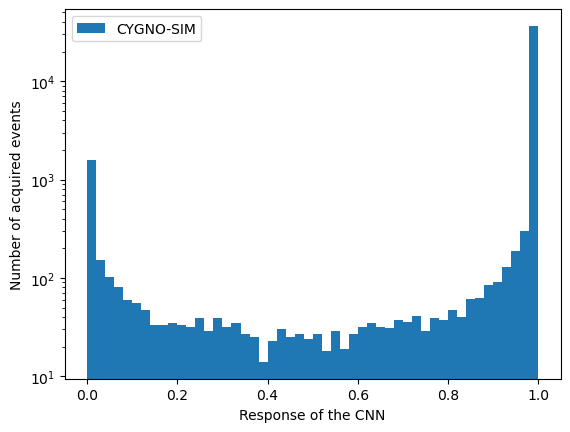

In [9]:
## Solution
def plot_histogram(predictions):
    """Makes a histogram of the CNN predictions for the CYGNO-SIM acquired data"""
    plt.hist(predictions, bins=np.linspace(0, 1, 51), label="CYGNO-SIM")
    plt.yscale('log')
    plt.xlabel("Response of the CNN")
    plt.ylabel("Number of acquired events")
    plt.legend()
    plt.show()

plot_histogram(predictions)

<ErrorbarContainer object of 3 artists>

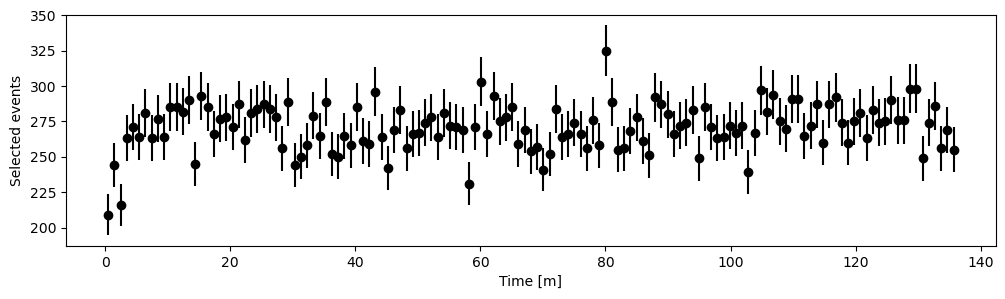

In [10]:
def make_timestamp_histogram(
    timestamps, 
    predictions,
    threshold,
    bin_width=1,
):
    """
    Creates a histogram of the selected events in hourly bins.

    Arguments:
     - timestamps:  dask array of type np.datetime64
     - predictions: numpy array of the classifier response with the same 
                    shape as timestamps
     - threshold:   float, threshold in range [0,1] defining the minimum
                    classifier's response to select a candidate event as NR
     - bin_width:   float, approximate dimension of a bin in hours, default: 0.1

    Returns:
     - a tuple of 1D arrays (time_in_hours, number_of_selected_events)
    """
    ## Obtain the timestamps as a numpy array
    np_tstamps = timestamps.compute()

    ## Retrieve the first timestmp as "START"
    t0 = np_tstamps[0]

    ## Select only the timestamps associated to a positive response
    ## of the CNN classifier
    t = np_tstamps[predictions > threshold]

    ## Convert the timestamp in a number of hours since START
    minutes_since_start = (t-t0)/np.timedelta64(1, 'm')

    ## Compute the end of the time span as LATEST
    tot_minutes = minutes_since_start.max()

    ## Compute the number of bins as the first integer exceeding 
    ## the total number of hours divided per the width of each bin
    bins = int(np.ceil(tot_minutes / bin_width))

    ## Fill a histogram of "hours since start"
    n_selected_events, boundaries = np.histogram(minutes_since_start, bins=bins)

    ## Given the boundaries obtained from the histogram, compute the 
    ## center of each bin
    time_in_minutes = 0.5 * (boundaries[1:] + boundaries[:-1])

    ## Return the tuple with the center of the bin and the number of selected
    ## events falling in that bin
    return time_in_minutes, n_selected_events

##############
## Retrieve the histogram of counts for events more likely to be due to 
## nuclear recoil
t, counts = make_timestamp_histogram(tstamps, predictions, 0.9)

## Assuming Poissonian distribution of the contents, assess the uncertainty 
## on the counts
error = np.sqrt(counts)

## Plot the histogram
plt.figure(figsize=(12,3))
plt.xlabel("Time [m]")
plt.ylabel("Selected events")
plt.errorbar (t, counts, error, fmt='ko')

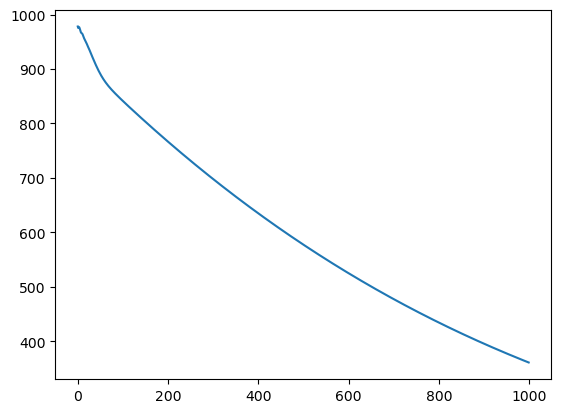

In [11]:
b = tf.Variable(float(np.min(counts)))
s = tf.Variable(float(np.max(counts) - np.min(counts))/2)
T = tf.Variable(8.)
phi = tf.Variable(1.2)

def fitfun(x):
    return b + s * (1 + tf.sin(2*np.pi * x/T + phi))

def chi2():
    return tf.reduce_sum((counts - fitfun(t))**2 / counts)

optimizer = tf.keras.optimizers.Adam(3e-2)

losses = []
for epoch in range(1000):
    optimizer.minimize(chi2, var_list=[b, s, T, phi])
    losses.append (chi2().numpy())

plt.plot(losses)

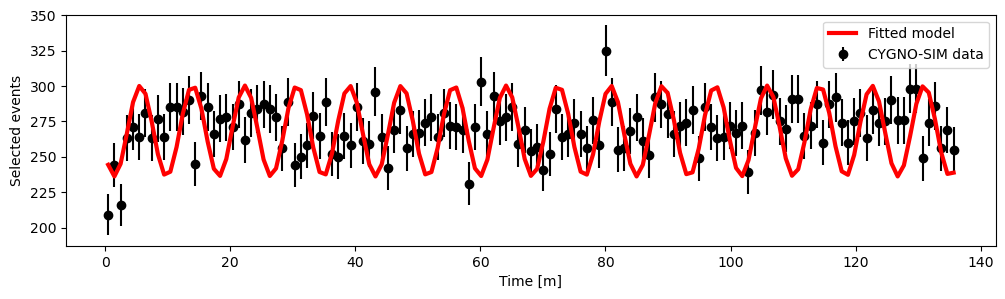

In [12]:
## Plot the histogram
plt.figure(figsize=(12,3))
plt.xlabel("Time [m]")
plt.ylabel("Selected events")
plt.errorbar (t, counts, np.sqrt(counts), fmt='ko', label="CYGNO-SIM data")
## Superpose the fitted model
plt.plot(t, fitfun(t), label="Fitted model", linewidth=3, color='red', zorder=10)
plt.legend()
plt.show()